# Importing libraries

In [1]:
# Import the required libraries

import pandas as pd
import numpy as np

import re
import regex
import datetime as date
from collections import Counter

import sqlite3

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse, Polygon

from pandas import ExcelWriter
from pandas import ExcelFile

 # Q 1. Make a pair plot on Readmission Registry table & do u see any correlation between columns values.

In [2]:
workbook_url = 'HospitalDatabase.xlsx'
ReAdmissionRegistry_df = pd.read_excel(workbook_url,sheet_name='ReAdmissionRegistry')
ReAdmissionRegistry_df

,AdmissionID,PatientID,AdmissionDate,DischargeDate,DischargeDisposition,Service,PrimaryDiagnosis,ExpectedLOS,ExpectedMortality,ReadmissionFlag,DaysToReadmission,EDVisitAfterDischargeFlag
0,389,1,2018-01-01,2018-01-04 19:59:31.391,Home,Hospitalist,Kidney Failure,6.717771,0.010046,NaN,NaN,NaN
1,635,2,2018-01-01,2018-01-04 21:28:51.898,Home,General Medicine,Flu,3.825969,0.604562,1.0,2.0,1.0
2,606,3,2018-01-01,2018-01-04 22:28:23.672,Home,General Medicine,Flu,3.382493,0.266137,1.0,3.0,1.0
3,587,5,2018-01-01,2018-01-05 05:47:04.933,Home,General Medicine,Flu,3.763352,0.307527,1.0,4.0,1.0
4,640,6,2018-01-01,2018-01-05 14:18:30.029,Home,ICU,Heart Failure,13.650953,0.408898,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
715,521,738,2018-02-22,2018-03-07 21:22:10.061,Home,Cardiology,AMI,13.725405,0.388319,NaN,NaN,NaN
716,548,739,2018-02-22,2018-03-08 02:43:18.749,Home,ICU,Pneumonia,11.355456,0.088518,NaN,NaN,NaN
717,509,740,2018-02-22,2018-03-08 09:27:18.377,Home,Hospitalist,Pneumonia,4.819882,0.503308,NaN,NaN,NaN
718,605,741,2018-02-22,2018-03-10 06:06:12.068,Home,General Medicine,Flu,3.123064,0.655870,NaN,NaN,NaN


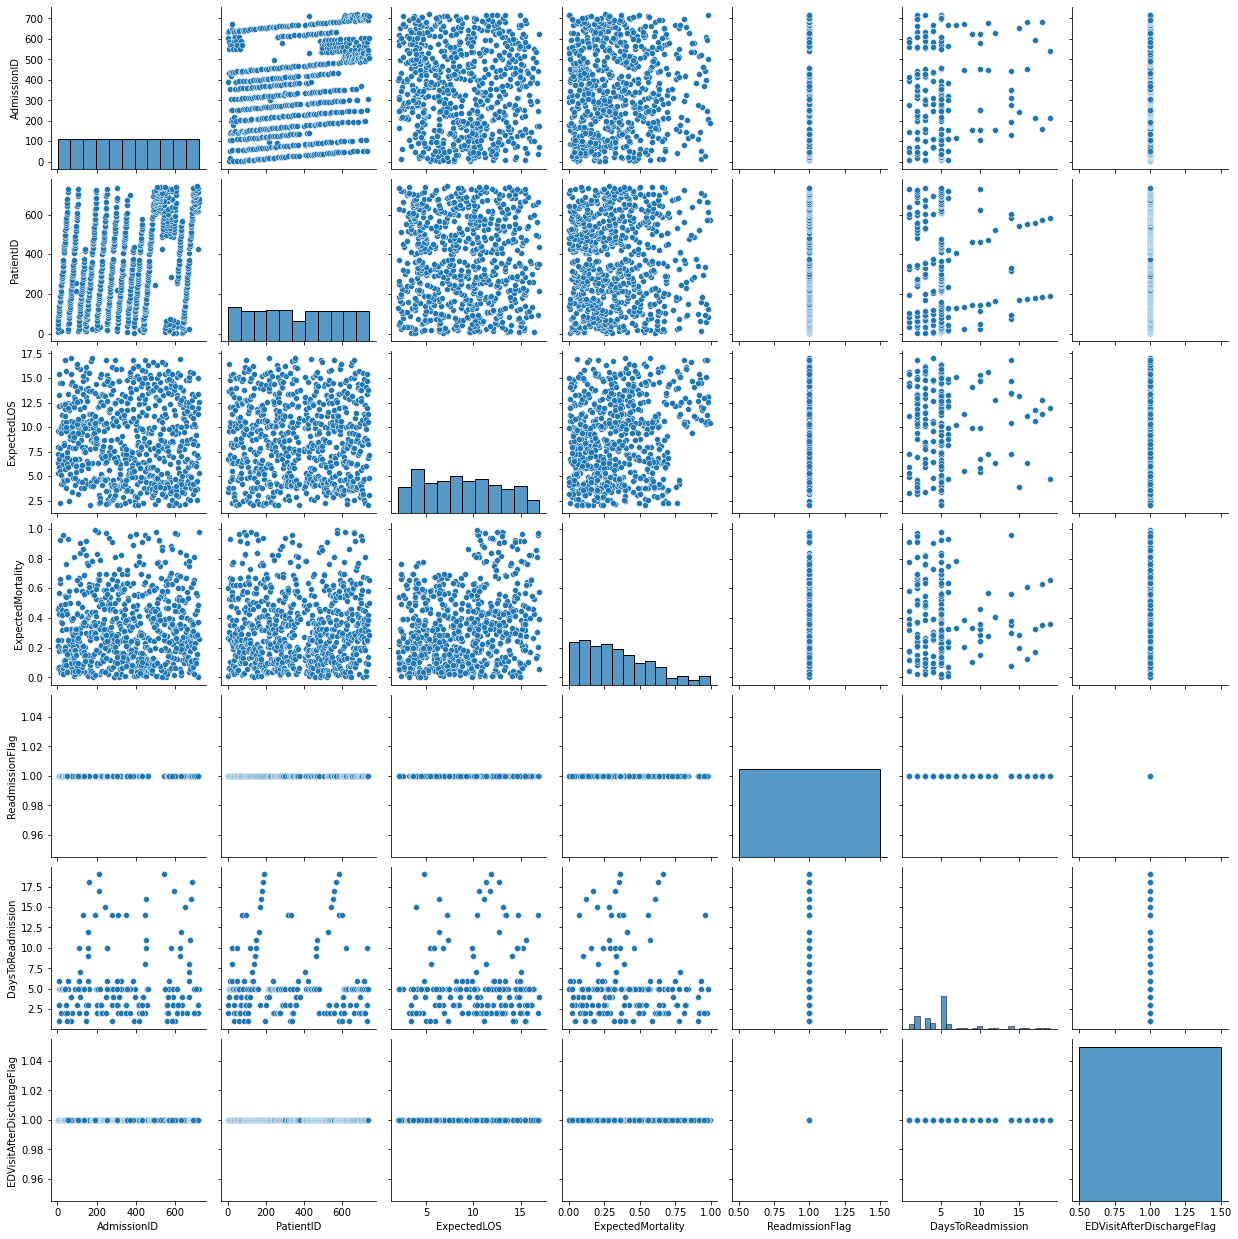

In [3]:
sns.pairplot(ReAdmissionRegistry_df)

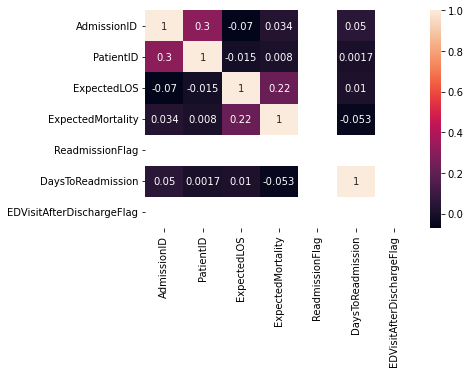

In [4]:
# Heatmaps provide better correlation stats than pairplot
correlation = sns.heatmap(ReAdmissionRegistry_df.corr(), annot=True)

# Answer - I found correlation of 0.3 between patientID & AdmissionID Columns. Also I found correlation of 0.22 between ExpectedMortality & ExpectedLOS Columns. 

# Bonus : Additionally analyzed with help of heat map.

# Q 2. Using iloc, retrieve the firstname and lastname of patients between indices 101 and 200.

In [5]:
workbook_url = 'HospitalDatabase.xlsx'
Patients_df = pd.read_excel(workbook_url,sheet_name='Patients')
Patients_df

,PatientID,FirstName,LastName,DateOfBirth,Gender,Race,Language
0,1,Lanni,Sue,1960-01-01 00:00:00.000,Male,White,English
1,2,Far,Myers,1985-11-15 02:08:42.090,Male,White,English
2,3,Devlin,Michael,1976-04-15 02:52:09.762,Male,White,English
3,4,Carmine,Texas,1968-10-15 03:32:13.635,Male,White,English
4,5,Tann,Bama,1962-05-01 19:12:58.950,Male,White,English
...,...,...,...,...,...,...,...
940,941,Wat,Fideler,1986-05-26 00:01:19.761,Male,Black/African-American,English
941,942,Wandie,Baythrop,1970-06-10 21:41:03.814,Male,Black/African-American,English
942,943,Diahann,Smeeton,1983-01-08 21:49:27.884,Male,Black/African-American,English
943,944,Panchito,Sharple,1963-06-05 07:57:05.569,Male,Black/African-American,English


In [6]:
Patients_df.iloc[101:201,1:3]

,FirstName,LastName
101,Gipsy,Frankton
102,Jethro,Wharin
103,Viv,Aylward
104,Swift,Dreschler
105,Fadel,Jacquemard
...,...,...
196,Noam,Laguerre
197,Arie,Bayless
198,Janaye,O'Mohun
199,Fonz,Group


# Answer: Above table shows the first and the last name from indices 101 to 200.

# Q 3. Create a figure object called fig using plt.figure() **

Use add_axes to add an axis to the figure canvas at [0,0,1,1]. Call this new axis ax. ** Plot (x,y) on that axes and set the labels. Note : You can plot on any x,y set of values.

Text(0.5, 1.0, 'fig')

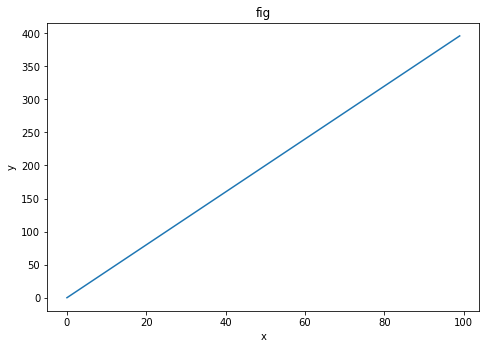

In [7]:
x = np.arange(0,100)
y = x*4
z = x**6
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.plot(x,y)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('fig')

# Q 4.Display data by splitting age in 4 quartiles and labeling the quartiles.

In [8]:
workbook_url = 'HospitalDatabase.xlsx'
Patients_df = pd.read_excel(workbook_url,sheet_name='Patients')
Patients_df

,PatientID,FirstName,LastName,DateOfBirth,Gender,Race,Language
0,1,Lanni,Sue,1960-01-01 00:00:00.000,Male,White,English
1,2,Far,Myers,1985-11-15 02:08:42.090,Male,White,English
2,3,Devlin,Michael,1976-04-15 02:52:09.762,Male,White,English
3,4,Carmine,Texas,1968-10-15 03:32:13.635,Male,White,English
4,5,Tann,Bama,1962-05-01 19:12:58.950,Male,White,English
...,...,...,...,...,...,...,...
940,941,Wat,Fideler,1986-05-26 00:01:19.761,Male,Black/African-American,English
941,942,Wandie,Baythrop,1970-06-10 21:41:03.814,Male,Black/African-American,English
942,943,Diahann,Smeeton,1983-01-08 21:49:27.884,Male,Black/African-American,English
943,944,Panchito,Sharple,1963-06-05 07:57:05.569,Male,Black/African-American,English


<AxesSubplot:xlabel='Age'>

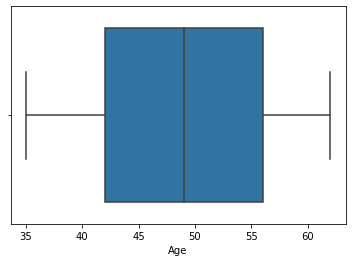

In [9]:
Patients_df['DateOfBirth'] = pd.to_datetime(Patients_df['DateOfBirth'])
Patients_df['Year'] = Patients_df['DateOfBirth'].dt.year
Patients_df['Age'] = 2022 - Patients_df['Year']
sns.boxplot(x=Patients_df["Age"])

# Q 5. Display full name of patients who are born in 1986.

In [10]:
workbook_url = 'HospitalDatabase.xlsx'
Patients_df = pd.read_excel(workbook_url,sheet_name='Patients')
Patients_df

,PatientID,FirstName,LastName,DateOfBirth,Gender,Race,Language
0,1,Lanni,Sue,1960-01-01 00:00:00.000,Male,White,English
1,2,Far,Myers,1985-11-15 02:08:42.090,Male,White,English
2,3,Devlin,Michael,1976-04-15 02:52:09.762,Male,White,English
3,4,Carmine,Texas,1968-10-15 03:32:13.635,Male,White,English
4,5,Tann,Bama,1962-05-01 19:12:58.950,Male,White,English
...,...,...,...,...,...,...,...
940,941,Wat,Fideler,1986-05-26 00:01:19.761,Male,Black/African-American,English
941,942,Wandie,Baythrop,1970-06-10 21:41:03.814,Male,Black/African-American,English
942,943,Diahann,Smeeton,1983-01-08 21:49:27.884,Male,Black/African-American,English
943,944,Panchito,Sharple,1963-06-05 07:57:05.569,Male,Black/African-American,English


In [11]:
### Extracting year from date of Birth to find the corresponding patient's name born in 1986.
Patients_df['DateOfBirth'] = pd.to_datetime(Patients_df['DateOfBirth'])
Patients_df['Year'] = Patients_df['DateOfBirth'].dt.year
Patients_df

,PatientID,FirstName,LastName,DateOfBirth,Gender,Race,Language,Year
0,1,Lanni,Sue,1960-01-01 00:00:00.000,Male,White,English,1960
1,2,Far,Myers,1985-11-15 02:08:42.090,Male,White,English,1985
2,3,Devlin,Michael,1976-04-15 02:52:09.762,Male,White,English,1976
3,4,Carmine,Texas,1968-10-15 03:32:13.635,Male,White,English,1968
4,5,Tann,Bama,1962-05-01 19:12:58.950,Male,White,English,1962
...,...,...,...,...,...,...,...,...
940,941,Wat,Fideler,1986-05-26 00:01:19.761,Male,Black/African-American,English,1986
941,942,Wandie,Baythrop,1970-06-10 21:41:03.814,Male,Black/African-American,English,1970
942,943,Diahann,Smeeton,1983-01-08 21:49:27.884,Male,Black/African-American,English,1983
943,944,Panchito,Sharple,1963-06-05 07:57:05.569,Male,Black/African-American,English,1963


In [12]:
Patients_df['FullName'] = (Patients_df['FirstName']+' '+Patients_df['LastName'])
Patients_df[Patients_df['Year']==1986]['FullName']

23         Gabriel  Joseph
24         Lincoln  Brenda
29             Ala Halpert
72            Lolita Darci
164         Fadel Bernardt
238         Bentley Kippax
367            Vale Olanda
373          Britt Dureden
386       Cristabel Chatel
415       Constantia Group
452       Morgan Scrowston
561             Dom Baglow
568        Ignazio Melling
595         Homenick Rings
639           Hashim Slark
643       Ellie Ramsbotham
674        Llewellyn Group
714             Niles Shaw
733             Yvette Inc
777          Siouxie Group
852            Carly Group
868        Worth Pickering
877           Arni Baldack
909       Kuvalis Coupland
922    Rebbecca Rollingson
940            Wat Fideler
Name: FullName, dtype: object

# Q 6.Create a jointplot on expected mortality & expected length of stay.

In [13]:
workbook_url = 'HospitalDatabase.xlsx'
ReAdmissionRegistry_df = pd.read_excel(workbook_url,sheet_name='ReAdmissionRegistry')
ReAdmissionRegistry_df

,AdmissionID,PatientID,AdmissionDate,DischargeDate,DischargeDisposition,Service,PrimaryDiagnosis,ExpectedLOS,ExpectedMortality,ReadmissionFlag,DaysToReadmission,EDVisitAfterDischargeFlag
0,389,1,2018-01-01,2018-01-04 19:59:31.391,Home,Hospitalist,Kidney Failure,6.717771,0.010046,NaN,NaN,NaN
1,635,2,2018-01-01,2018-01-04 21:28:51.898,Home,General Medicine,Flu,3.825969,0.604562,1.0,2.0,1.0
2,606,3,2018-01-01,2018-01-04 22:28:23.672,Home,General Medicine,Flu,3.382493,0.266137,1.0,3.0,1.0
3,587,5,2018-01-01,2018-01-05 05:47:04.933,Home,General Medicine,Flu,3.763352,0.307527,1.0,4.0,1.0
4,640,6,2018-01-01,2018-01-05 14:18:30.029,Home,ICU,Heart Failure,13.650953,0.408898,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
715,521,738,2018-02-22,2018-03-07 21:22:10.061,Home,Cardiology,AMI,13.725405,0.388319,NaN,NaN,NaN
716,548,739,2018-02-22,2018-03-08 02:43:18.749,Home,ICU,Pneumonia,11.355456,0.088518,NaN,NaN,NaN
717,509,740,2018-02-22,2018-03-08 09:27:18.377,Home,Hospitalist,Pneumonia,4.819882,0.503308,NaN,NaN,NaN
718,605,741,2018-02-22,2018-03-10 06:06:12.068,Home,General Medicine,Flu,3.123064,0.655870,NaN,NaN,NaN


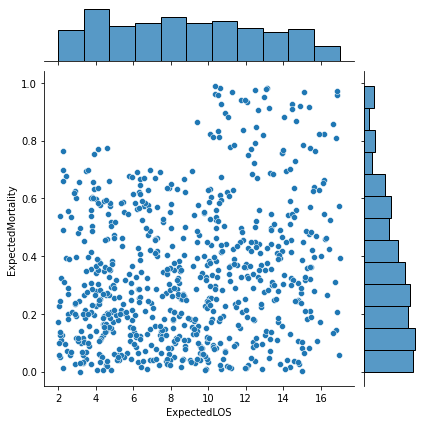

In [14]:
sns.jointplot(data=ReAdmissionRegistry_df, x="ExpectedLOS", y="ExpectedMortality")

# Q 7. Create a pair plot on whole dataframe by taking parameter "hue" as EDDisposition.


In [15]:
workbook_url = 'HospitalDatabase.xlsx'
EDVisits_df = pd.read_excel(workbook_url,sheet_name='EDVisits')
EDVisits_df

,EDVisitID,PatientID,VisitDate,EDDischargeTime,Acuity,ReasonForVisit,EDDisposition
0,1,1,2020-01-01 00:00:00.000,2020-01-01 11:20:22.924,1,Stomach Ache,Admitted
1,12,12,2020-01-01 02:45:40.302,2020-01-02 02:00:00.517,2,Migraine,Admitted
2,13,13,2020-01-01 03:09:24.701,2020-01-01 05:00:20.852,3,Stomach Ache,Admitted
3,14,14,2020-01-01 03:12:19.349,2020-01-01 04:32:29.142,3,Migraine,Admitted
4,15,15,2020-01-01 03:46:32.698,2020-01-01 06:24:52.741,3,Chest Pain,Admitted
...,...,...,...,...,...,...,...
1194,1183,929,2020-01-15 10:38:42.570,2020-01-16 02:31:52.023,4,Chest Pain,Discharged
1195,1186,932,2020-01-15 11:52:37.540,2020-01-16 10:19:41.570,1,Pneumonia,Discharged
1196,1187,933,2020-01-15 12:11:11.678,2020-01-15 16:41:15.223,1,Pneumonia,Discharged
1197,1188,934,2020-01-15 12:21:46.006,2020-01-15 18:32:21.060,1,Pneumonia,Discharged


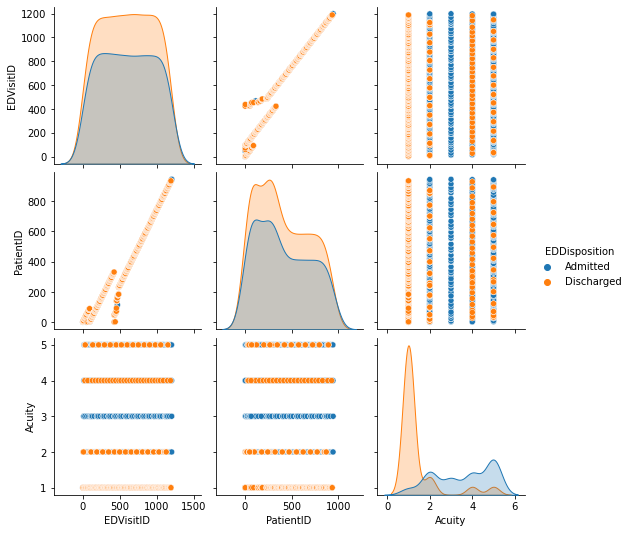

In [16]:
sns.pairplot(EDVisits_df, hue = 'EDDisposition')

# Q 8. Create a bar chart between expectedLOS & Primary diagnosis.

In [17]:
workbook_url = 'HospitalDatabase.xlsx'
ReAdmissionRegistry_df = pd.read_excel(workbook_url,sheet_name='ReAdmissionRegistry')
ReAdmissionRegistry_df

,AdmissionID,PatientID,AdmissionDate,DischargeDate,DischargeDisposition,Service,PrimaryDiagnosis,ExpectedLOS,ExpectedMortality,ReadmissionFlag,DaysToReadmission,EDVisitAfterDischargeFlag
0,389,1,2018-01-01,2018-01-04 19:59:31.391,Home,Hospitalist,Kidney Failure,6.717771,0.010046,NaN,NaN,NaN
1,635,2,2018-01-01,2018-01-04 21:28:51.898,Home,General Medicine,Flu,3.825969,0.604562,1.0,2.0,1.0
2,606,3,2018-01-01,2018-01-04 22:28:23.672,Home,General Medicine,Flu,3.382493,0.266137,1.0,3.0,1.0
3,587,5,2018-01-01,2018-01-05 05:47:04.933,Home,General Medicine,Flu,3.763352,0.307527,1.0,4.0,1.0
4,640,6,2018-01-01,2018-01-05 14:18:30.029,Home,ICU,Heart Failure,13.650953,0.408898,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
715,521,738,2018-02-22,2018-03-07 21:22:10.061,Home,Cardiology,AMI,13.725405,0.388319,NaN,NaN,NaN
716,548,739,2018-02-22,2018-03-08 02:43:18.749,Home,ICU,Pneumonia,11.355456,0.088518,NaN,NaN,NaN
717,509,740,2018-02-22,2018-03-08 09:27:18.377,Home,Hospitalist,Pneumonia,4.819882,0.503308,NaN,NaN,NaN
718,605,741,2018-02-22,2018-03-10 06:06:12.068,Home,General Medicine,Flu,3.123064,0.655870,NaN,NaN,NaN


<AxesSubplot:xlabel='PrimaryDiagnosis', ylabel='ExpectedLOS'>

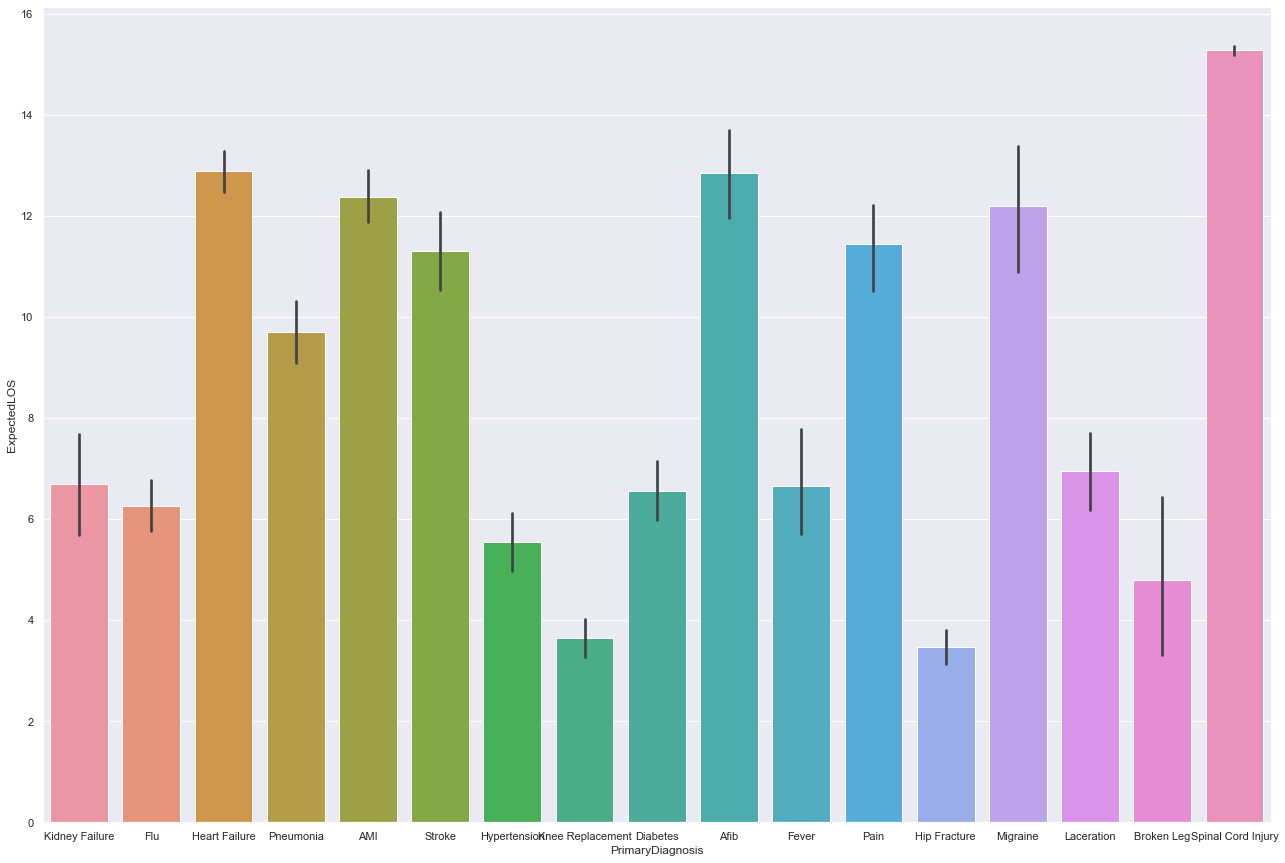

In [18]:
sns.set(rc={'figure.figsize':(22,15)})
sns.barplot(x="PrimaryDiagnosis", y="ExpectedLOS", data=ReAdmissionRegistry_df, estimator=np.mean)

# Q 9. Get the list of patient ID's which are not there in ReadmissionRegistry.

In [19]:
workbook_url = 'HospitalDatabase.xlsx'
ReAdmissionRegistry_df = pd.read_excel(workbook_url,sheet_name='ReAdmissionRegistry')
ReAdmissionRegistry_df
Patients_df = pd.read_excel(workbook_url,sheet_name='Patients')
Patients_df

,PatientID,FirstName,LastName,DateOfBirth,Gender,Race,Language
0,1,Lanni,Sue,1960-01-01 00:00:00.000,Male,White,English
1,2,Far,Myers,1985-11-15 02:08:42.090,Male,White,English
2,3,Devlin,Michael,1976-04-15 02:52:09.762,Male,White,English
3,4,Carmine,Texas,1968-10-15 03:32:13.635,Male,White,English
4,5,Tann,Bama,1962-05-01 19:12:58.950,Male,White,English
...,...,...,...,...,...,...,...
940,941,Wat,Fideler,1986-05-26 00:01:19.761,Male,Black/African-American,English
941,942,Wandie,Baythrop,1970-06-10 21:41:03.814,Male,Black/African-American,English
942,943,Diahann,Smeeton,1983-01-08 21:49:27.884,Male,Black/African-American,English
943,944,Panchito,Sharple,1963-06-05 07:57:05.569,Male,Black/African-American,English


In [20]:
df_9 = Patients_df.merge(ReAdmissionRegistry_df, how = 'outer' ,indicator=True).loc[lambda x : x['_merge']=='left_only']
print(df_9['PatientID'].tolist())

[4, 135, 145, 189, 200, 224, 234, 374, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 414, 501, 562, 599, 690, 691, 704, 726, 743, 744, 745, 746, 747, 748, 749, 750, 751, 752, 753, 754, 755, 756, 757, 758, 759, 760, 761, 762, 763, 764, 765, 766, 767, 768, 769, 770, 771, 772, 773, 774, 775, 776, 777, 778, 779, 780, 781, 782, 783, 784, 785, 786, 787, 788, 789, 790, 791, 792, 793, 794, 795, 796, 797, 798, 799, 800, 801, 802, 803, 804, 805, 806, 807, 808, 809, 810, 811, 812, 813, 814, 815, 816, 817, 818, 819, 820, 821, 822, 823, 824, 825, 826, 827, 828, 829, 830, 831, 832, 833, 834, 835, 836, 837, 838, 839, 840, 841, 842, 843, 844, 845, 846, 847, 848, 849, 850, 851, 852, 853, 854, 855, 856, 857, 858, 859, 860, 861, 862, 863, 864, 865, 866, 867, 868, 869, 870, 871, 872, 873, 874, 875, 876, 877, 878, 879, 880, 881, 882, 883, 884, 885, 886, 887, 888, 889, 890, 891, 892, 893, 894, 895, 896, 897, 898, 899, 900, 901, 902, 903, 904, 9

# Q 10. Create a boxplot on ExpectedLOS by taking service into account.

In [21]:
workbook_url = 'HospitalDatabase.xlsx'
ReAdmissionRegistry_df = pd.read_excel(workbook_url,sheet_name='ReAdmissionRegistry')
ReAdmissionRegistry_df

,AdmissionID,PatientID,AdmissionDate,DischargeDate,DischargeDisposition,Service,PrimaryDiagnosis,ExpectedLOS,ExpectedMortality,ReadmissionFlag,DaysToReadmission,EDVisitAfterDischargeFlag
0,389,1,2018-01-01,2018-01-04 19:59:31.391,Home,Hospitalist,Kidney Failure,6.717771,0.010046,NaN,NaN,NaN
1,635,2,2018-01-01,2018-01-04 21:28:51.898,Home,General Medicine,Flu,3.825969,0.604562,1.0,2.0,1.0
2,606,3,2018-01-01,2018-01-04 22:28:23.672,Home,General Medicine,Flu,3.382493,0.266137,1.0,3.0,1.0
3,587,5,2018-01-01,2018-01-05 05:47:04.933,Home,General Medicine,Flu,3.763352,0.307527,1.0,4.0,1.0
4,640,6,2018-01-01,2018-01-05 14:18:30.029,Home,ICU,Heart Failure,13.650953,0.408898,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
715,521,738,2018-02-22,2018-03-07 21:22:10.061,Home,Cardiology,AMI,13.725405,0.388319,NaN,NaN,NaN
716,548,739,2018-02-22,2018-03-08 02:43:18.749,Home,ICU,Pneumonia,11.355456,0.088518,NaN,NaN,NaN
717,509,740,2018-02-22,2018-03-08 09:27:18.377,Home,Hospitalist,Pneumonia,4.819882,0.503308,NaN,NaN,NaN
718,605,741,2018-02-22,2018-03-10 06:06:12.068,Home,General Medicine,Flu,3.123064,0.655870,NaN,NaN,NaN


<AxesSubplot:xlabel='Service', ylabel='ExpectedLOS'>

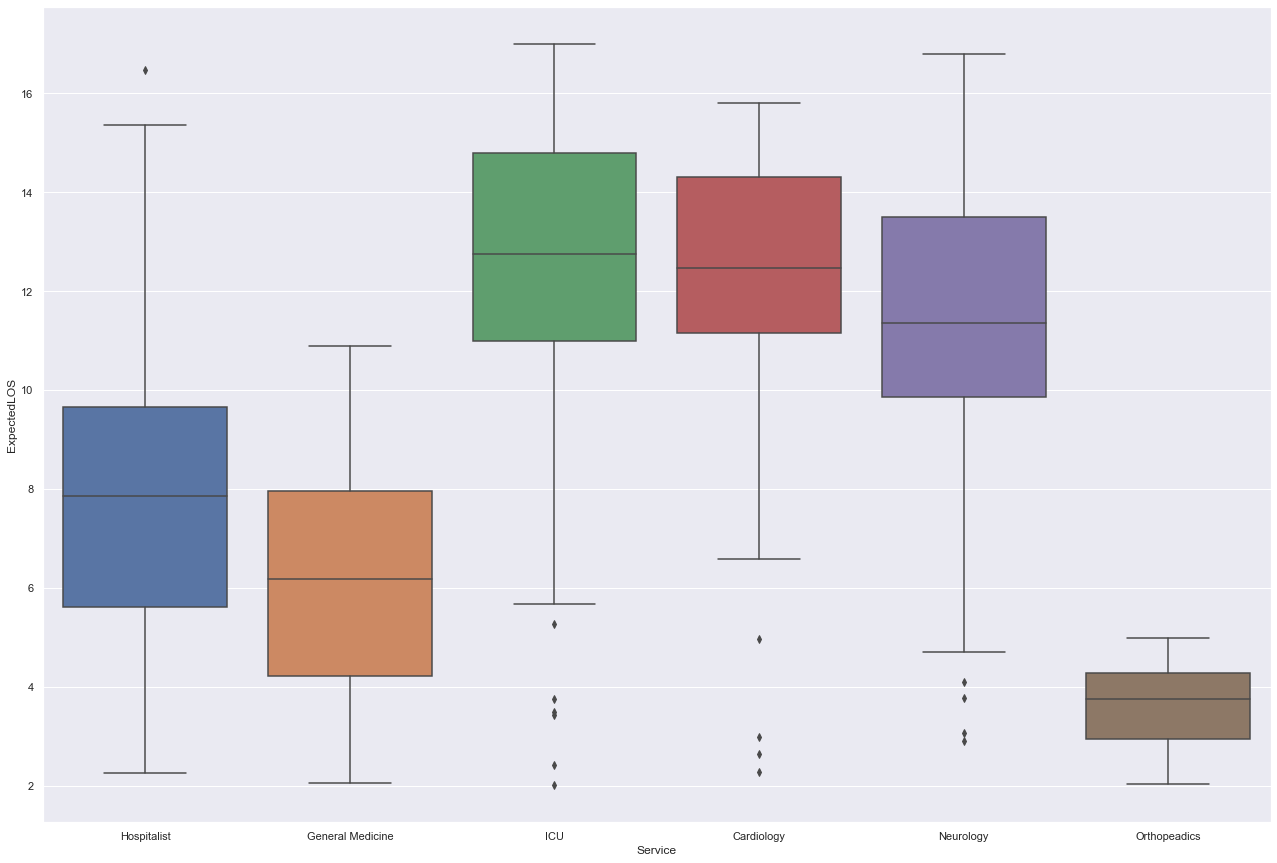

In [22]:
sns.set(rc={'figure.figsize':(22,15)})
sns.boxplot(data=ReAdmissionRegistry_df, x="Service", y="ExpectedLOS")

# Q 11. Create a pie chart by taking Service= ["ICU", "Neurology", "General", "Medicine"] & ExpectedLOS=[10,5,7,9] & explode the wedge with highest LOS.

In [23]:
workbook_url = 'HospitalDatabase.xlsx'
ReAdmissionRegistry_df = pd.read_excel(workbook_url,sheet_name='ReAdmissionRegistry')
ReAdmissionRegistry_df

,AdmissionID,PatientID,AdmissionDate,DischargeDate,DischargeDisposition,Service,PrimaryDiagnosis,ExpectedLOS,ExpectedMortality,ReadmissionFlag,DaysToReadmission,EDVisitAfterDischargeFlag
0,389,1,2018-01-01,2018-01-04 19:59:31.391,Home,Hospitalist,Kidney Failure,6.717771,0.010046,NaN,NaN,NaN
1,635,2,2018-01-01,2018-01-04 21:28:51.898,Home,General Medicine,Flu,3.825969,0.604562,1.0,2.0,1.0
2,606,3,2018-01-01,2018-01-04 22:28:23.672,Home,General Medicine,Flu,3.382493,0.266137,1.0,3.0,1.0
3,587,5,2018-01-01,2018-01-05 05:47:04.933,Home,General Medicine,Flu,3.763352,0.307527,1.0,4.0,1.0
4,640,6,2018-01-01,2018-01-05 14:18:30.029,Home,ICU,Heart Failure,13.650953,0.408898,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
715,521,738,2018-02-22,2018-03-07 21:22:10.061,Home,Cardiology,AMI,13.725405,0.388319,NaN,NaN,NaN
716,548,739,2018-02-22,2018-03-08 02:43:18.749,Home,ICU,Pneumonia,11.355456,0.088518,NaN,NaN,NaN
717,509,740,2018-02-22,2018-03-08 09:27:18.377,Home,Hospitalist,Pneumonia,4.819882,0.503308,NaN,NaN,NaN
718,605,741,2018-02-22,2018-03-10 06:06:12.068,Home,General Medicine,Flu,3.123064,0.655870,NaN,NaN,NaN


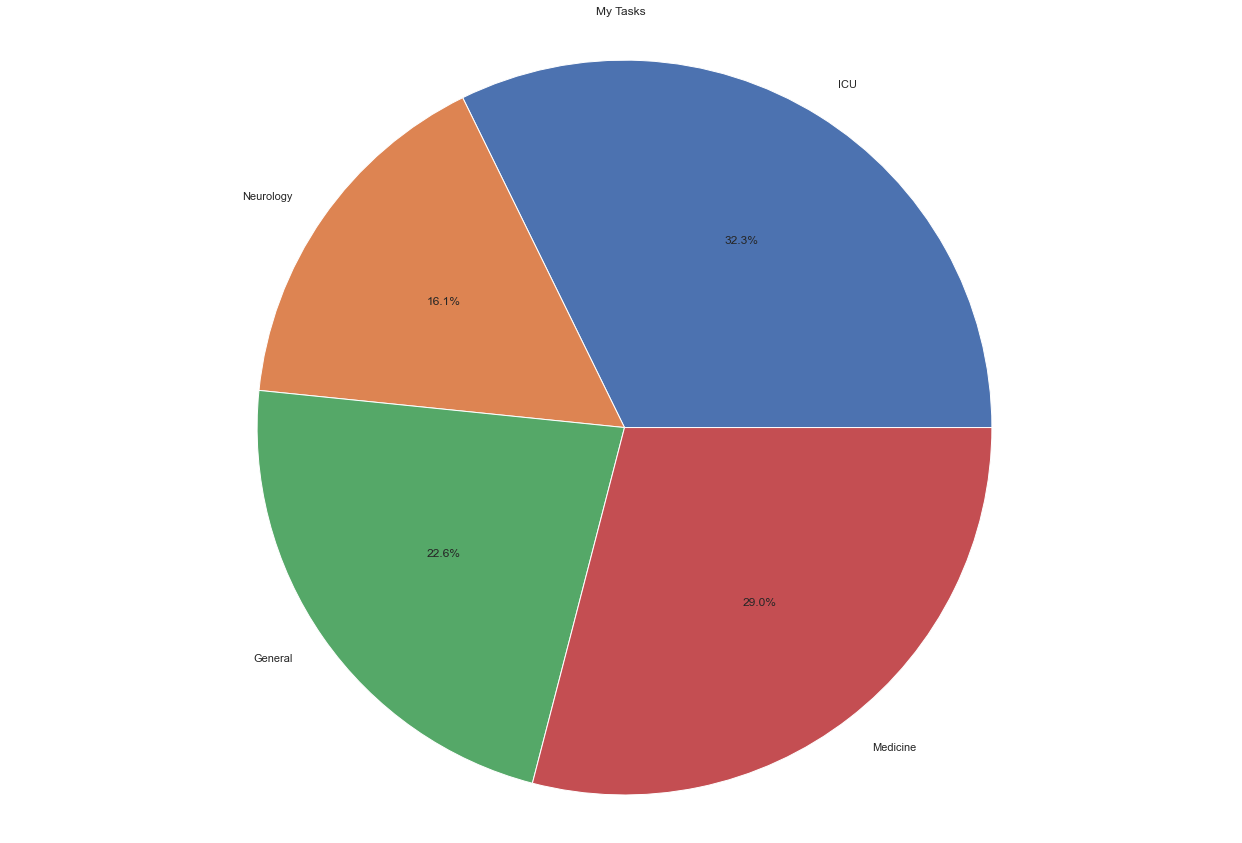

In [24]:
Tasks = [10,5,7,9]
my_labels = 'ICU','Neurology','General','Medicine'
plt.pie(Tasks,labels=my_labels,autopct='%1.1f%%')
plt.title('My Tasks')
plt.axis('equal')
plt.show()

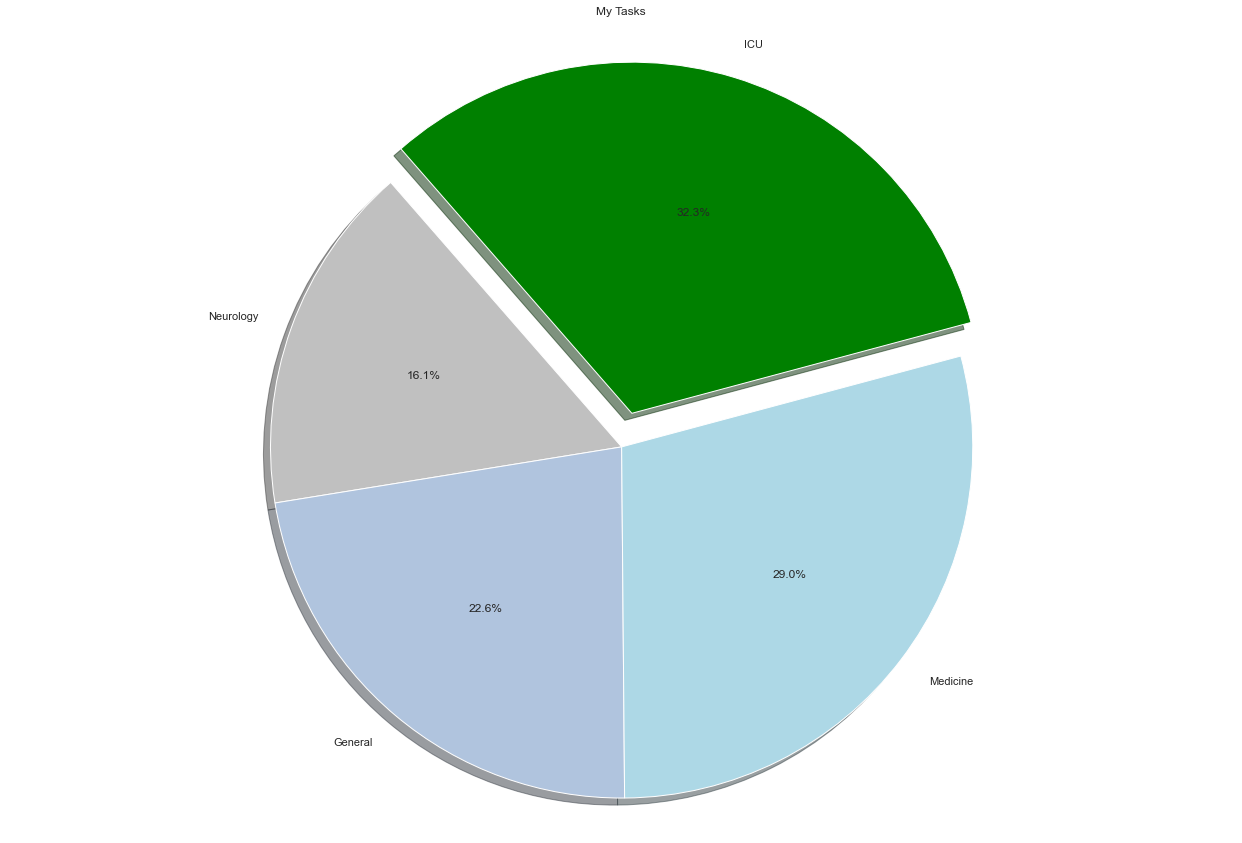

In [25]:
Tasks = [10,5,7,9]
my_labels = 'ICU','Neurology','General','Medicine'
my_colors = ['Green','silver','lightsteelblue','Lightblue']
my_explode = (0.1, 0, 0,0)
plt.pie(Tasks, labels=my_labels, autopct='%1.1f%%', startangle=15, shadow = True, colors=my_colors, explode=my_explode)
plt.title('My Tasks')
plt.axis('equal')
plt.show()

# Q 12. Connect to sql and write a query to get list of Provider names whose Providername is starting with letter T.

In [26]:
Providers_df = pd.read_excel(workbook_url,sheet_name='Providers')
Providers_df

,ProviderID,ProviderName,ProviderSpecialty,ProviderDateOnStaff
0,1,Sally Sue,Pediatrics,1993-01-01 00:00:00.000
1,2,Mike Myers,Pediatrics,1993-05-02 00:00:17.695
2,3,Jordan Michael,Pediatrics,1993-06-24 21:31:46.687
3,4,Ted Texas,Pediatrics,1993-12-23 21:33:52.299
4,5,Ala Bama,Pediatrics,1995-01-10 02:53:47.838
5,6,Harry Kane,Pediatrics,1995-07-21 03:49:03.310
6,7,Barry Bar,Pediatrics,1995-11-21 19:30:38.759
7,8,Ted Green,Pediatrics,1996-05-30 06:14:52.539
8,9,Ted Black,Pediatrics,1997-02-20 08:01:10.211
9,10,Fred Man,Surgery,1998-03-17 01:47:18.794


In [27]:
# Write any Database Name you like, this will create a .db file in the same folder 
# where you're storing this Jupyter Notebook file
conn = sqlite3.connect('Neha_SQL.db')
Providers_df.to_sql('Providers', conn, if_exists='replace', index=False)
# Create a cursor object
cur = conn.cursor()
select_all = "SELECT * FROM Providers WHERE ProviderName LIKE 'T%'"

rows = cur.execute(select_all).fetchall()
 
# Output to the console screen
for r in rows:
    print(r)

# Close connection to SQLite database
conn.close()

(4, 'Ted Texas', 'Pediatrics', '1993-12-23 21:33:52.299000')
(8, 'Ted Green', 'Pediatrics', '1996-05-30 06:14:52.539000')
(9, 'Ted Black', 'Pediatrics', '1997-02-20 08:01:10.211000')
(19, 'Tyler Conner', 'Cardiology', '2003-07-09 02:41:40.410000')
(34, 'Tony Creed', 'PrimaryCare', '2010-04-28 14:11:26.802000')
(37, 'Trent Tye', 'PrimaryCare', '2013-01-12 15:32:21.137000')


# Q 13. Create a subplot on x = np.arange(0, 10, 0.1) , y = np.sin(np.pi * x) + x with 2 rows & 2 columns with object oriented approach.

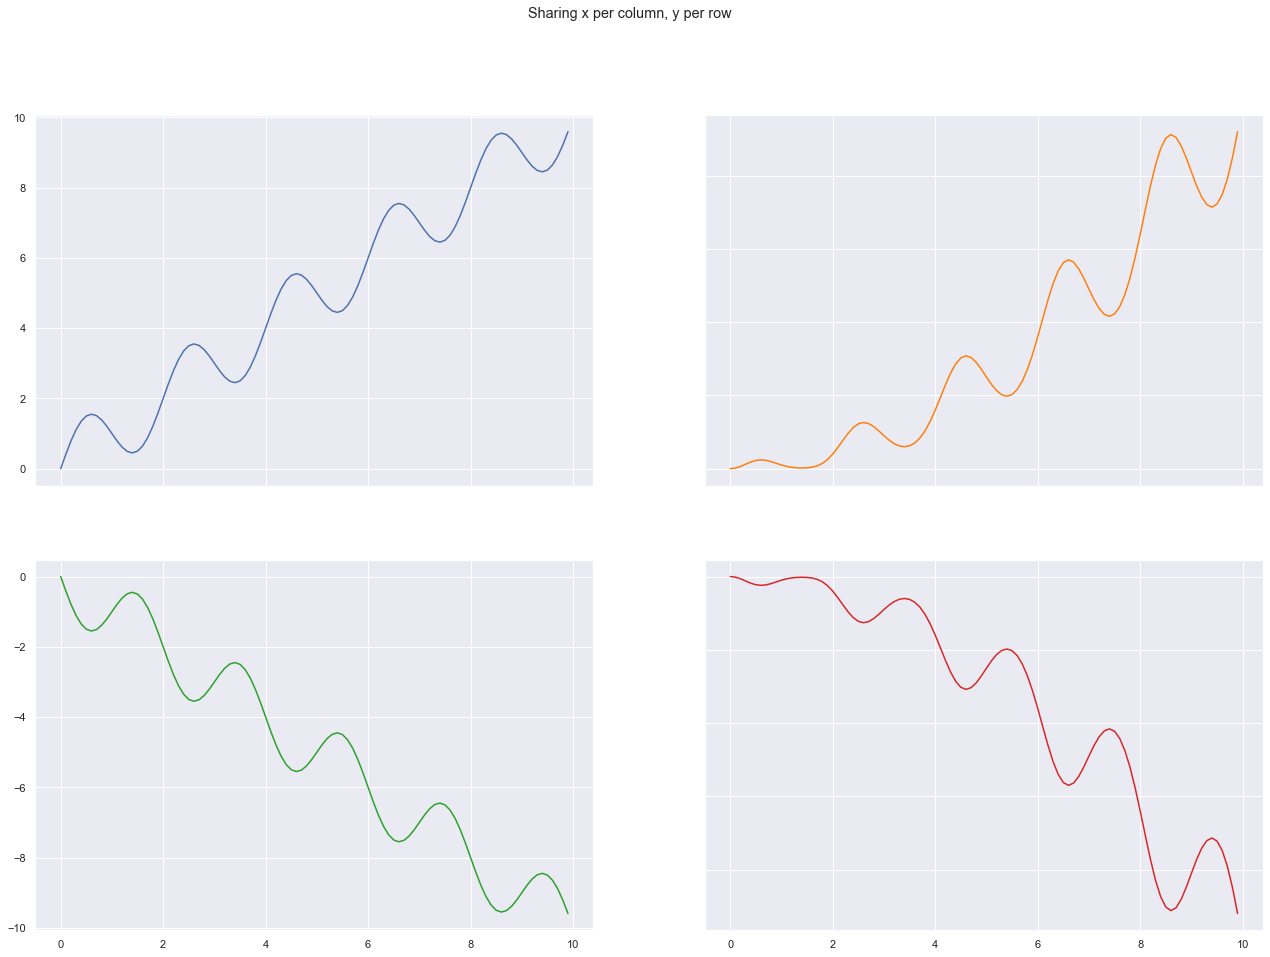

In [28]:
x = np.arange(0, 10, 0.1)
y = np.sin(np.pi * x) + x
fig, ((x1, x2), (x3, x4)) = plt.subplots(2, 2)
fig.suptitle('Sharing x per column, y per row')
x1.plot(x, y)
x2.plot(x, y**2, 'tab:orange')
x3.plot(x, -y, 'tab:green')
x4.plot(x, -y**2, 'tab:red')

for x in fig.get_axes():
    x.label_outer()

# Q 14. Find the number of null values in BloodPressureSystolic column.

In [29]:
workbook_url = 'HospitalDatabase.xlsx'
AmbulatoryVisits_df = pd.read_excel(workbook_url,sheet_name='AmbulatoryVisits')
AmbulatoryVisits_df

,VisitID,PatientMRN,ProviderID,DateofVisit,DateScheduled,VisitDepartmentID,VisitType,BloodPressureSystolic,BloodPressureDiastolic,Pulse,VisitStatus
0,202,840,29,2019-03-19,2019-03-13 07:59:24.000,10,Physical,188.0,144.143427,83.044920,No Show
1,436,820,25,2019-03-19,2019-02-24 07:10:31.043,3,Follow Up,179.0,118.876808,90.309544,No Show
2,794,879,30,2019-04-02,2019-03-19 01:41:55.656,11,Telemedicine,133.0,98.749563,80.859776,No Show
3,799,884,37,2019-03-03,2019-02-25 01:25:39.696,4,Telemedicine,132.0,98.001270,82.184737,No Show
4,515,32,26,2019-03-16,2019-02-20 06:44:59.617,11,Telemedicine,131.0,85.115632,89.192362,No Show
...,...,...,...,...,...,...,...,...,...,...,...
945,788,873,1,2019-03-27,2019-03-10 17:19:48.264,5,Telemedicine,187.0,126.695141,70.049167,Canceled
946,703,855,36,2019-03-12,2019-02-19 02:27:52.664,10,Follow Up,182.0,140.703502,73.380812,Canceled
947,481,865,13,2019-05-03,2019-04-25 13:37:57.501,12,New,150.0,84.841197,61.625454,Canceled
948,398,635,10,2019-02-09,2019-02-08 11:40:35.137,1,Physical,177.0,125.037534,53.287036,Canceled


In [30]:
AmbulatoryVisits_df['BloodPressureSystolic'].isna().sum()

124

# Q 15. Replace all the null values in ReadmissionFlag with 0.

In [31]:
workbook_url = 'HospitalDatabase.xlsx'
ReAdmissionRegistry_df = pd.read_excel(workbook_url,sheet_name='ReAdmissionRegistry')
ReAdmissionRegistry_df

,AdmissionID,PatientID,AdmissionDate,DischargeDate,DischargeDisposition,Service,PrimaryDiagnosis,ExpectedLOS,ExpectedMortality,ReadmissionFlag,DaysToReadmission,EDVisitAfterDischargeFlag
0,389,1,2018-01-01,2018-01-04 19:59:31.391,Home,Hospitalist,Kidney Failure,6.717771,0.010046,NaN,NaN,NaN
1,635,2,2018-01-01,2018-01-04 21:28:51.898,Home,General Medicine,Flu,3.825969,0.604562,1.0,2.0,1.0
2,606,3,2018-01-01,2018-01-04 22:28:23.672,Home,General Medicine,Flu,3.382493,0.266137,1.0,3.0,1.0
3,587,5,2018-01-01,2018-01-05 05:47:04.933,Home,General Medicine,Flu,3.763352,0.307527,1.0,4.0,1.0
4,640,6,2018-01-01,2018-01-05 14:18:30.029,Home,ICU,Heart Failure,13.650953,0.408898,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
715,521,738,2018-02-22,2018-03-07 21:22:10.061,Home,Cardiology,AMI,13.725405,0.388319,NaN,NaN,NaN
716,548,739,2018-02-22,2018-03-08 02:43:18.749,Home,ICU,Pneumonia,11.355456,0.088518,NaN,NaN,NaN
717,509,740,2018-02-22,2018-03-08 09:27:18.377,Home,Hospitalist,Pneumonia,4.819882,0.503308,NaN,NaN,NaN
718,605,741,2018-02-22,2018-03-10 06:06:12.068,Home,General Medicine,Flu,3.123064,0.655870,NaN,NaN,NaN


In [32]:
ReAdmissionRegistry_df['ReadmissionFlag'].isna().sum()

526

In [215]:
ReAdmissionRegistry_df['ReadmissionFlag'] = ReAdmissionRegistry_df['ReadmissionFlag'].fillna(0).inplace=0
ReAdmissionRegistry_df

,AdmissionID,PatientID,AdmissionDate,DischargeDate,DischargeDisposition,Service,PrimaryDiagnosis,ExpectedLOS,ExpectedMortality,ReadmissionFlag,DaysToReadmission,EDVisitAfterDischargeFlag
0,389,1,2018-01-01,2018-01-04 19:59:31.391,Home,Hospitalist,Kidney Failure,6.717771,0.010046,0,NaN,NaN
1,635,2,2018-01-01,2018-01-04 21:28:51.898,Home,General Medicine,Flu,3.825969,0.604562,0,2.0,1.0
2,606,3,2018-01-01,2018-01-04 22:28:23.672,Home,General Medicine,Flu,3.382493,0.266137,0,3.0,1.0
3,587,5,2018-01-01,2018-01-05 05:47:04.933,Home,General Medicine,Flu,3.763352,0.307527,0,4.0,1.0
4,640,6,2018-01-01,2018-01-05 14:18:30.029,Home,ICU,Heart Failure,13.650953,0.408898,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
715,521,738,2018-02-22,2018-03-07 21:22:10.061,Home,Cardiology,AMI,13.725405,0.388319,0,NaN,NaN
716,548,739,2018-02-22,2018-03-08 02:43:18.749,Home,ICU,Pneumonia,11.355456,0.088518,0,NaN,NaN
717,509,740,2018-02-22,2018-03-08 09:27:18.377,Home,Hospitalist,Pneumonia,4.819882,0.503308,0,NaN,NaN
718,605,741,2018-02-22,2018-03-10 06:06:12.068,Home,General Medicine,Flu,3.123064,0.655870,0,NaN,NaN


In [216]:
# Here we show that Readmission colomun does not retun any cell with null value.
ReAdmissionRegistry_df['ReadmissionFlag'].isna().sum()

0

# Q 16. Plot a graph to show the distribution of expected length of stay.

In [35]:
workbook_url = 'HospitalDatabase.xlsx'
ReAdmissionRegistry_df = pd.read_excel(workbook_url,sheet_name='ReAdmissionRegistry')
ReAdmissionRegistry_df

,AdmissionID,PatientID,AdmissionDate,DischargeDate,DischargeDisposition,Service,PrimaryDiagnosis,ExpectedLOS,ExpectedMortality,ReadmissionFlag,DaysToReadmission,EDVisitAfterDischargeFlag
0,389,1,2018-01-01,2018-01-04 19:59:31.391,Home,Hospitalist,Kidney Failure,6.717771,0.010046,NaN,NaN,NaN
1,635,2,2018-01-01,2018-01-04 21:28:51.898,Home,General Medicine,Flu,3.825969,0.604562,1.0,2.0,1.0
2,606,3,2018-01-01,2018-01-04 22:28:23.672,Home,General Medicine,Flu,3.382493,0.266137,1.0,3.0,1.0
3,587,5,2018-01-01,2018-01-05 05:47:04.933,Home,General Medicine,Flu,3.763352,0.307527,1.0,4.0,1.0
4,640,6,2018-01-01,2018-01-05 14:18:30.029,Home,ICU,Heart Failure,13.650953,0.408898,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
715,521,738,2018-02-22,2018-03-07 21:22:10.061,Home,Cardiology,AMI,13.725405,0.388319,NaN,NaN,NaN
716,548,739,2018-02-22,2018-03-08 02:43:18.749,Home,ICU,Pneumonia,11.355456,0.088518,NaN,NaN,NaN
717,509,740,2018-02-22,2018-03-08 09:27:18.377,Home,Hospitalist,Pneumonia,4.819882,0.503308,NaN,NaN,NaN
718,605,741,2018-02-22,2018-03-10 06:06:12.068,Home,General Medicine,Flu,3.123064,0.655870,NaN,NaN,NaN


<AxesSubplot:xlabel='ExpectedLOS', ylabel='Count'>

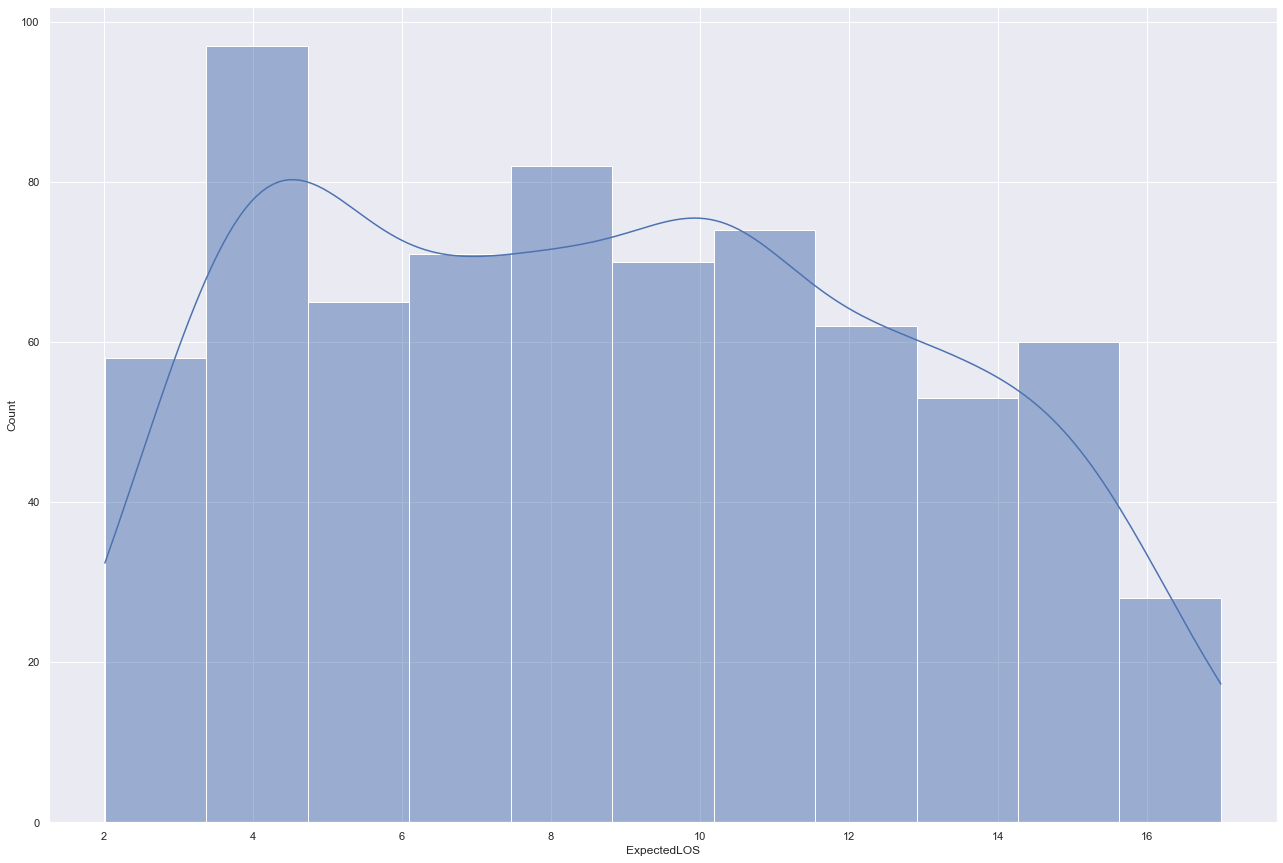

In [36]:
sns.histplot(data=ReAdmissionRegistry_df, x="ExpectedLOS", kde=True)

# Q 17.Create a heat map to show the correlation between the column values of Edvisits. 

In [37]:
workbook_url = 'HospitalDatabase.xlsx'
EDVisits_df = pd.read_excel(workbook_url,sheet_name='EDVisits')
EDVisits_df

,EDVisitID,PatientID,VisitDate,EDDischargeTime,Acuity,ReasonForVisit,EDDisposition
0,1,1,2020-01-01 00:00:00.000,2020-01-01 11:20:22.924,1,Stomach Ache,Admitted
1,12,12,2020-01-01 02:45:40.302,2020-01-02 02:00:00.517,2,Migraine,Admitted
2,13,13,2020-01-01 03:09:24.701,2020-01-01 05:00:20.852,3,Stomach Ache,Admitted
3,14,14,2020-01-01 03:12:19.349,2020-01-01 04:32:29.142,3,Migraine,Admitted
4,15,15,2020-01-01 03:46:32.698,2020-01-01 06:24:52.741,3,Chest Pain,Admitted
...,...,...,...,...,...,...,...
1194,1183,929,2020-01-15 10:38:42.570,2020-01-16 02:31:52.023,4,Chest Pain,Discharged
1195,1186,932,2020-01-15 11:52:37.540,2020-01-16 10:19:41.570,1,Pneumonia,Discharged
1196,1187,933,2020-01-15 12:11:11.678,2020-01-15 16:41:15.223,1,Pneumonia,Discharged
1197,1188,934,2020-01-15 12:21:46.006,2020-01-15 18:32:21.060,1,Pneumonia,Discharged


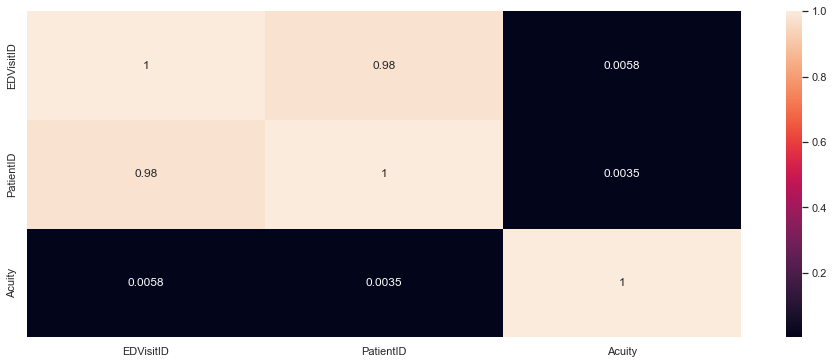

In [38]:
plt.figure(figsize=(16, 6))
correlation = sns.heatmap(EDVisits_df.corr(), annot=True)

# Q 18.Add column 'Age' in Patient table.

In [39]:
workbook_url = 'HospitalDatabase.xlsx'
Patients_df = pd.read_excel(workbook_url,sheet_name='Patients')
Patients_df

,PatientID,FirstName,LastName,DateOfBirth,Gender,Race,Language
0,1,Lanni,Sue,1960-01-01 00:00:00.000,Male,White,English
1,2,Far,Myers,1985-11-15 02:08:42.090,Male,White,English
2,3,Devlin,Michael,1976-04-15 02:52:09.762,Male,White,English
3,4,Carmine,Texas,1968-10-15 03:32:13.635,Male,White,English
4,5,Tann,Bama,1962-05-01 19:12:58.950,Male,White,English
...,...,...,...,...,...,...,...
940,941,Wat,Fideler,1986-05-26 00:01:19.761,Male,Black/African-American,English
941,942,Wandie,Baythrop,1970-06-10 21:41:03.814,Male,Black/African-American,English
942,943,Diahann,Smeeton,1983-01-08 21:49:27.884,Male,Black/African-American,English
943,944,Panchito,Sharple,1963-06-05 07:57:05.569,Male,Black/African-American,English


In [40]:
Patients_df['DateOfBirth'] = pd.to_datetime(Patients_df['DateOfBirth'])
Patients_df['Year'] = Patients_df['DateOfBirth'].dt.year
Patients_df['Age'] = 2022 - Patients_df['Year']
Patients_df

,PatientID,FirstName,LastName,DateOfBirth,Gender,Race,Language,Year,Age
0,1,Lanni,Sue,1960-01-01 00:00:00.000,Male,White,English,1960,62
1,2,Far,Myers,1985-11-15 02:08:42.090,Male,White,English,1985,37
2,3,Devlin,Michael,1976-04-15 02:52:09.762,Male,White,English,1976,46
3,4,Carmine,Texas,1968-10-15 03:32:13.635,Male,White,English,1968,54
4,5,Tann,Bama,1962-05-01 19:12:58.950,Male,White,English,1962,60
...,...,...,...,...,...,...,...,...,...
940,941,Wat,Fideler,1986-05-26 00:01:19.761,Male,Black/African-American,English,1986,36
941,942,Wandie,Baythrop,1970-06-10 21:41:03.814,Male,Black/African-American,English,1970,52
942,943,Diahann,Smeeton,1983-01-08 21:49:27.884,Male,Black/African-American,English,1983,39
943,944,Panchito,Sharple,1963-06-05 07:57:05.569,Male,Black/African-American,English,1963,59


# Q 19. Create a dataframe with date and time as columns, where the values are the discharge time from readmissionregistry sheet.

In [41]:
workbook_url = 'HospitalDatabase.xlsx'
ReAdmissionRegistry_df = pd.read_excel(workbook_url,sheet_name='ReAdmissionRegistry')
ReAdmissionRegistry_df

,AdmissionID,PatientID,AdmissionDate,DischargeDate,DischargeDisposition,Service,PrimaryDiagnosis,ExpectedLOS,ExpectedMortality,ReadmissionFlag,DaysToReadmission,EDVisitAfterDischargeFlag
0,389,1,2018-01-01,2018-01-04 19:59:31.391,Home,Hospitalist,Kidney Failure,6.717771,0.010046,NaN,NaN,NaN
1,635,2,2018-01-01,2018-01-04 21:28:51.898,Home,General Medicine,Flu,3.825969,0.604562,1.0,2.0,1.0
2,606,3,2018-01-01,2018-01-04 22:28:23.672,Home,General Medicine,Flu,3.382493,0.266137,1.0,3.0,1.0
3,587,5,2018-01-01,2018-01-05 05:47:04.933,Home,General Medicine,Flu,3.763352,0.307527,1.0,4.0,1.0
4,640,6,2018-01-01,2018-01-05 14:18:30.029,Home,ICU,Heart Failure,13.650953,0.408898,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
715,521,738,2018-02-22,2018-03-07 21:22:10.061,Home,Cardiology,AMI,13.725405,0.388319,NaN,NaN,NaN
716,548,739,2018-02-22,2018-03-08 02:43:18.749,Home,ICU,Pneumonia,11.355456,0.088518,NaN,NaN,NaN
717,509,740,2018-02-22,2018-03-08 09:27:18.377,Home,Hospitalist,Pneumonia,4.819882,0.503308,NaN,NaN,NaN
718,605,741,2018-02-22,2018-03-10 06:06:12.068,Home,General Medicine,Flu,3.123064,0.655870,NaN,NaN,NaN


In [42]:
ReAdmissionRegistry_df['Date'] = pd.to_datetime(ReAdmissionRegistry_df['DischargeDate']).dt.date
ReAdmissionRegistry_df['Time'] = pd.to_datetime(ReAdmissionRegistry_df['DischargeDate']).dt.time
ReAdmissionRegistry_df

,AdmissionID,PatientID,AdmissionDate,DischargeDate,DischargeDisposition,Service,PrimaryDiagnosis,ExpectedLOS,ExpectedMortality,ReadmissionFlag,DaysToReadmission,EDVisitAfterDischargeFlag,Date,Time
0,389,1,2018-01-01,2018-01-04 19:59:31.391,Home,Hospitalist,Kidney Failure,6.717771,0.010046,NaN,NaN,NaN,2018-01-04,19:59:31.391000
1,635,2,2018-01-01,2018-01-04 21:28:51.898,Home,General Medicine,Flu,3.825969,0.604562,1.0,2.0,1.0,2018-01-04,21:28:51.898000
2,606,3,2018-01-01,2018-01-04 22:28:23.672,Home,General Medicine,Flu,3.382493,0.266137,1.0,3.0,1.0,2018-01-04,22:28:23.672000
3,587,5,2018-01-01,2018-01-05 05:47:04.933,Home,General Medicine,Flu,3.763352,0.307527,1.0,4.0,1.0,2018-01-05,05:47:04.933000
4,640,6,2018-01-01,2018-01-05 14:18:30.029,Home,ICU,Heart Failure,13.650953,0.408898,NaN,NaN,NaN,2018-01-05,14:18:30.029000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,521,738,2018-02-22,2018-03-07 21:22:10.061,Home,Cardiology,AMI,13.725405,0.388319,NaN,NaN,NaN,2018-03-07,21:22:10.061000
716,548,739,2018-02-22,2018-03-08 02:43:18.749,Home,ICU,Pneumonia,11.355456,0.088518,NaN,NaN,NaN,2018-03-08,02:43:18.749000
717,509,740,2018-02-22,2018-03-08 09:27:18.377,Home,Hospitalist,Pneumonia,4.819882,0.503308,NaN,NaN,NaN,2018-03-08,09:27:18.377000
718,605,741,2018-02-22,2018-03-10 06:06:12.068,Home,General Medicine,Flu,3.123064,0.655870,NaN,NaN,NaN,2018-03-10,06:06:12.068000


# Q 20. Count of number of patients admitted based on Primary Diagnosis and Service provided.

In [43]:
workbook_url = 'HospitalDatabase.xlsx'
ReAdmissionRegistry_df = pd.read_excel(workbook_url,sheet_name='ReAdmissionRegistry')
ReAdmissionRegistry_df

,AdmissionID,PatientID,AdmissionDate,DischargeDate,DischargeDisposition,Service,PrimaryDiagnosis,ExpectedLOS,ExpectedMortality,ReadmissionFlag,DaysToReadmission,EDVisitAfterDischargeFlag
0,389,1,2018-01-01,2018-01-04 19:59:31.391,Home,Hospitalist,Kidney Failure,6.717771,0.010046,NaN,NaN,NaN
1,635,2,2018-01-01,2018-01-04 21:28:51.898,Home,General Medicine,Flu,3.825969,0.604562,1.0,2.0,1.0
2,606,3,2018-01-01,2018-01-04 22:28:23.672,Home,General Medicine,Flu,3.382493,0.266137,1.0,3.0,1.0
3,587,5,2018-01-01,2018-01-05 05:47:04.933,Home,General Medicine,Flu,3.763352,0.307527,1.0,4.0,1.0
4,640,6,2018-01-01,2018-01-05 14:18:30.029,Home,ICU,Heart Failure,13.650953,0.408898,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
715,521,738,2018-02-22,2018-03-07 21:22:10.061,Home,Cardiology,AMI,13.725405,0.388319,NaN,NaN,NaN
716,548,739,2018-02-22,2018-03-08 02:43:18.749,Home,ICU,Pneumonia,11.355456,0.088518,NaN,NaN,NaN
717,509,740,2018-02-22,2018-03-08 09:27:18.377,Home,Hospitalist,Pneumonia,4.819882,0.503308,NaN,NaN,NaN
718,605,741,2018-02-22,2018-03-10 06:06:12.068,Home,General Medicine,Flu,3.123064,0.655870,NaN,NaN,NaN


In [44]:
ReAdmissionRegistry_df['PrimaryDiagnosis'].value_counts()

Pneumonia             177
Flu                    80
Heart Failure          78
Stroke                 68
Diabetes               64
Hypertension           50
AMI                    48
Laceration             29
Hip Fracture           23
Knee Replacement       23
Kidney Failure         20
Fever                  19
Migraine               12
Afib                   11
Broken Leg              9
Pain                    7
Spinal Cord Injury      2
Name: PrimaryDiagnosis, dtype: int64

In [45]:
ReAdmissionRegistry_df['Service'].value_counts()

General Medicine    263
ICU                 151
Hospitalist         101
Cardiology           95
Neurology            65
Orthopeadics         45
Name: Service, dtype: int64

In [46]:
ReAdmissionRegistry_df[['PrimaryDiagnosis','Service']].value_counts()

PrimaryDiagnosis    Service         
Pneumonia           ICU                 77
                    General Medicine    67
Flu                 General Medicine    54
AMI                 Cardiology          40
Heart Failure       Cardiology          39
Diabetes            General Medicine    38
Hypertension        General Medicine    35
Heart Failure       ICU                 33
Pneumonia           Hospitalist         28
Stroke              Neurology           26
Diabetes            Hospitalist         26
Hip Fracture        Orthopeadics        23
Knee Replacement    Orthopeadics        22
Stroke              ICU                 21
Laceration          General Medicine    21
Stroke              General Medicine    20
Flu                 Hospitalist         19
Fever               General Medicine    13
Kidney Failure      General Medicine    12
Migraine            Neurology           12
Afib                Cardiology          10
Pain                Neurology            7
Laceration       

# Q 21. Which demographic patients are prone to get stroke.

In [47]:
workbook_url = 'HospitalDatabase.xlsx'
Patients_df = pd.read_excel(workbook_url,sheet_name='Patients')
Discharges_df = pd.read_excel(workbook_url,sheet_name='Discharges')
merged = Patients_df.merge(Discharges_df, left_on='PatientID', right_on='PatientID')
df = merged.loc[(merged['PrimaryDiagnosis'] == "Stroke")]
df['Race'].max()

'White'

# Q 22. Create a dataframe with acuity and EDDisposition as the indices and the count of number of patients as the value.

In [48]:
df=pd.read_excel('HospitalDatabase.xlsx', 'EDVisits')
df = pd.DataFrame(df, columns=['EDDisposition','Acuity'])
df.reset_index().groupby( [ "EDDisposition", "Acuity"],as_index=False ).count()

,EDDisposition,Acuity,index
0,Admitted,1,32
1,Admitted,2,116
2,Admitted,3,81
3,Admitted,4,107
4,Admitted,5,179
5,Discharged,1,558
6,Discharged,2,66
7,Discharged,4,30
8,Discharged,5,30


# Q 23. write a function to find the center element in the list. (one element in odd length list, two elements in even length list).

In [49]:
# list with odd numbers
list = [1, 2, 3, 4, 5] 

middle = int(len(list) / 2)
print(list[middle])

3


In [50]:
# list with even numbers.
list = [1, 2, 3, 4, 5, 6]
first_middle = int(len(list) / 2) - 1
second_middle = int(len(list) / 2)    

print(list[first_middle])
print(list[second_middle])

3
4


# Q 24. Get the number of patients based on ReasonForVisit and EDDisposition (use stack/unstack functions). 

In [51]:
df=pd.read_excel('HospitalDatabase.xlsx', 'EDVisits')
df = pd.DataFrame(df, columns=['EDDisposition','ReasonForVisit'])
stacked = df.stack(level = 0)
stacked
stacked.unstack()
df.reset_index().groupby( [ "EDDisposition", "ReasonForVisit"],as_index=False ).count()

,EDDisposition,ReasonForVisit,index
0,Admitted,Accident,39
1,Admitted,Bleeding,16
2,Admitted,Car Accident,17
3,Admitted,Chest Pain,94
4,Admitted,Fever,46
5,Admitted,Gun Shot,16
6,Admitted,Migraine,47
7,Admitted,Pneumonia,136
8,Admitted,Shortness of Breath,72
9,Admitted,Stomach Ache,32


# Q 25. Plot a graph by counting the no. of patients in each department.

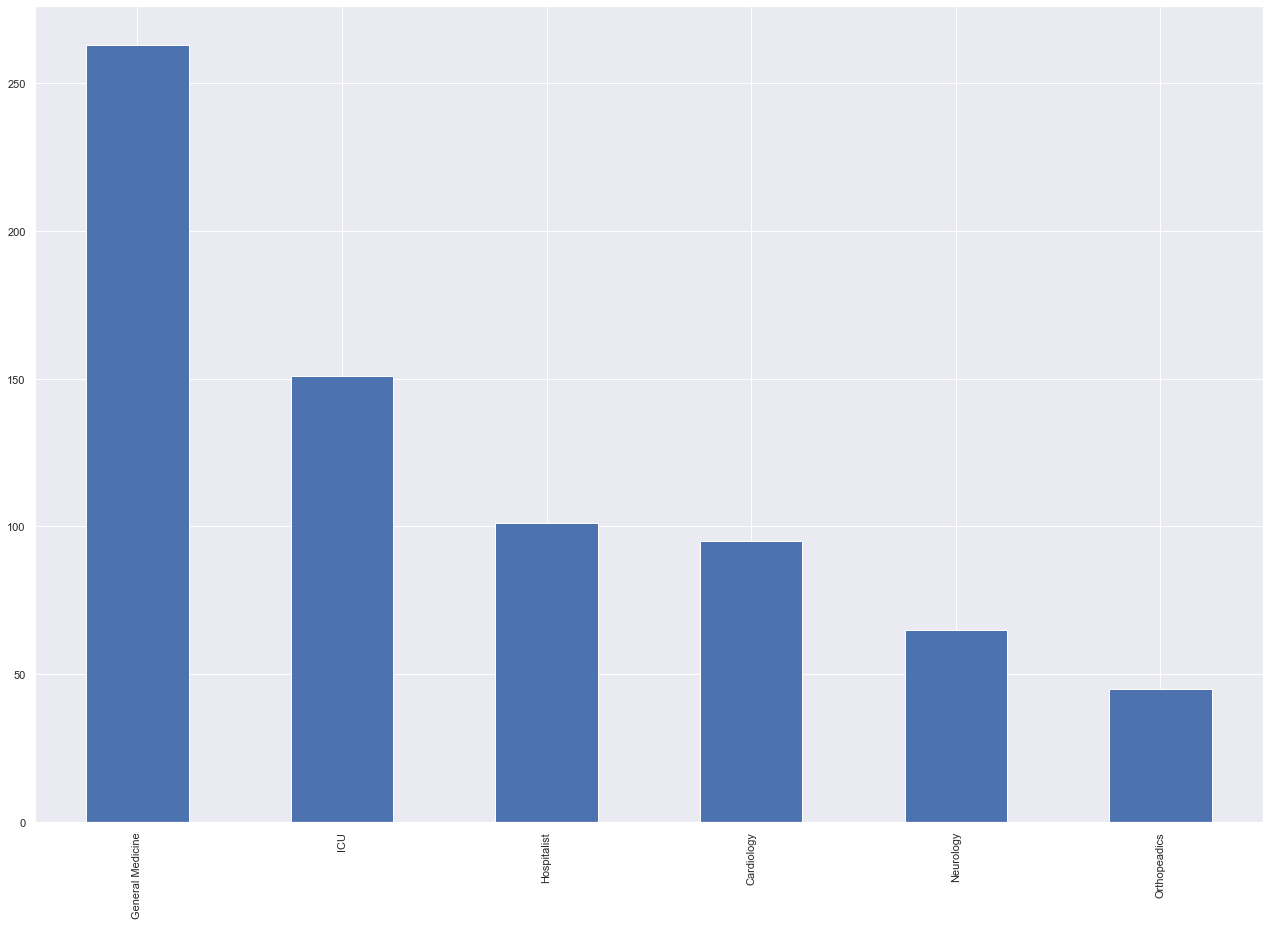

In [52]:
df=pd.read_excel('HospitalDatabase.xlsx', 'Discharges')
df['Service'].value_counts().plot(kind='bar');

# Q 26. Using arrays and loops, find the count of patients based on gender.

In [53]:
workbook_url = 'HospitalDatabase.xlsx'
Patients_df = pd.read_excel(workbook_url,sheet_name='Patients')
Patients_df

,PatientID,FirstName,LastName,DateOfBirth,Gender,Race,Language
0,1,Lanni,Sue,1960-01-01 00:00:00.000,Male,White,English
1,2,Far,Myers,1985-11-15 02:08:42.090,Male,White,English
2,3,Devlin,Michael,1976-04-15 02:52:09.762,Male,White,English
3,4,Carmine,Texas,1968-10-15 03:32:13.635,Male,White,English
4,5,Tann,Bama,1962-05-01 19:12:58.950,Male,White,English
...,...,...,...,...,...,...,...
940,941,Wat,Fideler,1986-05-26 00:01:19.761,Male,Black/African-American,English
941,942,Wandie,Baythrop,1970-06-10 21:41:03.814,Male,Black/African-American,English
942,943,Diahann,Smeeton,1983-01-08 21:49:27.884,Male,Black/African-American,English
943,944,Panchito,Sharple,1963-06-05 07:57:05.569,Male,Black/African-American,English


In [54]:
arr = Patients_df['Gender'].to_numpy()
arr

array(['Male', 'Male', 'Male', 'Male', 'Male', 'Male', 'Male', 'Male',
       'Male', 'Male', 'Male', 'Male', 'Male', 'Male', 'Male', 'Male',
       'Male', 'Male', 'Male', 'Male', 'Male', 'Male', 'Male', 'Male',
       'Male', 'Female', 'Female', 'Female', 'Female', 'Female', 'Female',
       'Female', 'Female', 'Female', 'Female', 'Female', 'Female',
       'Female', 'Female', 'Female', 'Female', 'Female', 'Female',
       'Female', 'Female', 'Female', 'Female', 'Female', 'Female',
       'Female', 'Female', 'Female', 'Female', 'Female', 'Female',
       'Female', 'Female', 'Female', 'Female', 'Female', 'Female',
       'Female', 'Female', 'Female', 'Female', 'Female', 'Female',
       'Female', 'Female', 'Female', 'Female', 'Female', 'Female',
       'Female', 'Female', 'Female', 'Female', 'Female', 'Female',
       'Female', 'Female', 'Male', 'Male', 'Male', 'Male', 'Male', 'Male',
       'Male', 'Male', 'Male', 'Male', 'Male', 'Male', 'Male', 'Male',
       'Male', 'Male', 'Male',

In [55]:
totals = Counter(i for i in arr.tolist())
print('Number of Male Patients is',totals["Male"])
print('Number of Female Patients is',totals["Female"])

Number of Male Patients is 537
Number of Female Patients is 408


# Q 27. Plot a graph to count the patients based on discharge disposition.

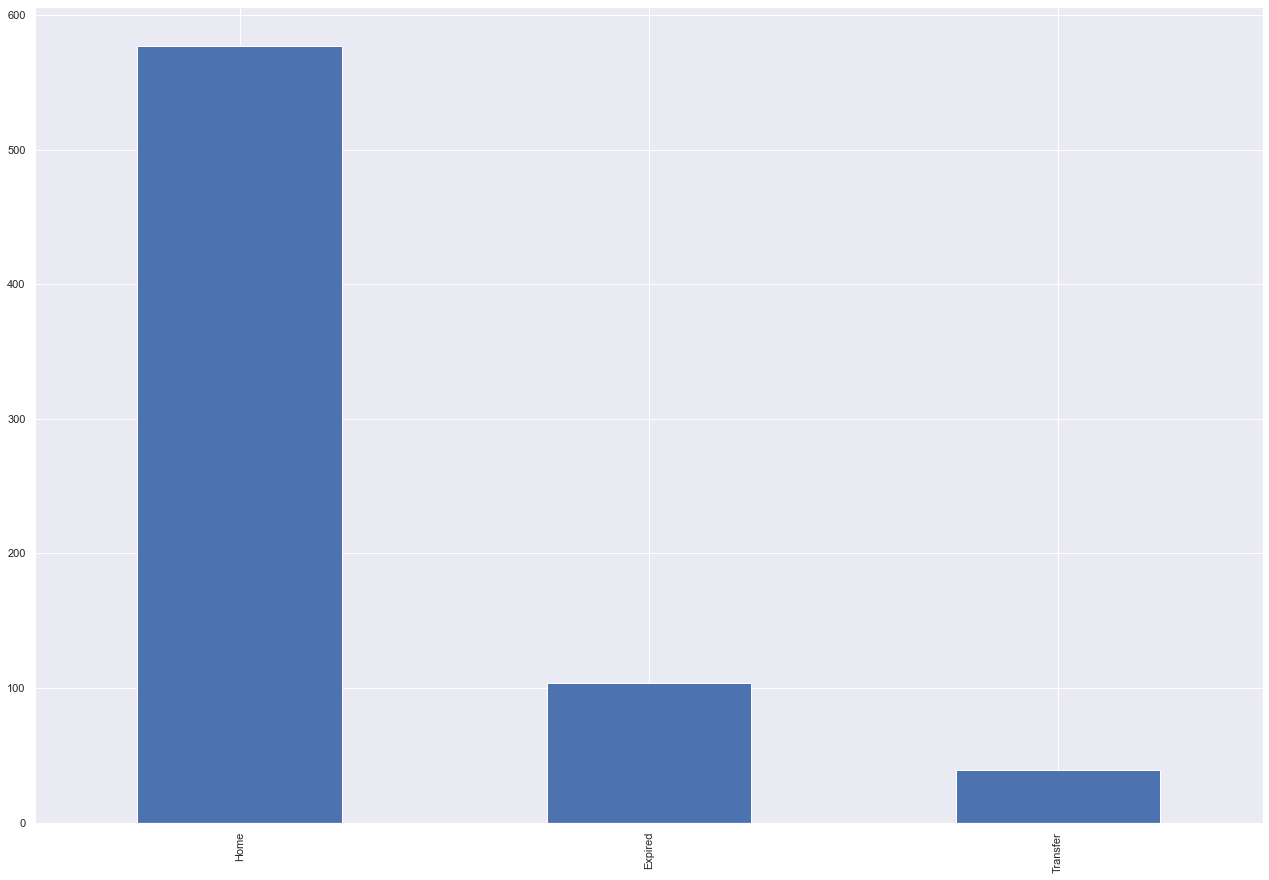

In [56]:
df=pd.read_excel('HospitalDatabase.xlsx', 'Discharges')
df['DischargeDisposition'].value_counts().plot(kind='bar');

# Q 28. Which reason of visit has maximum mortality rate.

In [57]:
workbook_url = 'HospitalDatabase.xlsx'
EDVisits_df = pd.read_excel(workbook_url,sheet_name='EDVisits')
EDVisits_df
workbook_url = 'HospitalDatabase.xlsx'
Discharges_df = pd.read_excel(workbook_url,sheet_name='Discharges')
max_mortality_val=Discharges_df['ExpectedMortality'].max()
max_mortality_val
EDVisits_df['visit'] = (EDVisits_df['ReasonForVisit'])
EDVisits_df
merged = EDVisits_df.merge(Discharges_df, left_on='PatientID', right_on='PatientID')
merged
df = merged.loc[(merged['ExpectedMortality'] == max_mortality_val)]
df['ReasonForVisit']

482    Pneumonia
Name: ReasonForVisit, dtype: object

# Answer : Therefore Pneumonia has the maximum mortality rate.

# Q 29. Calculate average LOS.

In [58]:
df=pd.read_excel('HospitalDatabase.xlsx', 'Discharges')
patient_sum=df['PatientID'].value_counts(ascending=False)
discharge_date=df['DischargeDate'].value_counts(ascending=False)
admission_date=df['AdmissionDate'].value_counts(ascending=False)
df_Difference=(df['DischargeDate'] - df['AdmissionDate']).dt.days
#print(df_Difference.sum())
#print(patient_sum.sum())
print(df_Difference.sum() / patient_sum.sum())

9.534722222222221


# Answer: Avg LOS = 9.53

# Q 30. Which patient id has most entries in readmission registry.

In [59]:
workbook_url = 'HospitalDatabase.xlsx'
ReAdmissionRegistry_df = pd.read_excel(workbook_url,sheet_name='ReAdmissionRegistry')
ReAdmissionRegistry_df
Patients_df = pd.read_excel(workbook_url,sheet_name='Patients')
Patients_df
df_9 = Patients_df.merge(ReAdmissionRegistry_df, how = 'outer' ,indicator=True).iloc[0]
df_9['PatientID'].tolist()

1

# Answer: The patient id = 1 has most entries in readmission registry.

# Q 31. Find the count of White Spanish Male.

In [60]:
df=pd.read_excel('HospitalDatabase.xlsx', 'Patients')
s_bool_and = ((df['Language'] == 'Spanish') & (df['Gender'] == 'Male') & (df['Race'] == 'White'))
print(s_bool_and.sum())

15


# Q 32. Write a function to print the multipication table of the given number.

In [61]:
num = int(input("Print the multiplication table of? "))
for i in range(1, 11):
   print(num, 'x', i, '=', num*i)

Print the multiplication table of? 6
6 x 1 = 6
6 x 2 = 12
6 x 3 = 18
6 x 4 = 24
6 x 5 = 30
6 x 6 = 36
6 x 7 = 42
6 x 8 = 48
6 x 9 = 54
6 x 10 = 60


# Q 33. Using a bar chart, which Service had the lowest count of Expected Mortality?

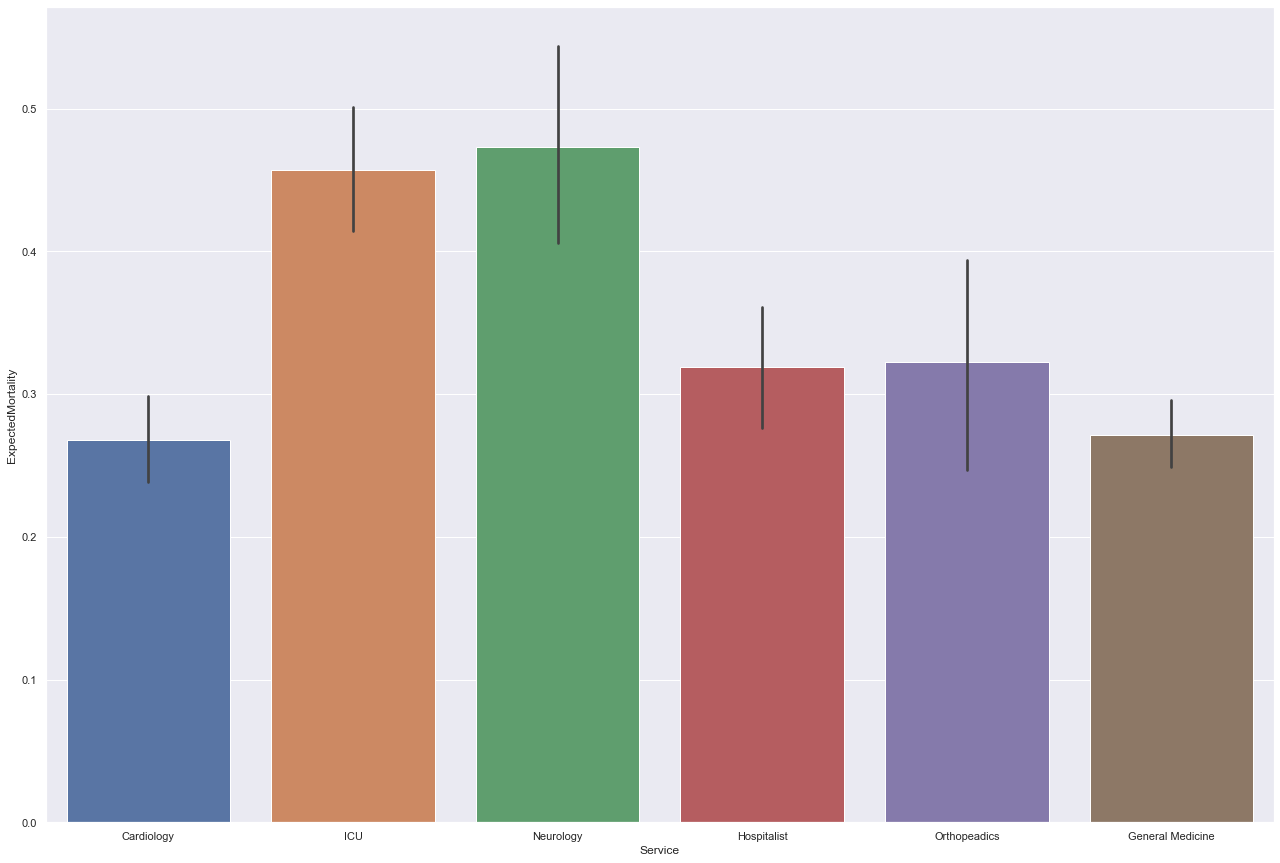

In [62]:
df=pd.read_excel('HospitalDatabase.xlsx', 'Discharges')
sns.barplot(x = 'Service',
            y = 'ExpectedMortality',
            data = df) 
# Show the plot
plt.show()

# Answer : Cardiology has the lowest expected mortality.

# Q 34. np.arange(1,31).reshape(6,5) Find the array slicing to get the elements with values 11,12,16,17.

In [63]:
x = np.reshape(np.arange(1,31),(6,5))
print("Original arrays:")
print(x)
print("Sliced elements:")
result = x[[2,2,3,3],[0,1,0,1]]
print(result)

Original arrays:
[[ 1  2  3  4  5]
 [ 6  7  8  9 10]
 [11 12 13 14 15]
 [16 17 18 19 20]
 [21 22 23 24 25]
 [26 27 28 29 30]]
Sliced elements:
[11 12 16 17]


# Q 35. np.arange(1,31).reshape(6,5), find array slicing for elements 2,8,14,20.

In [64]:
x = np.reshape(np.arange(1,31),(6,5))
print("Original arrays:")
print(x)
print("Sliced elements:")
result = x[[0,1,2,3],[1,2,3,4]]
print(result)

Original arrays:
[[ 1  2  3  4  5]
 [ 6  7  8  9 10]
 [11 12 13 14 15]
 [16 17 18 19 20]
 [21 22 23 24 25]
 [26 27 28 29 30]]
Sliced elements:
[ 2  8 14 20]


# Q 36. Create a correlation matrix on EDVisits.

      EDVisitID  PatientID               VisitDate         EDDischargeTime  \
0             1          1 2020-01-01 00:00:00.000 2020-01-01 11:20:22.924   
1            12         12 2020-01-01 02:45:40.302 2020-01-02 02:00:00.517   
2            13         13 2020-01-01 03:09:24.701 2020-01-01 05:00:20.852   
3            14         14 2020-01-01 03:12:19.349 2020-01-01 04:32:29.142   
4            15         15 2020-01-01 03:46:32.698 2020-01-01 06:24:52.741   
...         ...        ...                     ...                     ...   
1194       1183        929 2020-01-15 10:38:42.570 2020-01-16 02:31:52.023   
1195       1186        932 2020-01-15 11:52:37.540 2020-01-16 10:19:41.570   
1196       1187        933 2020-01-15 12:11:11.678 2020-01-15 16:41:15.223   
1197       1188        934 2020-01-15 12:21:46.006 2020-01-15 18:32:21.060   
1198       1189        935 2020-01-15 12:51:14.875 2020-01-15 23:40:41.456   

      Acuity ReasonForVisit EDDisposition  
0          1   Stom

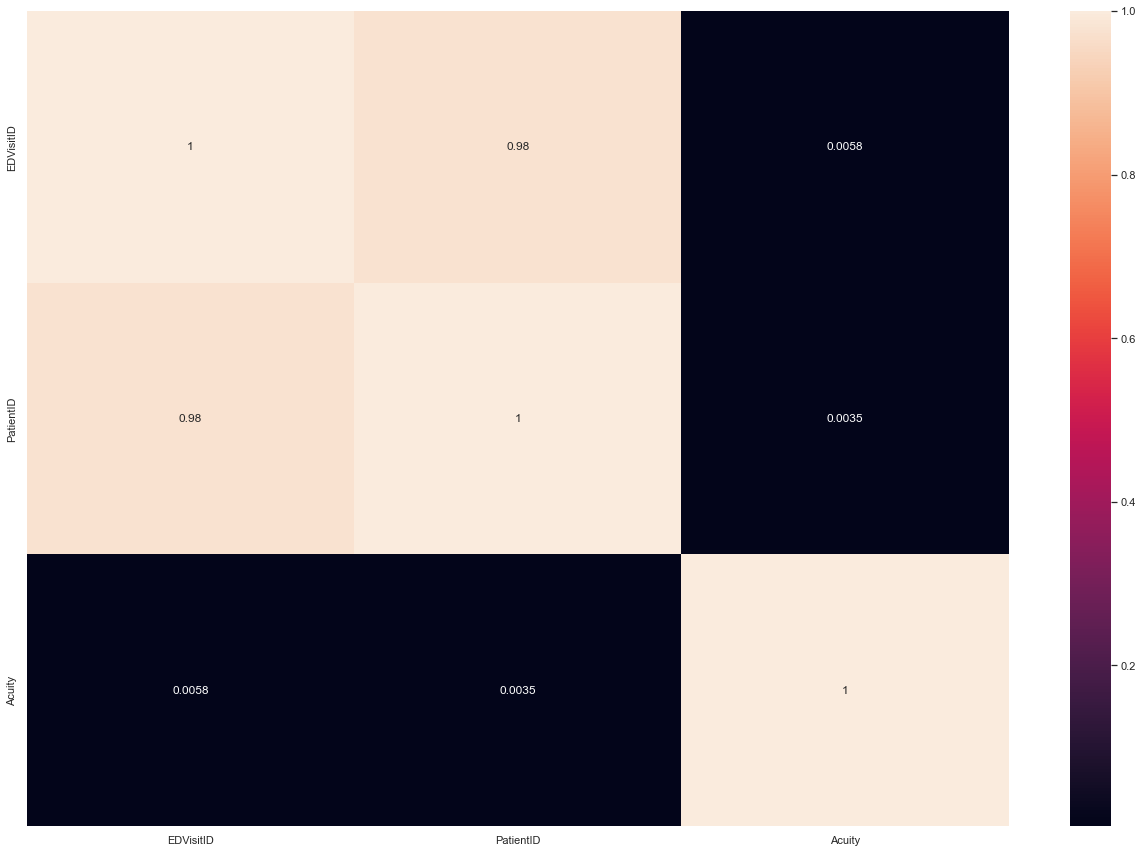

In [65]:
df=pd.read_excel('HospitalDatabase.xlsx', 'EDVisits')
print(df)
matrix = df.corr()
print("Correlation Matrix is : ")
print(matrix)
correlation = sns.heatmap(matrix, annot=True)

# Bonus : We have additionally showcased the correlation using heatmap

# Q 37. Write a function to print all the upper case letter of a given sentence.

In [66]:
string = "print the uppercase letters of a sentence."
a = string.upper()
print(a)

PRINT THE UPPERCASE LETTERS OF A SENTENCE.


# Q 38. Number of patients on 'Transfer' based on primary diagnosis.

In [67]:
df=pd.read_excel('HospitalDatabase.xlsx', 'ReAdmissionRegistry')
df.groupby('PrimaryDiagnosis')['DischargeDisposition'].apply(lambda x: (x=='Transfer').sum()).reset_index(name='count')

,PrimaryDiagnosis,count
0,AMI,0
1,Afib,1
2,Broken Leg,0
3,Diabetes,7
4,Fever,0
5,Flu,2
6,Heart Failure,9
7,Hip Fracture,0
8,Hypertension,0
9,Kidney Failure,0


# Answer: These are the number of patients on 'Transfer' based on primary diagnosis.

# Q 39. Get the FirstName, LastName of the Patients whose reason for visit is Migraine. Use EDUnique Sheet for reason for visit.

In [68]:
workbook_url = 'HospitalDatabase.xlsx'
EDUnique_df = pd.read_excel(workbook_url,sheet_name='EDUnique')
EDUnique_df
workbook_url = 'HospitalDatabase.xlsx'
Patients_df = pd.read_excel(workbook_url,sheet_name='Patients')
Patients_df
sheets=pd.read_excel('HospitalDatabase.xlsx',sheet_name=['EDUnique','Patients'])
sheets 
Patients_df['FullName'] = (Patients_df['FirstName']+' '+Patients_df['LastName'])
Patients_df[EDUnique_df['ReasonForVisit']=='Migraine']['FullName']

1               Far Myers
3           Carmine Texas
22            Walter Time
44        Barret Doubrava
46           Cristen Nock
              ...        
908      Freeland Hawford
921      Georgianna Group
928       Ediva MacTeague
930    Letti Landsborough
935       Philippa Slocum
Name: FullName, Length: 116, dtype: object

# Q 40. Plot a graph showing the count of patients for the reason visited the hospotal.

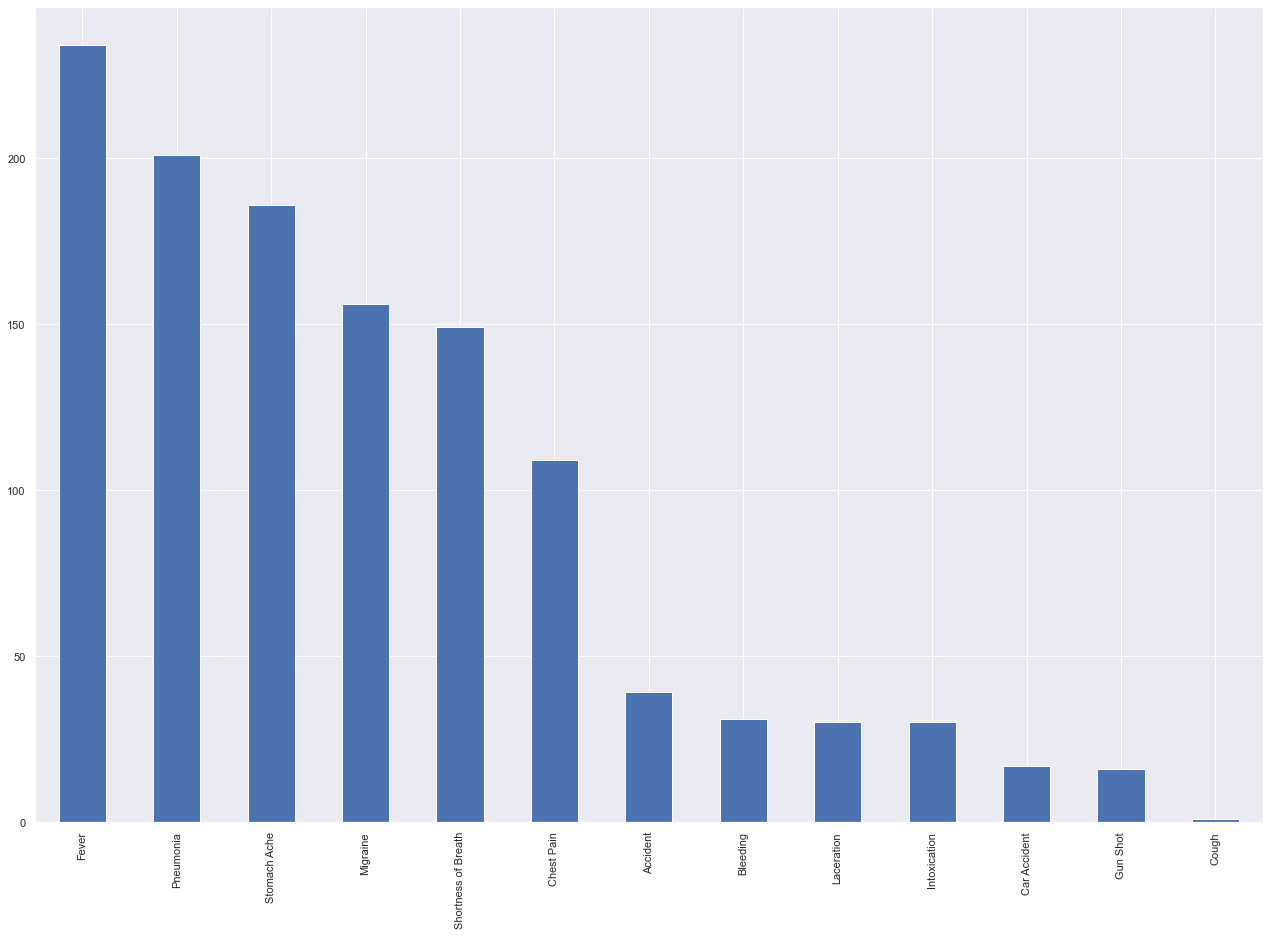

In [69]:
df=pd.read_excel('HospitalDatabase.xlsx', 'EDVisits')
df['ReasonForVisit'].value_counts().plot(kind='bar');

# Q 41. Find the visit type with maximum 'No Show'.

In [198]:
workbook_url = 'HospitalDatabase.xlsx'
AmbulatoryVisits_df = pd.read_excel(workbook_url,sheet_name='AmbulatoryVisits')
AmbulatoryVisits_df

,VisitID,PatientMRN,ProviderID,DateofVisit,DateScheduled,VisitDepartmentID,VisitType,BloodPressureSystolic,BloodPressureDiastolic,Pulse,VisitStatus
0,202,840,29,2019-03-19,2019-03-13 07:59:24.000,10,Physical,188.0,144.143427,83.044920,No Show
1,436,820,25,2019-03-19,2019-02-24 07:10:31.043,3,Follow Up,179.0,118.876808,90.309544,No Show
2,794,879,30,2019-04-02,2019-03-19 01:41:55.656,11,Telemedicine,133.0,98.749563,80.859776,No Show
3,799,884,37,2019-03-03,2019-02-25 01:25:39.696,4,Telemedicine,132.0,98.001270,82.184737,No Show
4,515,32,26,2019-03-16,2019-02-20 06:44:59.617,11,Telemedicine,131.0,85.115632,89.192362,No Show
...,...,...,...,...,...,...,...,...,...,...,...
945,788,873,1,2019-03-27,2019-03-10 17:19:48.264,5,Telemedicine,187.0,126.695141,70.049167,Canceled
946,703,855,36,2019-03-12,2019-02-19 02:27:52.664,10,Follow Up,182.0,140.703502,73.380812,Canceled
947,481,865,13,2019-05-03,2019-04-25 13:37:57.501,12,New,150.0,84.841197,61.625454,Canceled
948,398,635,10,2019-02-09,2019-02-08 11:40:35.137,1,Physical,177.0,125.037534,53.287036,Canceled


In [199]:
No_Show_df = AmbulatoryVisits_df.loc[(AmbulatoryVisits_df['VisitStatus'] == 'No Show')]
No_Show_df['VisitType'].value_counts()

Telemedicine    74
Follow Up       41
Physical        39
Name: VisitType, dtype: int64

# Answer : The visit type Telemedicine has the maximum 'No Show'.

# Q 42. Using loc , get the details of the providers where providerId is between 11 and 20 and ProviderSpecialty is Surgery.

In [71]:
df=pd.read_csv('HospitalDatabase-Providers (2).csv')
df.loc[(df['ProviderSpecialty']=='Surgery'),:]

,ProviderID,ProviderName,ProviderSpecialty,ProviderDateOnStaff
9,10,Fred Man,Surgery,3/17/1998
10,11,Kim Kimberly,Surgery,5/10/1998
11,12,Sarah Ab,Surgery,8/18/1998
12,13,Abigail Marriot,Surgery,11/8/1998
13,14,Dave Yu,Surgery,6/26/1999
14,15,Christian Saint,Surgery,8/27/2000
15,16,Perry Pardon,Surgery,2/13/2001


# Q 43. Write a regular expression to find all the digits and numbers in the string.

In [72]:
string = 'hello 12 hi 89. Howdy 34'
pattern = '\d+'

result = re.findall(pattern, string) 
print(result)

['12', '89', '34']


# Q 44. Create a pivot table displaying average LOS based on Service and Primary Diagnosis.

In [73]:
%matplotlib inline
df=pd.read_csv('HospitalDatabase-Discharges.csv')
df

,AdmissionID,PatientID,AdmissionDate,DischargeDate,DischargeDisposition,Service,PrimaryDiagnosis,ExpectedLOS,ExpectedMortality
0,1,9,1/1/2018,1/7/2018,Expired,Cardiology,AMI,9.646857,0.061540
1,257,93,1/6/2018,1/18/2018,Expired,Cardiology,Broken Leg,6.816558,0.628827
2,152,101,1/7/2018,1/11/2018,Expired,Cardiology,Kidney Failure,6.580273,0.573887
3,361,102,1/7/2018,1/15/2018,Expired,Cardiology,Afib,12.794536,0.222163
4,258,103,1/7/2018,1/15/2018,Expired,Cardiology,Broken Leg,2.639297,0.055468
...,...,...,...,...,...,...,...,...,...
715,715,716,2/21/2018,3/6/2018,Transfer,ICU,Heart Failure,11.362095,0.370695
716,698,723,2/22/2018,2/26/2018,Transfer,ICU,Heart Failure,10.262312,0.812930
717,704,724,2/22/2018,2/27/2018,Transfer,General Medicine,Pneumonia,6.036234,0.094128
718,716,733,2/22/2018,3/5/2018,Transfer,ICU,Heart Failure,13.323413,0.490892


Method 2:

In [74]:
pd.pivot_table(df,index=['Service','PrimaryDiagnosis'],values='ExpectedLOS',aggfunc='mean',margins=True)

ExpectedLOS
Service          PrimaryDiagnosis               
Cardiology       AMI                   12.414202
                 Afib                  13.162920
                 Broken Leg             3.911826
                 Flu                    3.970428
                 Heart Failure         13.014044
                 Kidney Failure         6.580273
General Medicine Broken Leg             3.368132
                 Diabetes               5.665298
                 Fever                  6.803796
                 Flu                    6.141753
                 Hypertension           5.369365
                 Kidney Failure         5.943163
                 Laceration             6.771154
                 Pneumonia              6.140270
                 Stroke                 7.173333
Hospitalist      AMI                   13.828290
                 Broken Leg             7.125069
                 Diabetes               7.874359
                 Fever                  8.865651
                 Flu                    7.033979
                 Hypertension           7.864913
                 Kidney Failure         7.850346
                 Knee Replacement       2.255705
                 Laceration             7.069360
                 Pneumonia              8.146240
                 Stroke                15.349671
ICU              AMI                   12.503213
                 Afib                   9.651522
                 Fever                  3.860693
                 Flu                    4.953871
                 Heart Failure         12.784620
                 Hypertension           5.092533
                 Kidney Failure         9.045995
                 Laceration            10.101443
                 Pneumonia             13.523626
                 Spinal Cord Injury    15.276540
                 Stroke                13.297978
Neurology        AMI                   10.482847
                 Flu                    6.700593
                 Heart Failure         12.737565
                 Hypertension           4.276454
                 Migraine              12.202213
                 Pain                  11.441453
                 Pneumonia              7.527330
                 Stroke                12.745608
Orthopeadics     Hip Fracture           3.474971
                 Knee Replacement       3.702839
All                                     8.824589

<AxesSubplot:xlabel='Service', ylabel='PrimaryDiagnosis'>

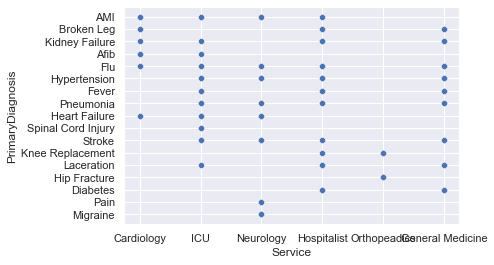

In [75]:
sns.scatterplot(data=df,x='Service',y='PrimaryDiagnosis')

# Bonus : Giving a scatter plot representation of services vs. primary diagnosis.

# Q 45. Calculate mortality by diagnosis.

In [220]:
df=pd.read_csv('HospitalDatabase-Discharges.csv')
Diagnosis= df["PrimaryDiagnosis"].unique()
count=int(len(Diagnosis))
i=0
while (i < count):
    df1=df.loc[(df['DischargeDisposition'] == "Expired") & (df['PrimaryDiagnosis'] == Diagnosis[i])]
    df2=df.loc[(df['PrimaryDiagnosis'] == Diagnosis[i])]
    exp_num = int(len(df1))
    total_num= int(len(df2))
    mortality= exp_num/total_num
    print(" Primary Diagnosis: ",Diagnosis[i],"\n","Mortality: ",mortality,"\n")
    i+=1

 Primary Diagnosis:  AMI 
 Mortality:  0.125 

 Primary Diagnosis:  Broken Leg 
 Mortality:  0.3333333333333333 

 Primary Diagnosis:  Kidney Failure 
 Mortality:  0.1 

 Primary Diagnosis:  Afib 
 Mortality:  0.36363636363636365 

 Primary Diagnosis:  Flu 
 Mortality:  0.1375 

 Primary Diagnosis:  Hypertension 
 Mortality:  0.32 

 Primary Diagnosis:  Fever 
 Mortality:  0.21052631578947367 

 Primary Diagnosis:  Pneumonia 
 Mortality:  0.0903954802259887 

 Primary Diagnosis:  Heart Failure 
 Mortality:  0.20512820512820512 

 Primary Diagnosis:  Spinal Cord Injury 
 Mortality:  1.0 

 Primary Diagnosis:  Stroke 
 Mortality:  0.10294117647058823 

 Primary Diagnosis:  Knee Replacement 
 Mortality:  0.08695652173913043 

 Primary Diagnosis:  Laceration 
 Mortality:  0.06896551724137931 

 Primary Diagnosis:  Hip Fracture 
 Mortality:  0.13043478260869565 

 Primary Diagnosis:  Diabetes 
 Mortality:  0.140625 

 Primary Diagnosis:  Pain 
 Mortality:  0.14285714285714285 

 Primary Dia

<AxesSubplot:xlabel='PrimaryDiagnosis'>

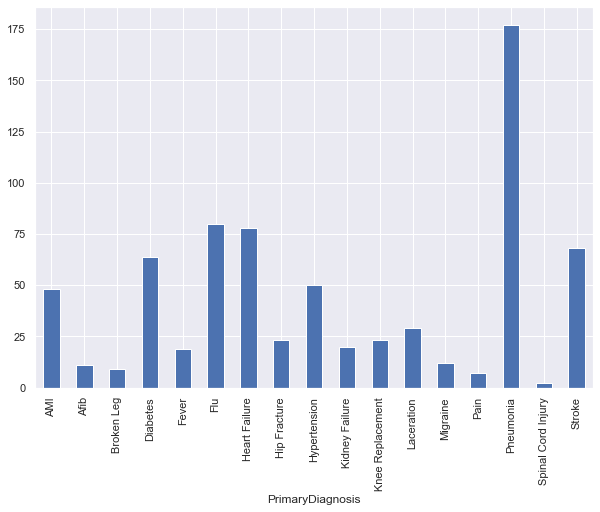

In [166]:
df.groupby(['PrimaryDiagnosis']).count()['ExpectedMortality'].plot(kind='bar',figsize=(10,7))

# Bonus : Represented mortality by diagnosis in a bar chart.

# Q 46. Write a code to split a sentence into words using regex.

In [79]:
s = "She is so nice!"
x = regex.split(r"\s+|\b(?!^|$)", s, flags=regex.VERSION1)

print(x)

['She', '', 'is', '', 'so', '', 'nice', '!']


# Q 47. Using indexing , loc to retrieve the row with maximum BloodPressureSystolic.

In [80]:
df=pd.read_csv('HospitalDatabase-AmulateryVisit.csv')
df.loc[df.BloodPressureSystolic.argmax()]

VisitID                            933
PatientMRN                         884
ProviderID                          27
DateofVisit                  2/14/2019
DateScheduled                1/22/2019
VisitDepartmentID                   12
VisitType                 Telemedicine
BloodPressureSystolic            190.0
BloodPressureDiastolic      143.989174
Pulse                        74.976879
VisitStatus                  Completed
Name: 236, dtype: object

# Answer : Maximum BloodPressureSystolic is 190.0

# Q 48. Display the average LOS based on Service and Discharge Disposition(Maintain the column Hierarchy).

In [81]:
df=pd.read_csv('HospitalDatabase-ReAdmissionRegistry.csv')
pd.pivot_table(df,index=['Service','DischargeDisposition'],values='ExpectedLOS',aggfunc='mean',margins=True)

ExpectedLOS
Service          DischargeDisposition             
Cardiology       Expired                  9.202626
                 Home                    12.864936
                 Transfer                11.818403
General Medicine Expired                  5.874003
                 Home                     6.105696
                 Transfer                 6.116124
Hospitalist      Expired                  6.775636
                 Home                     8.009046
                 Transfer                 5.701389
ICU              Expired                  9.919063
                 Home                    13.451158
                 Transfer                11.989238
Neurology        Expired                  9.384312
                 Home                    12.538859
                 Transfer                11.469198
Orthopeadics     Expired                  3.943883
                 Home                     3.508337
                 Transfer                 4.842255
All                                       8.824589

# Q 49. Retrieve the rows where SBP<140 and DBP<80.

In [82]:
df=pd.read_csv('HospitalDatabase-AmulateryVisit.csv')
df=df[(df['BloodPressureDiastolic']<80) & (df['BloodPressureSystolic']<140)]
df

,VisitID,PatientMRN,ProviderID,DateofVisit,DateScheduled,VisitDepartmentID,VisitType,BloodPressureSystolic,BloodPressureDiastolic,Pulse,VisitStatus
5,809,894,31,3/13/2019,2/28/2019,2,Physical,121.0,57.692485,60.402573,No Show
16,707,859,36,3/16/2019,2/26/2019,6,Follow Up,137.0,72.756586,64.071361,No Show
18,503,887,12,1/21/2019,1/7/2019,7,Follow Up,131.0,74.163851,97.248671,No Show
19,710,862,1,3/19/2019,3/3/2019,9,Telemedicine,127.0,66.406797,94.537837,No Show
23,711,863,1,3/20/2019,3/10/2019,10,Telemedicine,124.0,77.303553,77.926874,No Show
...,...,...,...,...,...,...,...,...,...,...,...
909,177,815,32,2/22/2019,2/4/2019,9,Follow Up,122.0,67.615828,52.742629,Canceled
929,786,871,34,3/25/2019,2/26/2019,3,Telemedicine,122.0,78.210501,53.760978,Canceled
932,394,623,6,2/5/2019,1/10/2019,9,Physical,130.0,75.114100,80.951071,Canceled
941,399,638,11,2/10/2019,2/2/2019,2,Physical,121.0,64.896818,68.496869,Canceled


# Q 50. Which departmentID has maximum number of visits scheduled.

In [83]:
df=pd.read_csv('HospitalDatabase-AmulateryVisit.csv')
df.loc[df.VisitDepartmentID.argmax()]

VisitID                            721
PatientMRN                         873
ProviderID                          11
DateofVisit                  3/30/2019
DateScheduled                3/17/2019
VisitDepartmentID                   12
VisitType                 Telemedicine
BloodPressureSystolic            145.0
BloodPressureDiastolic       96.075925
Pulse                        87.591451
VisitStatus                    No Show
Name: 17, dtype: object

# Answer : DepartmentID 12 has maximum number of visits scheduled.

# Q 51. Display patient details where "ReasonForVisit" is either 'Migraine' or 'Pneumonia' and Acuity is 2 or more.

In [84]:
workbook_url = 'HospitalDatabase.xlsx'
Edvisits_df = pd.read_excel(workbook_url,sheet_name='EDVisits')
Edvisits_df
Edvisits_df.loc[(Edvisits_df['Acuity']>2) & ((Edvisits_df['ReasonForVisit']=='Migraine') | (Edvisits_df['ReasonForVisit']=='Pneumonia'))]

,EDVisitID,PatientID,VisitDate,EDDischargeTime,Acuity,ReasonForVisit,EDDisposition
3,14,14,2020-01-01 03:12:19.349,2020-01-01 04:32:29.142,3,Migraine,Admitted
12,30,30,2020-01-01 07:25:54.177,2020-01-01 23:30:20.151,3,Pneumonia,Admitted
13,31,31,2020-01-01 07:32:51.917,2020-01-01 19:55:46.991,4,Pneumonia,Admitted
16,44,44,2020-01-01 11:41:20.981,2020-01-02 05:18:13.677,4,Pneumonia,Admitted
21,53,53,2020-01-01 14:28:21.684,2020-01-01 22:29:33.906,4,Pneumonia,Admitted
...,...,...,...,...,...,...,...
491,1158,904,2020-01-15 02:06:42.088,2020-01-15 07:04:01.523,4,Pneumonia,Admitted
496,1167,913,2020-01-15 05:09:22.987,2020-01-16 03:57:13.244,4,Pneumonia,Admitted
498,1169,915,2020-01-15 05:30:02.889,2020-01-15 18:47:12.044,3,Migraine,Admitted
499,1170,916,2020-01-15 05:57:29.834,2020-01-15 06:03:50.631,4,Pneumonia,Admitted


# Q 52. Retrieve the row with minimum DBP using sorting technique.

In [85]:
df=pd.read_csv('HospitalDatabase-AmulateryVisit.csv')
df['BloodPressureDiastolic'].sort_values()

757    51.695653
456    54.099878
118    54.285242
231    56.594973
545    57.043944
         ...    
805          NaN
807          NaN
808          NaN
810          NaN
813          NaN
Name: BloodPressureDiastolic, Length: 950, dtype: float64

In [86]:
df['BloodPressureDiastolic'].min(axis=0)

51.6956525

# Answer : Based on what we sorted here the min DBP is 51.6956525

# Q 53.Take the ReasonForVisit from user, find the number of patients admitted with that ReasonForVisit.

In [189]:
df=pd.read_csv('HospitalDatabase-EDVisits.csv')
user=input('Reason for visit ')

Reason for visit Migraine


In [191]:
print("The number of patients admitted with the reason of visit as ", user + " is :")
print(df['ReasonForVisit'].value_counts()[user])

The number of patients admitted with the reason of visit as  Migraine is :
156


# Q 54. Mortality O.E.

In [200]:
import pandas as pd
df=pd.read_csv('HospitalDatabase-Discharges.csv')

In [201]:
df_DischargeDisposition=df['DischargeDisposition'].value_counts()
df_DischargeDisposition

Home        577
Expired     104
Transfer     39
Name: DischargeDisposition, dtype: int64

In [202]:
df_ExpectedMortality=df['ExpectedMortality'].sum()
df_ExpectedMortality

243.40526924887

In [203]:
df_originalMortility=df_ExpectedMortality/df_DischargeDisposition
df_originalMortility

Home        0.421846
Expired     2.340435
Transfer    6.241161
Name: DischargeDisposition, dtype: float64

# Answer :  Mortality O.E.= (Expired) 2.340435

# Q 55. Create a bar chart on service & expected length of stay.

<AxesSubplot:xlabel='Service', ylabel='ExpectedLOS'>

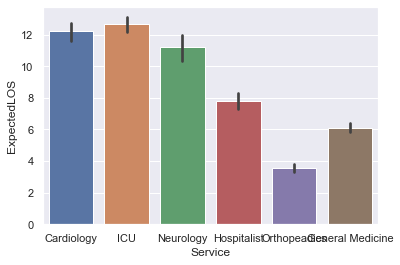

In [89]:
df=pd.read_csv('HospitalDatabase-Discharges.csv')
sns.barplot(x='Service',y='ExpectedLOS',data=df)

# Q 56. Count of canceled status.

In [90]:
df=pd.read_csv('HospitalDatabase-AmulateryVisit.csv')
df['VisitStatus'].value_counts()

Completed    736
No Show      154
Canceled      60
Name: VisitStatus, dtype: int64

# Answer: The count of canceled status is 60.

# Q 57. Find the age prone to get stroke.

In [155]:
workbook_url = 'HospitalDatabase.xlsx'
Patients_df = pd.read_excel(workbook_url,sheet_name='Patients')
Patients_df

,PatientID,FirstName,LastName,DateOfBirth,Gender,Race,Language
0,1,Lanni,Sue,1960-01-01 00:00:00.000,Male,White,English
1,2,Far,Myers,1985-11-15 02:08:42.090,Male,White,English
2,3,Devlin,Michael,1976-04-15 02:52:09.762,Male,White,English
3,4,Carmine,Texas,1968-10-15 03:32:13.635,Male,White,English
4,5,Tann,Bama,1962-05-01 19:12:58.950,Male,White,English
...,...,...,...,...,...,...,...
940,941,Wat,Fideler,1986-05-26 00:01:19.761,Male,Black/African-American,English
941,942,Wandie,Baythrop,1970-06-10 21:41:03.814,Male,Black/African-American,English
942,943,Diahann,Smeeton,1983-01-08 21:49:27.884,Male,Black/African-American,English
943,944,Panchito,Sharple,1963-06-05 07:57:05.569,Male,Black/African-American,English


In [156]:
Patients_df['DateOfBirth'] = pd.to_datetime(Patients_df['DateOfBirth'])
Patients_df['Year'] = Patients_df['DateOfBirth'].dt.year
Patients_df['Age'] = 2022 - Patients_df['Year']
Patients_df

,PatientID,FirstName,LastName,DateOfBirth,Gender,Race,Language,Year,Age
0,1,Lanni,Sue,1960-01-01 00:00:00.000,Male,White,English,1960,62
1,2,Far,Myers,1985-11-15 02:08:42.090,Male,White,English,1985,37
2,3,Devlin,Michael,1976-04-15 02:52:09.762,Male,White,English,1976,46
3,4,Carmine,Texas,1968-10-15 03:32:13.635,Male,White,English,1968,54
4,5,Tann,Bama,1962-05-01 19:12:58.950,Male,White,English,1962,60
...,...,...,...,...,...,...,...,...,...
940,941,Wat,Fideler,1986-05-26 00:01:19.761,Male,Black/African-American,English,1986,36
941,942,Wandie,Baythrop,1970-06-10 21:41:03.814,Male,Black/African-American,English,1970,52
942,943,Diahann,Smeeton,1983-01-08 21:49:27.884,Male,Black/African-American,English,1983,39
943,944,Panchito,Sharple,1963-06-05 07:57:05.569,Male,Black/African-American,English,1963,59


In [157]:
Discharges_df = pd.read_excel(workbook_url,sheet_name='Discharges')
Discharges_df

,AdmissionID,PatientID,AdmissionDate,DischargeDate,DischargeDisposition,Service,PrimaryDiagnosis,ExpectedLOS,ExpectedMortality
0,1,9,2018-01-01,2018-01-07 18:06:06.408,Expired,Cardiology,AMI,9.646857,0.061540
1,257,93,2018-01-06,2018-01-18 02:59:04.667,Expired,Cardiology,Broken Leg,6.816558,0.628827
2,152,101,2018-01-07,2018-01-11 16:16:06.782,Expired,Cardiology,Kidney Failure,6.580273,0.573887
3,361,102,2018-01-07,2018-01-15 04:48:33.134,Expired,Cardiology,Afib,12.794536,0.222163
4,258,103,2018-01-07,2018-01-15 13:32:36.157,Expired,Cardiology,Broken Leg,2.639297,0.055468
...,...,...,...,...,...,...,...,...,...
715,715,716,2018-02-21,2018-03-06 03:31:05.262,Transfer,ICU,Heart Failure,11.362095,0.370695
716,698,723,2018-02-22,2018-02-26 15:09:02.584,Transfer,ICU,Heart Failure,10.262312,0.812930
717,704,724,2018-02-22,2018-02-27 07:59:32.385,Transfer,General Medicine,Pneumonia,6.036234,0.094128
718,716,733,2018-02-22,2018-03-05 12:31:55.958,Transfer,ICU,Heart Failure,13.323413,0.490892


In [159]:
# Merging Patients and Discharge tables
df_57 = Patients_df.merge(Discharges_df, how = 'outer',indicator=True)
df_57

,PatientID,FirstName,LastName,DateOfBirth,Gender,Race,Language,Year,Age,AdmissionID,AdmissionDate,DischargeDate,DischargeDisposition,Service,PrimaryDiagnosis,ExpectedLOS,ExpectedMortality,_merge
0,1,Lanni,Sue,1960-01-01 00:00:00.000,Male,White,English,1960,62,389.0,2018-01-01,2018-01-04 19:59:31.391,Home,Hospitalist,Kidney Failure,6.717771,0.010046,both
1,2,Far,Myers,1985-11-15 02:08:42.090,Male,White,English,1985,37,635.0,2018-01-01,2018-01-04 21:28:51.898,Home,General Medicine,Flu,3.825969,0.604562,both
2,3,Devlin,Michael,1976-04-15 02:52:09.762,Male,White,English,1976,46,606.0,2018-01-01,2018-01-04 22:28:23.672,Home,General Medicine,Flu,3.382493,0.266137,both
3,4,Carmine,Texas,1968-10-15 03:32:13.635,Male,White,English,1968,54,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,left_only
4,5,Tann,Bama,1962-05-01 19:12:58.950,Male,White,English,1962,60,587.0,2018-01-01,2018-01-05 05:47:04.933,Home,General Medicine,Flu,3.763352,0.307527,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
956,941,Wat,Fideler,1986-05-26 00:01:19.761,Male,Black/African-American,English,1986,36,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,left_only
957,942,Wandie,Baythrop,1970-06-10 21:41:03.814,Male,Black/African-American,English,1970,52,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,left_only
958,943,Diahann,Smeeton,1983-01-08 21:49:27.884,Male,Black/African-American,English,1983,39,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,left_only
959,944,Panchito,Sharple,1963-06-05 07:57:05.569,Male,Black/African-American,English,1963,59,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,left_only


In [160]:
# Dropping all rows that don't have PrimaryDiagnosis value as Stroke
df_57.drop(df_57[df_57['PrimaryDiagnosis'] != 'Stroke'].index, inplace = True)
df_57

,PatientID,FirstName,LastName,DateOfBirth,Gender,Race,Language,Year,Age,AdmissionID,AdmissionDate,DischargeDate,DischargeDisposition,Service,PrimaryDiagnosis,ExpectedLOS,ExpectedMortality,_merge
9,10,Granny,Man,1969-09-15 11:20:42.218,Male,White,English,1969,53,355.0,2018-01-01,2018-01-07 20:50:16.780,Transfer,ICU,Stroke,14.787084,0.106645,both
14,14,Gan,Yu,1970-06-02 06:22:54.675,Male,White,Spanish,1970,52,18.0,2018-01-18,2018-01-25 14:43:35.285,Home,General Medicine,Stroke,10.060740,0.253516,both
19,19,Daugherty,Conner,1960-04-04 10:00:34.189,Male,White,Spanish,1960,62,252.0,2018-01-01,2018-01-17 14:13:23.627,Home,Hospitalist,Stroke,15.349671,0.478003,both
35,30,Ala,Halpert,1986-11-26 10:44:22.628,Female,White,Spanish,1986,36,2.0,2018-01-02,2018-01-16 07:25:09.548,Home,General Medicine,Stroke,7.985315,0.212920,both
41,35,Fred,Tye,1966-04-14 06:01:07.169,Female,White,Spanish,1966,56,147.0,2018-01-02,2018-01-18 00:24:01.294,Home,Neurology,Stroke,13.042939,0.351937,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
615,601,Aurelie,Lerner,1983-07-24 02:55:54.675,Male,Black/African-American,English,1983,39,192.0,2018-02-16,2018-02-28 14:01:18.908,Home,Neurology,Stroke,13.499803,0.299733,both
616,602,Marjie,Walsh,1982-06-12 17:17:14.100,Male,Black/African-American,English,1982,40,47.0,2018-02-16,2018-03-04 04:43:09.738,Home,General Medicine,Stroke,7.245086,0.044968,both
625,611,Adolf,Ormes,1975-12-04 05:13:13.613,Male,Black/African-American,English,1975,47,48.0,2018-02-17,2018-02-24 23:03:41.580,Home,General Medicine,Stroke,6.904901,0.147814,both
656,642,Jerde,Endrizzi,1961-04-30 14:54:37.810,Female,Black/African-American,English,1961,61,102.0,2018-02-18,2018-02-28 08:32:49.644,Home,Neurology,Stroke,10.334429,0.077559,both


<AxesSubplot:xlabel='Age', ylabel='PrimaryDiagnosis'>

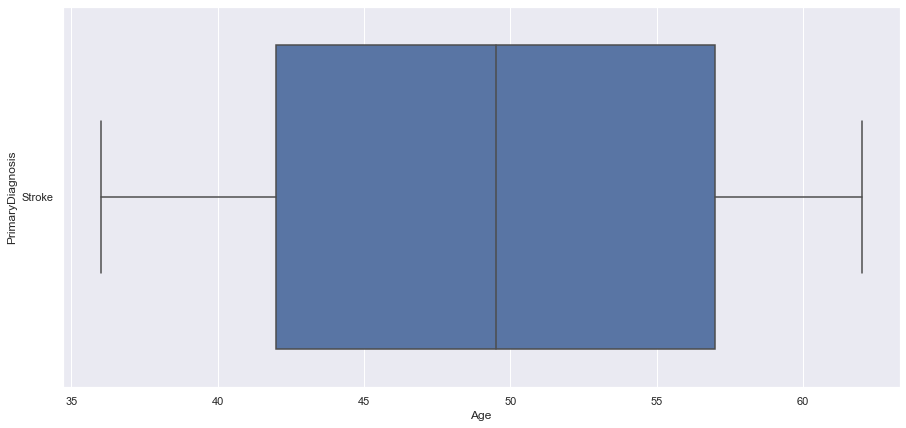

In [161]:
plt.figure(figsize=(15,7))
sns.boxplot(data=df_57,x='Age',y='PrimaryDiagnosis')

<AxesSubplot:xlabel='PrimaryDiagnosis', ylabel='Age'>

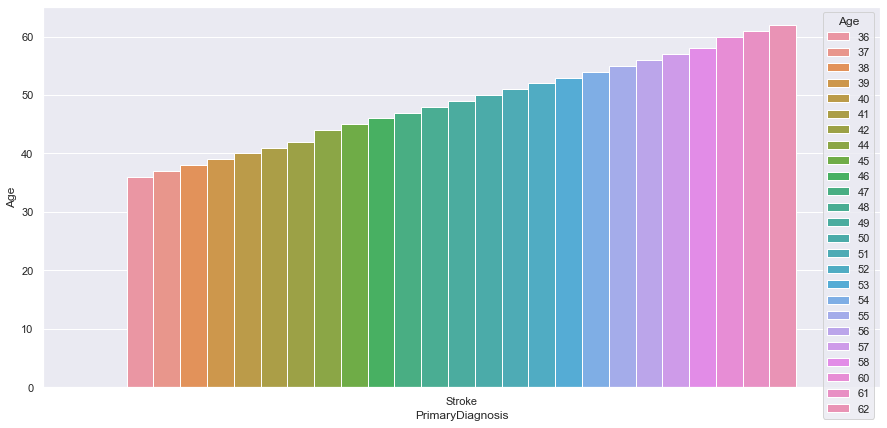

In [162]:
plt.figure(figsize=(15,7))
sns.barplot(data=df_57,x='PrimaryDiagnosis',y='Age', hue='Age')
# This plot will help to analyze how age will affect chances of stroke.

# OBSERVATION 1:- People between 36 to 62 tend to have a stroke.

<Figure size 1080x504 with 0 Axes>

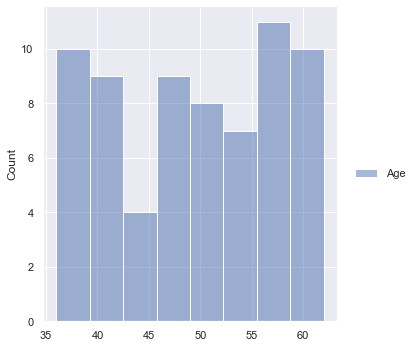

In [163]:
plt.figure(figsize=(15,7))
sns.displot(df_57[['Age','PrimaryDiagnosis']])
# This will plot a distribution plot of variable age

# Observation 2:- People between the range of 55-60 are most prone to have Stroke.

# Q 58.Display total count of patients service wise based on gender.

In [91]:
Patientsdf=pd.read_excel('HospitalDatabase.xlsx', 'Patients')
Dischargesdf=pd.read_excel('HospitalDatabase.xlsx', 'Discharges')
merged = Patients_df.merge(Discharges_df, left_on='PatientID', right_on='PatientID')
merged[['Service','Gender']].value_counts()

Service           Gender
General Medicine  Male      149
                  Female    114
ICU               Male       86
Hospitalist       Male       66
ICU               Female     65
Cardiology        Male       54
                  Female     41
Hospitalist       Female     35
Neurology         Female     34
                  Male       31
Orthopeadics      Male       23
                  Female     22
dtype: int64

# Q 59. Create a dataframe by splitting provider name to firstname and lastname with names for the columns.

In [92]:
df=pd.read_csv('HospitalDatabase-Providers (2).csv')
seprated=df['ProviderName'].str.split(expand=True)
seprated

,0,1
0,Sally,Sue
1,Mike,Myers
2,Jordan,Michael
3,Ted,Texas
4,Ala,Bama
5,Harry,Kane
6,Barry,Bar
7,Ted,Green
8,Ted,Black
9,Fred,Man


# Q 60. Find the list of patients whose ExpectedLOS is greater than the value given by the user.

In [178]:
df=pd.read_csv('HospitalDatabase-ReAdmissionRegistry.csv')
df

,AdmissionID,PatientID,AdmissionDate,DischargeDate,DischargeDisposition,Service,PrimaryDiagnosis,ExpectedLOS,ExpectedMortality,ReadmissionFlag,DaysToReadmission,EDVisitAfterDischargeFlag
0,389,1,1/1/2018,1/4/2018,Home,Hospitalist,Kidney Failure,6.717771,0.010046,NaN,NaN,NaN
1,635,2,1/1/2018,1/4/2018,Home,General Medicine,Flu,3.825969,0.604562,1.0,2.0,1.0
2,606,3,1/1/2018,1/4/2018,Home,General Medicine,Flu,3.382493,0.266137,1.0,3.0,1.0
3,587,5,1/1/2018,1/5/2018,Home,General Medicine,Flu,3.763352,0.307527,1.0,4.0,1.0
4,640,6,1/1/2018,1/5/2018,Home,ICU,Heart Failure,13.650953,0.408898,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
715,521,738,2/22/2018,3/7/2018,Home,Cardiology,AMI,13.725405,0.388319,NaN,NaN,NaN
716,548,739,2/22/2018,3/8/2018,Home,ICU,Pneumonia,11.355456,0.088518,NaN,NaN,NaN
717,509,740,2/22/2018,3/8/2018,Home,Hospitalist,Pneumonia,4.819882,0.503308,NaN,NaN,NaN
718,605,741,2/22/2018,3/10/2018,Home,General Medicine,Flu,3.123064,0.655870,NaN,NaN,NaN


In [181]:
user=input('Enter the ExpectedLOS :')

Enter the ExpectedLOS :15.5


In [182]:
f_user = float(user)
df = df.loc[(df['ExpectedLOS'] > f_user)]
df

,AdmissionID,PatientID,AdmissionDate,DischargeDate,DischargeDisposition,Service,PrimaryDiagnosis,ExpectedLOS,ExpectedMortality,ReadmissionFlag,DaysToReadmission,EDVisitAfterDischargeFlag
6,549,8,1/1/2018,1/7/2018,Home,Hospitalist,Pneumonia,16.472257,0.526198,1.0,5.0,1.0
88,144,83,1/5/2018,1/17/2018,Home,ICU,Pneumonia,15.622700,0.395238,1.0,1.0,1.0
95,145,90,1/6/2018,1/15/2018,Home,ICU,Pneumonia,16.161806,0.824220,1.0,3.0,1.0
100,444,95,1/6/2018,1/19/2018,Home,ICU,Stroke,16.838918,0.958035,1.0,14.0,1.0
113,445,108,1/7/2018,1/22/2018,Home,ICU,Stroke,15.660602,0.639241,1.0,2.0,1.0
118,114,113,1/8/2018,1/14/2018,Home,ICU,Pneumonia,15.895307,0.629358,1.0,5.0,1.0
140,398,134,1/10/2018,1/15/2018,Expired,ICU,Pneumonia,16.225126,0.460186,NaN,NaN,1.0
210,161,208,1/16/2018,1/31/2018,Home,Cardiology,AMI,15.516297,0.419545,NaN,NaN,NaN
217,70,215,1/17/2018,1/26/2018,Home,ICU,Pneumonia,16.998213,0.394041,1.0,4.0,1.0
224,372,221,1/18/2018,1/21/2018,Home,Neurology,Stroke,15.573663,0.624283,1.0,5.0,1.0


# Q 61. Plot a graph by multiplotting on the same canvas (Take any set of x & y values).

C:\Users\AARAV_AARNA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\AARAV_AARNA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'AMI'),
  Text(1, 0, 'Broken Leg'),
  Text(2, 0, 'Kidney Failure'),
  Text(3, 0, 'Afib'),
  Text(4, 0, 'Flu'),
  Text(5, 0, 'Hypertension'),
  Text(6, 0, 'Fever'),
  Text(7, 0, 'Pneumonia'),
  Text(8, 0, 'Heart Failure'),
  Text(9, 0, 'Spinal Cord Injury'),
  Text(10, 0, 'Stroke'),
  Text(11, 0, 'Knee Replacement'),
  Text(12, 0, 'Laceration'),
  Text(13, 0, 'Hip Fracture'),
  Text(14, 0, 'Diabetes'),
  Text(15, 0, 'Pain'),
  Text(16, 0, 'Migraine')])

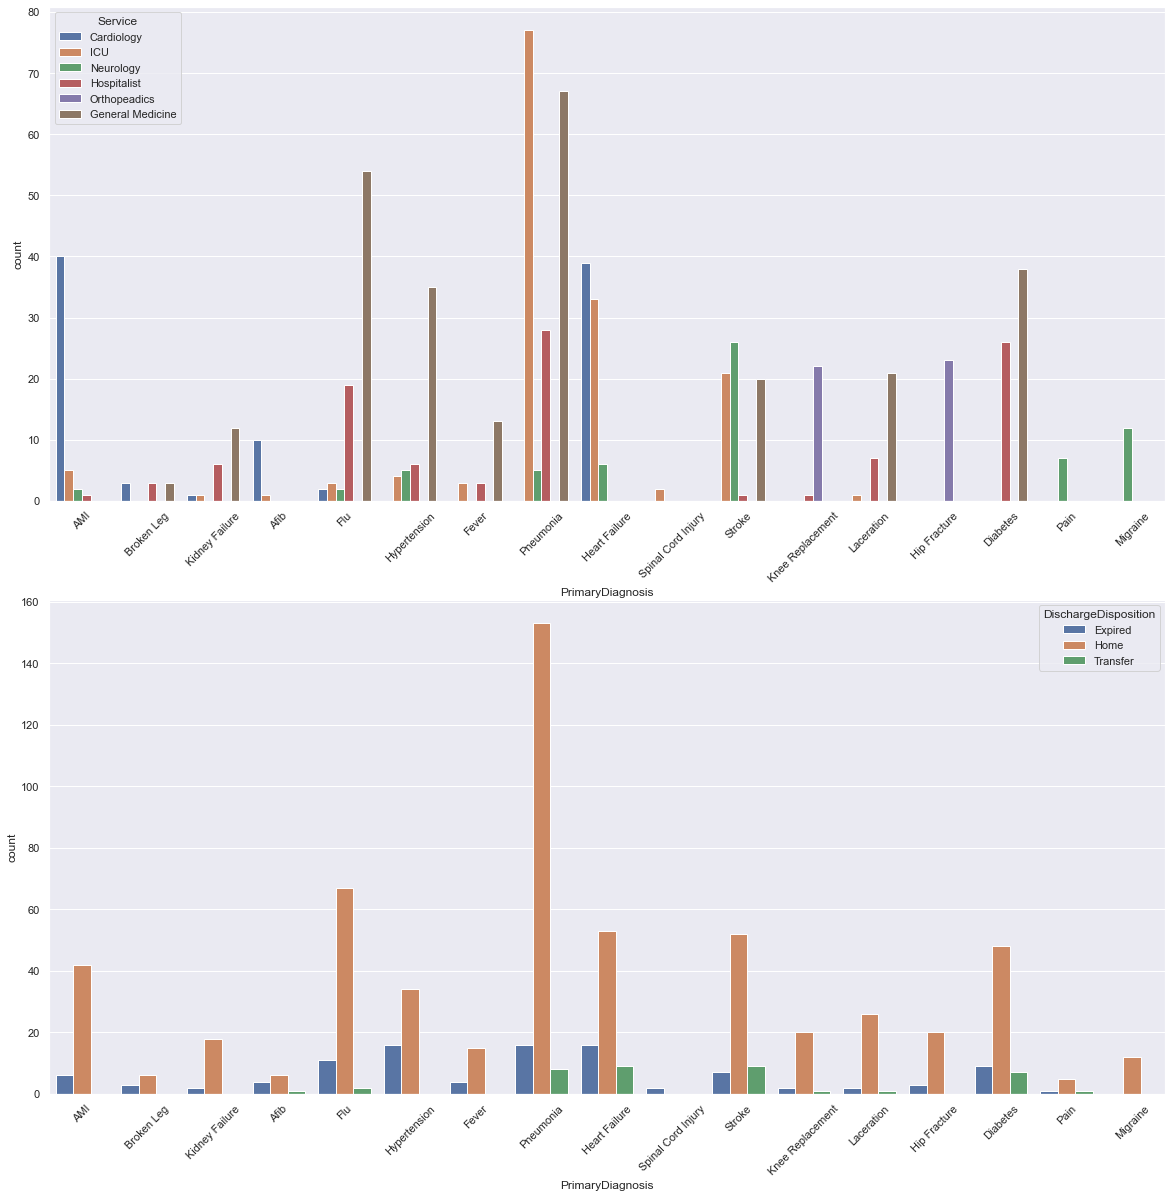

In [96]:
df = pd.read_excel('HospitalDatabase.xlsx', 'Discharges')
# Sub plot
# plt.subplot(Total no of rows, no of cols, plot no)

plt.figure(figsize = (20,20))

plt.subplot(2,1,1)
sns.countplot('PrimaryDiagnosis', hue ='Service', data = df)
plt.xticks(rotation = 45)

plt.subplot(2,1,2)
sns.countplot('PrimaryDiagnosis', hue ='DischargeDisposition', data = df)
plt.xticks(rotation = 45)

# Q 62. Display the data for all 'White Female' patients above the age of 50.

In [97]:
Patients_df['DateOfBirth'] = pd.to_datetime(Patients_df['DateOfBirth'])
Patients_df['Year'] = Patients_df['DateOfBirth'].dt.year
Patients_df['Age'] = 2022 - Patients_df['Year']
Patients_df
df = Patients_df.loc[(Patients_df['Age'] > 50) & 
              (Patients_df['Race'] == 'White') & (Patients_df['Gender']== 'Female')]
df

,PatientID,FirstName,LastName,DateOfBirth,Gender,Race,Language,FullName,Year,Age
28,29,Ted,Scott,1967-12-09 05:01:37.892,Female,White,Spanish,Ted Scott,1967,55
30,31,Harry,Ding,1960-10-08 01:42:51.212,Female,White,Spanish,Harry Ding,1960,62
33,34,Ted,Hue,1960-11-28 18:05:11.459,Female,White,Spanish,Ted Hue,1960,62
34,35,Fred,Tye,1966-04-14 06:01:07.169,Female,White,Spanish,Fred Tye,1966,56
39,40,Christian,Pow,1971-12-07 11:47:43.885,Female,White,Spanish,Christian Pow,1971,51
...,...,...,...,...,...,...,...,...,...,...
865,866,Jermayne,Lowndes,1970-12-09 04:49:48.933,Female,White,English,Jermayne Lowndes,1970,52
866,867,Gail,Inc,1967-03-10 08:18:47.908,Female,White,English,Gail Inc,1967,55
867,868,Des,Heindrick,1969-08-15 11:05:30.165,Female,White,English,Des Heindrick,1969,53
869,870,Hauck,Rubbens,1963-11-16 03:31:38.929,Female,White,English,Hauck Rubbens,1963,59


# Q 63. Using loc, retrieve the firstname and lastname of patients between indices 101 and 200.

In [98]:
# Using loc
df=pd.read_excel('HospitalDatabase.xlsx')
df_filt_2 = df.loc['101':'200', 'FirstName':'LastName']
df_filt_2

,FirstName,LastName
2,Devlin,Michael
3,Carmine,Texas
4,Tann,Bama
5,Jerrilyn,Kane
6,Skipton,Bar
...,...,...
196,Noam,Laguerre
197,Arie,Bayless
198,Janaye,O'Mohun
199,Fonz,Group


# Q 64. Using numpy functions, multiply the following arrays.
a=np.arange(6).reshape(2,3)
b=np.arange(6).reshape(3,2)"

In [99]:
array_a1=np.arange(6).reshape(2,3) 
array_b1=np.arange(6).reshape(3,2)
print(array_a1)

[[0 1 2]
 [3 4 5]]


In [100]:
print(array_b1)

[[0 1]
 [2 3]
 [4 5]]


In [101]:
# Multiply arrays
array_a1.dot(array_b1)

array([[10, 13],
       [28, 40]])

# Q 65. Get the number of patients based on service and primary diagnosis.

In [102]:
df = pd.read_excel('HospitalDatabase.xlsx', 'Discharges')
dg = df.groupby(["Service", "PrimaryDiagnosis"])
df_filt_3 = dg.count()
df_count = df_filt_3[['PatientID']]
df_count.rename({'PatientID':'CountOfPatients'}, axis=1)

CountOfPatients
Service          PrimaryDiagnosis                   
Cardiology       AMI                              40
                 Afib                             10
                 Broken Leg                        3
                 Flu                               2
                 Heart Failure                    39
                 Kidney Failure                    1
General Medicine Broken Leg                        3
                 Diabetes                         38
                 Fever                            13
                 Flu                              54
                 Hypertension                     35
                 Kidney Failure                   12
                 Laceration                       21
                 Pneumonia                        67
                 Stroke                           20
Hospitalist      AMI                               1
                 Broken Leg                        3
                 Diabetes                         26
                 Fever                             3
                 Flu                              19
                 Hypertension                      6
                 Kidney Failure                    6
                 Knee Replacement                  1
                 Laceration                        7
                 Pneumonia                        28
                 Stroke                            1
ICU              AMI                               5
                 Afib                              1
                 Fever                             3
                 Flu                               3
                 Heart Failure                    33
                 Hypertension                      4
                 Kidney Failure                    1
                 Laceration                        1
                 Pneumonia                        77
                 Spinal Cord Injury                2
                 Stroke                           21
Neurology        AMI                               2
                 Flu                               2
                 Heart Failure                     6
                 Hypertension                      5
                 Migraine                         12
                 Pain                              7
                 Pneumonia                         5
                 Stroke                           26
Orthopeadics     Hip Fracture                     23
                 Knee Replacement                 22

# Q 66. np.arange(1,31).reshape(6,5), find array slicing to get the elements 4,5,24,25,29,30.

In [103]:
array_a = np.arange(1,31).reshape(6,5)
print(array_a)

[[ 1  2  3  4  5]
 [ 6  7  8  9 10]
 [11 12 13 14 15]
 [16 17 18 19 20]
 [21 22 23 24 25]
 [26 27 28 29 30]]


In [104]:
print(array_a[0:1:,3:: ], array_a[4:5:,3:: ],array_a[5::,3:: ], )

[[4 5]] [[24 25]] [[29 30]]


# Q 67. Make a pivot table by the no. of patients from the admission date till discharge date.

In [205]:
df=pd.read_excel('HospitalDatabase.xlsx', 'Discharges')
df
df.pivot_table(index=['AdmissionDate','DischargeDate'],values='PatientID', aggfunc=['sum','count'],margins=True, margins_name='count_patients')

C:\Users\AARAV_AARNA\AppData\Local\Temp\ipykernel_38076\2694819974.py:3: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  df.pivot_table(index=['AdmissionDate','DischargeDate'],values='PatientID', aggfunc=['sum','count'],margins=True, margins_name='count_patients')
C:\Users\AARAV_AARNA\AppData\Local\Temp\ipykernel_38076\2694819974.py:3: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  df.pivot_table(index=['AdmissionDate','DischargeDate'],values='PatientID', aggfunc=['sum','count'],margins=True, margins_name='count_patients')


sum     count
                                            PatientID PatientID
AdmissionDate       DischargeDate                              
2018-01-01 00:00:00 2018-01-04 19:59:31.391         1         1
                    2018-01-04 21:28:51.898         2         1
                    2018-01-04 22:28:23.672         3         1
                    2018-01-05 05:47:04.933         5         1
                    2018-01-05 14:18:30.029         6         1
...                                               ...       ...
2018-02-22 00:00:00 2018-03-08 02:43:18.749       739         1
                    2018-03-08 09:27:18.377       740         1
                    2018-03-10 06:06:12.068       741         1
                    2018-03-10 20:38:30.568       742         1
count_patients      NaT                        263634       720

[721 rows x 2 columns]

# Q 68. Display the data where actual LOS is greater than expected LOS.

In [197]:
df=pd.read_excel('HospitalDatabase.xlsx', 'Discharges')
discharge_date=df['DischargeDate'].value_counts(ascending=False)
admission_date=df['AdmissionDate'].value_counts(ascending=False)
df['Actual_LOS'] = (df['DischargeDate'] - df['AdmissionDate']).dt.days
Expected_LOS=df['ExpectedLOS']
df.loc[df['Actual_LOS'] > df['ExpectedLOS'] ]

,AdmissionID,PatientID,AdmissionDate,DischargeDate,DischargeDisposition,Service,PrimaryDiagnosis,ExpectedLOS,ExpectedMortality,Actual_LOS
1,257,93,2018-01-06,2018-01-18 02:59:04.667,Expired,Cardiology,Broken Leg,6.816558,0.628827,12
4,258,103,2018-01-07,2018-01-15 13:32:36.157,Expired,Cardiology,Broken Leg,2.639297,0.055468,8
5,395,109,2018-01-07,2018-01-22 17:57:37.103,Expired,Cardiology,Flu,2.981758,0.192976,15
6,396,115,2018-01-08,2018-01-17 02:19:05.623,Expired,Cardiology,Flu,4.959098,0.254923,9
7,259,116,2018-01-08,2018-01-20 03:40:53.605,Expired,Cardiology,Broken Leg,2.279624,0.491274,12
...,...,...,...,...,...,...,...,...,...,...
712,703,703,2018-02-21,2018-02-27 08:53:38.211,Transfer,General Medicine,Pneumonia,3.539165,0.275691,6
713,709,708,2018-02-21,2018-03-01 05:59:22.116,Transfer,General Medicine,Diabetes,4.518876,0.455570,8
714,697,713,2018-02-21,2018-03-04 00:23:19.967,Transfer,General Medicine,Pneumonia,8.542970,0.201036,11
715,715,716,2018-02-21,2018-03-06 03:31:05.262,Transfer,ICU,Heart Failure,11.362095,0.370695,13


# Q 69. Details of the patients whose firstname or lastname contains string "lau" , should be case insensitive.

In [106]:
df = pd.read_excel('HospitalDatabase.xlsx', 'Patients')
df_Names = (df.FirstName.str.contains('LaU', flags=re.IGNORECASE) | 
            df.LastName.str.contains('LaU', flags=re.IGNORECASE))
df[df_Names]

,PatientID,FirstName,LastName,DateOfBirth,Gender,Race,Language
282,283,Lauren,Gaskal,1962-05-08 01:54:00.111,Female,Black/African-American,English
322,323,Lauren,Foort,1960-06-23 20:07:53.045,Female,White,English
369,370,Zulauf,Ellingham,1982-12-17 16:27:56.391,Female,White,English
382,383,Zulauf,LLC,1969-03-16 07:48:49.338,Female,White,English
454,455,Zulauf,Alvar,1961-10-02 08:24:17.334,Female,White,English
463,464,Zulauf,Manske,1965-06-22 02:49:28.667,Female,White,English
818,819,Zulauf,Bitcheno,1967-04-02 07:17:53.635,Female,White,English
830,831,Zulauf,O'Shavlan,1970-05-17 08:09:28.988,Female,White,English
850,851,Lemmy,Klausen,1973-06-18 06:19:43.475,Female,White,English
906,907,Jerrilyn,Klausen,1979-09-04 13:05:57.870,Male,Black/African-American,English


# Q 70. Plot a graph to show the distribution of expected mortality.

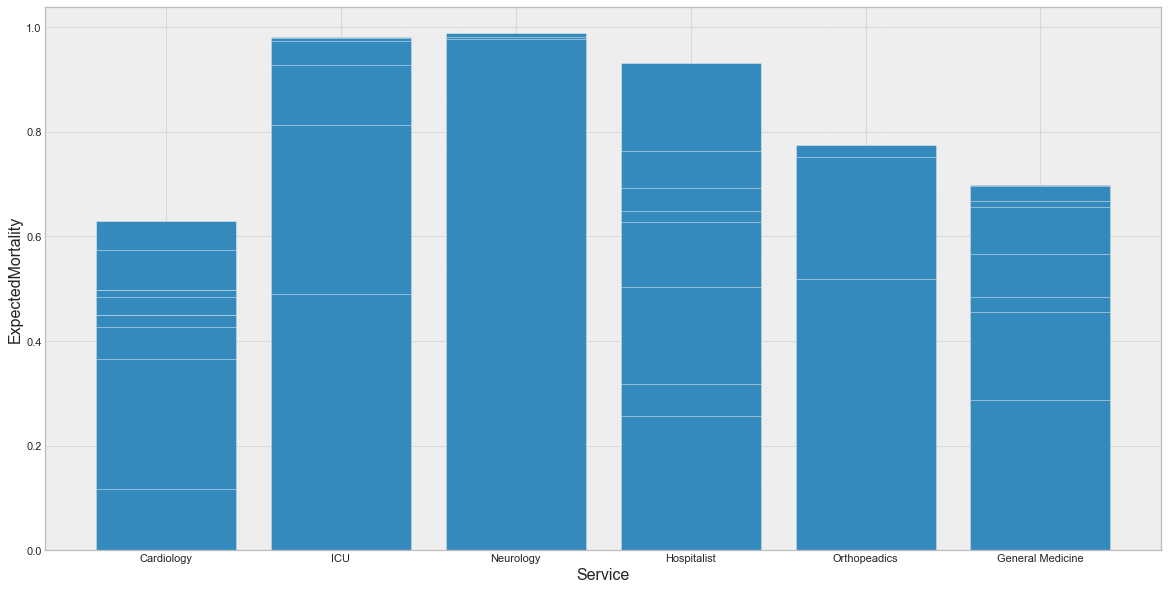

In [107]:
# plot data frame

%matplotlib inline

plt.style.use('bmh')
df = pd.read_excel('HospitalDatabase.xlsx', 'Discharges')
plt.rcParams['figure.figsize']=(20,10)

# df.plot.bar(x='Service', y='ExpectedMortality')
x = df['Service']
y = df['ExpectedMortality']

plt.xlabel('Service', fontsize=16)
plt.ylabel('ExpectedMortality', fontsize=16)
plt.bar(x,y)
plt.show()

# Q 71. Create a visualization on the count of patients based on primary diagnosis.

<AxesSubplot:>

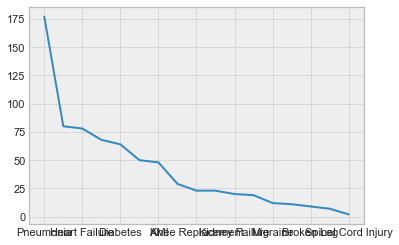

In [108]:
df = pd.read_excel('HospitalDatabase.xlsx', 'Discharges')
df_grp_count = pd.value_counts(df['PrimaryDiagnosis'])

import matplotlib.pyplot as plt
plt.figure(figsize = (12,15))

%matplotlib inline
plt.xticks(rotation = 45)
df_grp_count.plot()

# Q 72. List male patients over the age of 60 who have undergone surgery from January-March 2019.

In [252]:
workbook_url = 'HospitalDatabase.xlsx'
Patients_df = pd.read_excel(workbook_url,sheet_name='Patients')
Patients_df

,PatientID,FirstName,LastName,DateOfBirth,Gender,Race,Language
0,1,Lanni,Sue,1960-01-01 00:00:00.000,Male,White,English
1,2,Far,Myers,1985-11-15 02:08:42.090,Male,White,English
2,3,Devlin,Michael,1976-04-15 02:52:09.762,Male,White,English
3,4,Carmine,Texas,1968-10-15 03:32:13.635,Male,White,English
4,5,Tann,Bama,1962-05-01 19:12:58.950,Male,White,English
...,...,...,...,...,...,...,...
940,941,Wat,Fideler,1986-05-26 00:01:19.761,Male,Black/African-American,English
941,942,Wandie,Baythrop,1970-06-10 21:41:03.814,Male,Black/African-American,English
942,943,Diahann,Smeeton,1983-01-08 21:49:27.884,Male,Black/African-American,English
943,944,Panchito,Sharple,1963-06-05 07:57:05.569,Male,Black/African-American,English


In [254]:
Patients_df['DateOfBirth'] = pd.to_datetime(Patients_df['DateOfBirth'])
Patients_df['Year'] = Patients_df['DateOfBirth'].dt.year
Patients_df['Age'] = 2022 - Patients_df['Year']
Patients_df

,PatientID,FirstName,LastName,DateOfBirth,Gender,Race,Language,Year,Age
0,1,Lanni,Sue,1960-01-01 00:00:00.000,Male,White,English,1960,62
1,2,Far,Myers,1985-11-15 02:08:42.090,Male,White,English,1985,37
2,3,Devlin,Michael,1976-04-15 02:52:09.762,Male,White,English,1976,46
3,4,Carmine,Texas,1968-10-15 03:32:13.635,Male,White,English,1968,54
4,5,Tann,Bama,1962-05-01 19:12:58.950,Male,White,English,1962,60
...,...,...,...,...,...,...,...,...,...
940,941,Wat,Fideler,1986-05-26 00:01:19.761,Male,Black/African-American,English,1986,36
941,942,Wandie,Baythrop,1970-06-10 21:41:03.814,Male,Black/African-American,English,1970,52
942,943,Diahann,Smeeton,1983-01-08 21:49:27.884,Male,Black/African-American,English,1983,39
943,944,Panchito,Sharple,1963-06-05 07:57:05.569,Male,Black/African-American,English,1963,59


In [255]:
AmbulatoryVisits_df = pd.read_excel(workbook_url,sheet_name='AmbulatoryVisits')
AmbulatoryVisits_df

,VisitID,PatientMRN,ProviderID,DateofVisit,DateScheduled,VisitDepartmentID,VisitType,BloodPressureSystolic,BloodPressureDiastolic,Pulse,VisitStatus
0,202,840,29,2019-03-19,2019-03-13 07:59:24.000,10,Physical,188.0,144.143427,83.044920,No Show
1,436,820,25,2019-03-19,2019-02-24 07:10:31.043,3,Follow Up,179.0,118.876808,90.309544,No Show
2,794,879,30,2019-04-02,2019-03-19 01:41:55.656,11,Telemedicine,133.0,98.749563,80.859776,No Show
3,799,884,37,2019-03-03,2019-02-25 01:25:39.696,4,Telemedicine,132.0,98.001270,82.184737,No Show
4,515,32,26,2019-03-16,2019-02-20 06:44:59.617,11,Telemedicine,131.0,85.115632,89.192362,No Show
...,...,...,...,...,...,...,...,...,...,...,...
945,788,873,1,2019-03-27,2019-03-10 17:19:48.264,5,Telemedicine,187.0,126.695141,70.049167,Canceled
946,703,855,36,2019-03-12,2019-02-19 02:27:52.664,10,Follow Up,182.0,140.703502,73.380812,Canceled
947,481,865,13,2019-05-03,2019-04-25 13:37:57.501,12,New,150.0,84.841197,61.625454,Canceled
948,398,635,10,2019-02-09,2019-02-08 11:40:35.137,1,Physical,177.0,125.037534,53.287036,Canceled


In [256]:
Merged_df = Patients_df.merge(AmbulatoryVisits_df, left_on='PatientID', right_on='PatientMRN')
Merged_df

,PatientID,FirstName,LastName,DateOfBirth,Gender,Race,Language,Year,Age,VisitID,PatientMRN,ProviderID,DateofVisit,DateScheduled,VisitDepartmentID,VisitType,BloodPressureSystolic,BloodPressureDiastolic,Pulse,VisitStatus
0,4,Carmine,Texas,1968-10-15 03:32:13.635,Male,White,English,1968,54,1,4,1,2019-01-01,2018-12-17 09:08:02.824,1,New,175.0,139.096031,56.678398,Completed
1,5,Tann,Bama,1962-05-01 19:12:58.950,Male,White,English,1962,60,2,5,2,2019-01-02,2018-12-20 12:52:48.286,2,New,158.0,116.151006,59.360770,Completed
2,6,Jerrilyn,Kane,1969-03-30 09:36:56.550,Male,White,English,1969,53,3,6,3,2019-01-03,2018-12-18 20:48:08.960,3,New,154.0,98.736556,67.425256,Completed
3,7,Skipton,Bar,1975-11-25 22:23:53.525,Male,White,English,1975,47,4,7,4,2019-01-04,2018-12-21 19:47:47.631,4,New,137.0,85.844944,97.442262,Completed
4,8,Alexandra,Green,1967-06-16 16:37:21.694,Male,White,English,1967,55,5,8,5,2019-01-05,2018-12-18 19:38:26.156,5,New,167.0,130.334212,71.301478,Completed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,916,Kaylil,Baldack,1966-11-17 14:10:35.224,Female,Black/African-American,English,1966,56,831,916,4,2019-03-09,2019-02-11 18:20:38.164,12,Follow Up,179.0,130.049131,76.114584,Completed
946,916,Kaylil,Baldack,1966-11-17 14:10:35.224,Female,Black/African-American,English,1966,56,898,916,34,2019-04-10,2019-03-17 16:20:15.179,10,New,163.0,98.169357,67.506466,Completed
947,916,Kaylil,Baldack,1966-11-17 14:10:35.224,Female,Black/African-American,English,1966,56,278,916,2,2019-02-28,2019-02-24 11:38:24.749,2,Physical,180.0,122.011558,76.224581,Completed
948,916,Kaylil,Baldack,1966-11-17 14:10:35.224,Female,Black/African-American,English,1966,56,764,916,15,2019-03-03,2019-02-15 12:31:44.307,5,Follow Up,163.0,122.076264,99.794604,Completed


In [257]:
Merged_df['FullName'] = (Merged_df['FirstName']+' '+Merged_df['LastName'])
Male_df = Merged_df.loc[(Merged_df['Age'] > 60) & (Merged_df['Gender']== 'Male')]
Male_df

,PatientID,FirstName,LastName,DateOfBirth,Gender,Race,Language,Year,Age,VisitID,...,ProviderID,DateofVisit,DateScheduled,VisitDepartmentID,VisitType,BloodPressureSystolic,BloodPressureDiastolic,Pulse,VisitStatus,FullName
11,15,Gabriel,Saint,1961-11-18 06:47:20.682,Male,White,Spanish,1961,61,12,...,12,2019-01-12,2019-01-08 11:44:52.773,12,New,133.0,84.997205,62.342676,Completed,Gabriel Saint
15,19,Daugherty,Conner,1960-04-04 10:00:34.189,Male,White,Spanish,1960,62,16,...,16,2019-01-16,2018-12-17 13:57:08.056,4,New,131.0,64.484534,72.506395,Completed,Daugherty Conner
16,20,Megan,Walter,1960-02-10 19:04:57.032,Male,White,Spanish,1960,62,17,...,17,2019-01-17,2018-12-25 04:19:07.569,5,New,152.0,85.416789,87.656791,Completed,Megan Walter
322,560,Robyn,Aucourte,1960-02-11 20:56:05.193,Male,Black/African-American,English,1960,62,119,...,27,2019-04-29,2019-04-23 13:34:08.785,11,New,167.0,131.610736,98.101192,Completed,Robyn Aucourte
323,560,Robyn,Aucourte,1960-02-11 20:56:05.193,Male,Black/African-American,English,1960,62,373,...,4,2019-02-22,2019-01-25 13:10:02.833,12,Follow Up,181.0,146.904275,58.716220,Completed,Robyn Aucourte
324,560,Robyn,Aucourte,1960-02-11 20:56:05.193,Male,Black/African-American,English,1960,62,605,...,22,2019-04-11,2019-03-13 02:57:20.535,9,Follow Up,NaN,NaN,NaN,Completed,Robyn Aucourte
343,581,Constanta,Edgin,1960-06-06 08:19:25.534,Male,Black/African-American,English,1960,62,380,...,11,2019-03-01,2019-02-11 07:28:05.541,7,Telemedicine,179.0,113.061708,84.869647,Completed,Constanta Edgin
344,581,Constanta,Edgin,1960-06-06 08:19:25.534,Male,Black/African-American,English,1960,62,126,...,5,2019-01-02,2018-12-06 22:40:43.282,6,New,150.0,104.148850,59.907306,Completed,Constanta Edgin
345,581,Constanta,Edgin,1960-06-06 08:19:25.534,Male,Black/African-American,English,1960,62,612,...,6,2019-04-18,2019-04-12 22:02:41.388,4,Follow Up,143.0,87.972160,87.084049,Completed,Constanta Edgin
424,662,Brunhilda,Gow,1960-11-12 18:08:26.260,Male,Black/African-American,English,1960,62,407,...,19,2019-02-18,2019-02-05 04:53:06.610,10,Physical,170.0,136.823330,57.369963,No Show,Brunhilda Gow


In [249]:
df = pd.read_excel('HospitalDatabase.xlsx', 'Providers')
surgery_filt = df['ProviderSpecialty'] == 'Surgery'
surgery_df = df[surgery_filt]
surgery_df

,ProviderID,ProviderName,ProviderSpecialty,ProviderDateOnStaff
9,10,Fred Man,Surgery,1998-03-17 01:47:18.794
10,11,Kim Kimberly,Surgery,1998-05-10 14:47:29.468
11,12,Sarah Ab,Surgery,1998-08-18 05:22:40.762
12,13,Abigail Marriot,Surgery,1998-11-08 12:25:45.705
13,14,Dave Yu,Surgery,1999-06-26 16:18:57.436
14,15,Christian Saint,Surgery,2000-08-27 00:12:40.326
15,16,Perry Pardon,Surgery,2001-02-13 11:49:17.862


In [250]:
provider_list = surgery_df['ProviderID'].tolist()
provider_list

[10, 11, 12, 13, 14, 15, 16]

In [261]:
# Displaying all rows that have Provider ID value as [10,11,12,13,14,15,16] 
# &  Date ofVisit is between Jan 2019-Marc2019
# final_df = Male_df.loc[Male_df('ProviderID', provider_list)] 
final_df = Male_df[Male_df['ProviderID'].isin(provider_list)] 
print('List of male patients over the age of 60 who have undergone surgery from January-March 2019 : ')
final_df

List of male patients over the age of 60 who have undergone surgery from January-March 2019 : 


,PatientID,FirstName,LastName,DateOfBirth,Gender,Race,Language,Year,Age,VisitID,...,ProviderID,DateofVisit,DateScheduled,VisitDepartmentID,VisitType,BloodPressureSystolic,BloodPressureDiastolic,Pulse,VisitStatus,FullName
11,15,Gabriel,Saint,1961-11-18 06:47:20.682,Male,White,Spanish,1961,61,12,...,12,2019-01-12,2019-01-08 11:44:52.773,12,New,133.0,84.997205,62.342676,Completed,Gabriel Saint
15,19,Daugherty,Conner,1960-04-04 10:00:34.189,Male,White,Spanish,1960,62,16,...,16,2019-01-16,2018-12-17 13:57:08.056,4,New,131.0,64.484534,72.506395,Completed,Daugherty Conner
343,581,Constanta,Edgin,1960-06-06 08:19:25.534,Male,Black/African-American,English,1960,62,380,...,11,2019-03-01,2019-02-11 07:28:05.541,7,Telemedicine,179.0,113.061708,84.869647,Completed,Constanta Edgin
441,802,Berta,Loxly,1961-05-19 21:00:01.885,Male,White,English,1961,61,164,...,12,2019-02-09,2019-01-16 17:53:41.867,8,Follow Up,NaN,NaN,NaN,Completed,Berta Loxly


# Q 73. Delete the column 'DischargeDispostion' iteratively.

In [221]:
df_del = pd.read_excel('HospitalDatabase.xlsx', 'Discharges')
df_del

,AdmissionID,PatientID,AdmissionDate,DischargeDate,DischargeDisposition,Service,PrimaryDiagnosis,ExpectedLOS,ExpectedMortality
0,1,9,2018-01-01,2018-01-07 18:06:06.408,Expired,Cardiology,AMI,9.646857,0.061540
1,257,93,2018-01-06,2018-01-18 02:59:04.667,Expired,Cardiology,Broken Leg,6.816558,0.628827
2,152,101,2018-01-07,2018-01-11 16:16:06.782,Expired,Cardiology,Kidney Failure,6.580273,0.573887
3,361,102,2018-01-07,2018-01-15 04:48:33.134,Expired,Cardiology,Afib,12.794536,0.222163
4,258,103,2018-01-07,2018-01-15 13:32:36.157,Expired,Cardiology,Broken Leg,2.639297,0.055468
...,...,...,...,...,...,...,...,...,...
715,715,716,2018-02-21,2018-03-06 03:31:05.262,Transfer,ICU,Heart Failure,11.362095,0.370695
716,698,723,2018-02-22,2018-02-26 15:09:02.584,Transfer,ICU,Heart Failure,10.262312,0.812930
717,704,724,2018-02-22,2018-02-27 07:59:32.385,Transfer,General Medicine,Pneumonia,6.036234,0.094128
718,716,733,2018-02-22,2018-03-05 12:31:55.958,Transfer,ICU,Heart Failure,13.323413,0.490892


In [222]:
df_del.drop('DischargeDisposition',axis = 1)

,AdmissionID,PatientID,AdmissionDate,DischargeDate,Service,PrimaryDiagnosis,ExpectedLOS,ExpectedMortality
0,1,9,2018-01-01,2018-01-07 18:06:06.408,Cardiology,AMI,9.646857,0.061540
1,257,93,2018-01-06,2018-01-18 02:59:04.667,Cardiology,Broken Leg,6.816558,0.628827
2,152,101,2018-01-07,2018-01-11 16:16:06.782,Cardiology,Kidney Failure,6.580273,0.573887
3,361,102,2018-01-07,2018-01-15 04:48:33.134,Cardiology,Afib,12.794536,0.222163
4,258,103,2018-01-07,2018-01-15 13:32:36.157,Cardiology,Broken Leg,2.639297,0.055468
...,...,...,...,...,...,...,...,...
715,715,716,2018-02-21,2018-03-06 03:31:05.262,ICU,Heart Failure,11.362095,0.370695
716,698,723,2018-02-22,2018-02-26 15:09:02.584,ICU,Heart Failure,10.262312,0.812930
717,704,724,2018-02-22,2018-02-27 07:59:32.385,General Medicine,Pneumonia,6.036234,0.094128
718,716,733,2018-02-22,2018-03-05 12:31:55.958,ICU,Heart Failure,13.323413,0.490892


# Q 74. Get the list of ReasonForVisit.

In [110]:
# Get a unqiue coloumn data into list
df_EDvisits = pd.read_excel('HospitalDatabase.xlsx', 'EDVisits')
list_EDvisits = df_EDvisits.ReasonForVisit.unique().tolist()
print(list_EDvisits)

['Stomach Ache', 'Migraine', 'Chest Pain', 'Bleeding', 'Car Accident', 'Pneumonia', 'Fever', 'Shortness of Breath', 'Gun Shot', 'Accident', 'Laceration', 'Intoxication', 'Cough']


# Q 75. Calculate the time spent in ED Department for each visit.

In [218]:
workbook_url = 'HospitalDatabase.xlsx'
EDVisits_df = pd.read_excel(workbook_url,sheet_name='EDVisits')
EDVisits_df

,EDVisitID,PatientID,VisitDate,EDDischargeTime,Acuity,ReasonForVisit,EDDisposition
0,1,1,2020-01-01 00:00:00.000,2020-01-01 11:20:22.924,1,Stomach Ache,Admitted
1,12,12,2020-01-01 02:45:40.302,2020-01-02 02:00:00.517,2,Migraine,Admitted
2,13,13,2020-01-01 03:09:24.701,2020-01-01 05:00:20.852,3,Stomach Ache,Admitted
3,14,14,2020-01-01 03:12:19.349,2020-01-01 04:32:29.142,3,Migraine,Admitted
4,15,15,2020-01-01 03:46:32.698,2020-01-01 06:24:52.741,3,Chest Pain,Admitted
...,...,...,...,...,...,...,...
1194,1183,929,2020-01-15 10:38:42.570,2020-01-16 02:31:52.023,4,Chest Pain,Discharged
1195,1186,932,2020-01-15 11:52:37.540,2020-01-16 10:19:41.570,1,Pneumonia,Discharged
1196,1187,933,2020-01-15 12:11:11.678,2020-01-15 16:41:15.223,1,Pneumonia,Discharged
1197,1188,934,2020-01-15 12:21:46.006,2020-01-15 18:32:21.060,1,Pneumonia,Discharged


In [219]:
EDVisits_df['TimeSpentED_Hours'] = (EDVisits_df.EDDischargeTime - EDVisits_df.VisitDate) / np.timedelta64(1, 'h')
EDVisits_df

,EDVisitID,PatientID,VisitDate,EDDischargeTime,Acuity,ReasonForVisit,EDDisposition,TimeSpentED_Hours
0,1,1,2020-01-01 00:00:00.000,2020-01-01 11:20:22.924,1,Stomach Ache,Admitted,11.339701
1,12,12,2020-01-01 02:45:40.302,2020-01-02 02:00:00.517,2,Migraine,Admitted,23.238949
2,13,13,2020-01-01 03:09:24.701,2020-01-01 05:00:20.852,3,Stomach Ache,Admitted,1.848931
3,14,14,2020-01-01 03:12:19.349,2020-01-01 04:32:29.142,3,Migraine,Admitted,1.336054
4,15,15,2020-01-01 03:46:32.698,2020-01-01 06:24:52.741,3,Chest Pain,Admitted,2.638901
...,...,...,...,...,...,...,...,...
1194,1183,929,2020-01-15 10:38:42.570,2020-01-16 02:31:52.023,4,Chest Pain,Discharged,15.885959
1195,1186,932,2020-01-15 11:52:37.540,2020-01-16 10:19:41.570,1,Pneumonia,Discharged,22.451119
1196,1187,933,2020-01-15 12:11:11.678,2020-01-15 16:41:15.223,1,Pneumonia,Discharged,4.500985
1197,1188,934,2020-01-15 12:21:46.006,2020-01-15 18:32:21.060,1,Pneumonia,Discharged,6.176404


# Q 76. Reverse the string without using inbuilt functions.

In [111]:
# Reversing a string by slicing

def reverseStr(s):
    s = s[::-1]
    return s
  
string = "ThePythonHackathon"
  
print("The initial string is : ", end="")
print(string)
  
print("The string after being reversed is : ", end="")
print(reverseStr(string))

The initial string is : ThePythonHackathon
The string after being reversed is : nohtakcaHnohtyPehT


# Q 77. Create a bar chart by making list on Acuity & EDDisposition column (with no duplicates) & make the hatchs onto the bar by using set_hatch() method.

In [112]:
workbook_url = 'HospitalDatabase.xlsx'
EDVisits_df = pd.read_excel(workbook_url,sheet_name='EDVisits')
EDVisits_df

,EDVisitID,PatientID,VisitDate,EDDischargeTime,Acuity,ReasonForVisit,EDDisposition
0,1,1,2020-01-01 00:00:00.000,2020-01-01 11:20:22.924,1,Stomach Ache,Admitted
1,12,12,2020-01-01 02:45:40.302,2020-01-02 02:00:00.517,2,Migraine,Admitted
2,13,13,2020-01-01 03:09:24.701,2020-01-01 05:00:20.852,3,Stomach Ache,Admitted
3,14,14,2020-01-01 03:12:19.349,2020-01-01 04:32:29.142,3,Migraine,Admitted
4,15,15,2020-01-01 03:46:32.698,2020-01-01 06:24:52.741,3,Chest Pain,Admitted
...,...,...,...,...,...,...,...
1194,1183,929,2020-01-15 10:38:42.570,2020-01-16 02:31:52.023,4,Chest Pain,Discharged
1195,1186,932,2020-01-15 11:52:37.540,2020-01-16 10:19:41.570,1,Pneumonia,Discharged
1196,1187,933,2020-01-15 12:11:11.678,2020-01-15 16:41:15.223,1,Pneumonia,Discharged
1197,1188,934,2020-01-15 12:21:46.006,2020-01-15 18:32:21.060,1,Pneumonia,Discharged


<AxesSubplot:xlabel='EDDisposition', ylabel='Acuity'>

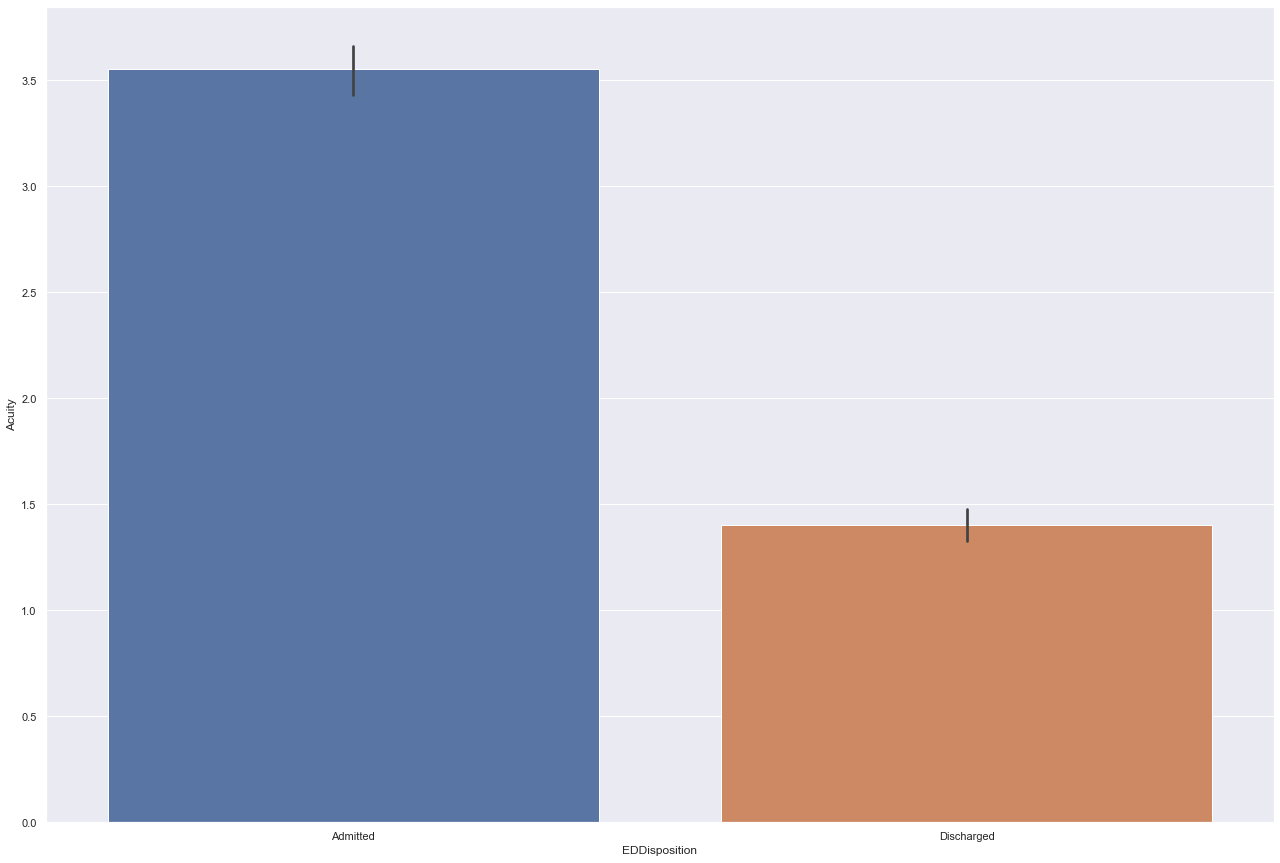

In [113]:
sns.set(rc={'figure.figsize':(22,15)})
sns.barplot(x="EDDisposition", y="Acuity", data=EDVisits_df, estimator=np.mean)

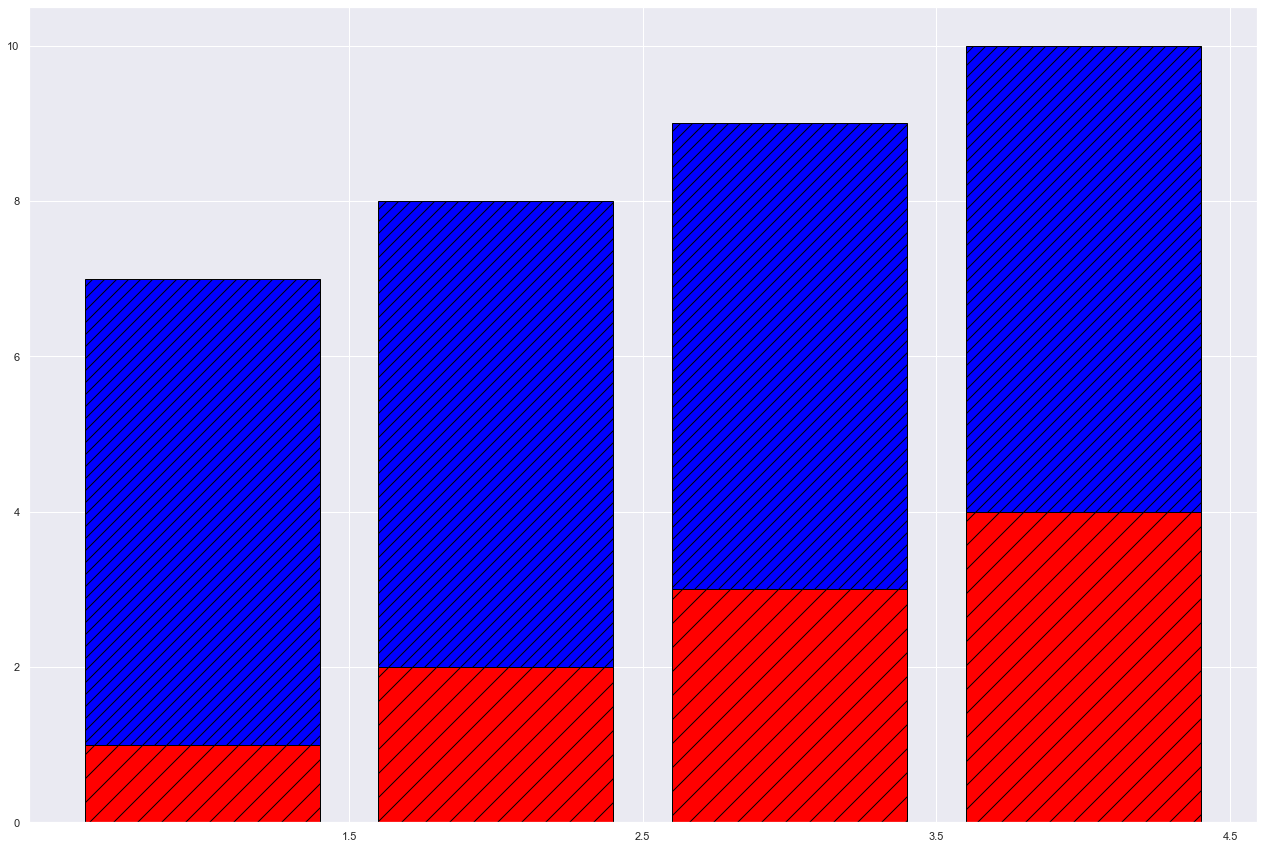

In [114]:
fig, (ax1) = plt.subplots(1)

ax1.bar(range(1, 5), range(1, 5), color='red', edgecolor='black', hatch="/")
ax1.bar(range(1, 5), [6] * 4, bottom=range(1, 5),
        color='blue', edgecolor='black', hatch='//')
ax1.set_xticks([1.5, 2.5, 3.5, 4.5])


plt.show()

# Q 78. Find reasonForVisit with highest count of acuity 5 patients.

In [115]:
# data od patients with acuity = 5
df_EDvisits = pd.read_excel('HospitalDatabase.xlsx', 'EDVisits')
df_acuity = (df_EDvisits['Acuity'] == 5)
df_EDvisits[df_acuity]

,EDVisitID,PatientID,VisitDate,EDDischargeTime,Acuity,ReasonForVisit,EDDisposition
7,18,18,2020-01-01 04:39:40.091,2020-01-02 03:25:07.379,5,Car Accident,Admitted
8,19,19,2020-01-01 04:56:11.608,2020-01-02 04:31:45.968,5,Chest Pain,Admitted
9,26,26,2020-01-01 06:14:46.240,2020-01-01 15:34:00.868,5,Chest Pain,Admitted
10,27,27,2020-01-01 06:27:42.483,2020-01-01 18:30:35.922,5,Chest Pain,Admitted
17,45,45,2020-01-01 11:53:16.342,2020-01-01 21:20:18.854,5,Shortness of Breath,Admitted
...,...,...,...,...,...,...,...
1075,979,725,2020-01-13 01:52:00.052,2020-01-14 01:51:32.779,5,Shortness of Breath,Discharged
1116,1050,796,2020-01-13 21:48:34.838,2020-01-14 10:25:44.839,5,Shortness of Breath,Discharged
1117,1051,797,2020-01-13 22:13:47.779,2020-01-14 06:39:37.586,5,Shortness of Breath,Discharged
1171,1147,893,2020-01-14 23:04:58.584,2020-01-15 09:56:39.625,5,Shortness of Breath,Discharged


# Q 79. Which PrimaryDiagnosis has the biggest difference between maximum and minimum Expected LOS?

In [226]:
df=pd.read_excel('HospitalDatabase.xlsx', 'Discharges')
ndf = df.assign(ExLosMin = df['ExpectedLOS'].abs(),ExLosMax=df['ExpectedLOS'].abs()).groupby('PrimaryDiagnosis')\
     .agg({'ExLosMin':'min','ExLosMax':'max'})
ndf

,ExLosMin,ExLosMax
PrimaryDiagnosis,,
AMI,9.424873,16.974824
Afib,9.651522,15.212173
Broken Leg,2.279624,9.434517
Diabetes,2.113955,10.887323
Fever,2.420531,10.387398
Flu,2.012974,10.889954
Heart Failure,9.172859,16.867883
Hip Fracture,2.044117,4.770870
Hypertension,2.102909,10.127971


In [229]:
ndf['Max_Min_diff'] = ndf['ExLosMax'] - ndf['ExLosMin']
ndf

,ExLosMin,ExLosMax,Max_Min_diff
PrimaryDiagnosis,,,
AMI,9.424873,16.974824,7.549951
Afib,9.651522,15.212173,5.560651
Broken Leg,2.279624,9.434517,7.154893
Diabetes,2.113955,10.887323,8.773368
Fever,2.420531,10.387398,7.966867
Flu,2.012974,10.889954,8.876980
Heart Failure,9.172859,16.867883,7.695024
Hip Fracture,2.044117,4.770870,2.726753
Hypertension,2.102909,10.127971,8.025063


In [231]:
maxDff = ndf['Max_Min_diff'].max()
 
print("Maximum value in column 'Max_Min_diff': " )
print(maxDff)

Maximum value in column 'Max_Min_diff': 
14.834260065410472


In [236]:
print(" The PrimaryDiagnosis that has the biggest difference between maximum and minimum Expected LOS is : " )
ndf = ndf.loc[(ndf['Max_Min_diff'] == maxDff)]
ndf

 The PrimaryDiagnosis that has the biggest difference between maximum and minimum Expected LOS is : 


,ExLosMin,ExLosMax,Max_Min_diff
PrimaryDiagnosis,,,
Pneumonia,2.163953,16.998213,14.83426


# Q 80. Write a code snippet to print different ProviderSpecialty ( use groupby and get the list of the groups).

In [116]:
df = pd.read_excel('HospitalDatabase.xlsx', 'Providers')
df.groupby(['ProviderSpecialty'])['ProviderID'].max()

ProviderSpecialty
Cardiology     24
Pediatrics      9
PrimaryCare    40
Surgery        16
Name: ProviderID, dtype: int64

# Bonus Q 81. Show all the Male, Black/African-American, above the age of 55 who visit the hospital.

In [117]:
workbook_url = 'HospitalDatabase.xlsx'
Patients_df = pd.read_excel(workbook_url,sheet_name='Patients')
Patients_df
Patients_df['DateOfBirth'] = pd.to_datetime(Patients_df['DateOfBirth'])
Patients_df['Year'] = Patients_df['DateOfBirth'].dt.year
Patients_df['Age'] = 2022 - Patients_df['Year']
Patients_df

df = Patients_df.loc[(Patients_df['Age'] > 55) & 
              (Patients_df['Race'] == 'Black/African-American') & (Patients_df['Gender']== 'Male')]
df

,PatientID,FirstName,LastName,DateOfBirth,Gender,Race,Language,Year,Age
81,83,Charmine,Bernardt,1964-07-28 15:49:41.229,Male,Black/African-American,Spanish,1964,58
84,86,Aurore,Harrild,1964-07-05 10:50:46.122,Male,Black/African-American,Spanish,1964,58
89,46,Ilise,de,1965-10-20 06:23:48.785,Male,Black/African-American,Spanish,1965,57
96,97,Skippie,Breagan,1966-12-01 19:45:47.561,Male,Black/African-American,Spanish,1966,56
101,102,Gipsy,Frankton,1964-06-13 06:52:25.324,Male,Black/African-American,Spanish,1964,58
...,...,...,...,...,...,...,...,...,...
927,928,Giovanni,McCluney,1961-08-18 15:37:17.632,Male,Black/African-American,English,1961,61
928,929,Ediva,MacTeague,1963-04-05 17:42:15.238,Male,Black/African-American,English,1963,59
931,932,Kellsie,MacTeague,1966-06-28 14:49:50.758,Male,Black/African-American,English,1966,56
935,936,Philippa,Slocum,1963-07-21 21:19:53.583,Male,Black/African-American,English,1963,59


# Answer : Statiscally Out of the total no of 1000 Patients, 97 patients are Male, Black/African-American, above the age of 55 who visit the hospital.

# Bonus Q 82. Plot a graph by counting the no. of patients based on their reason for visit.

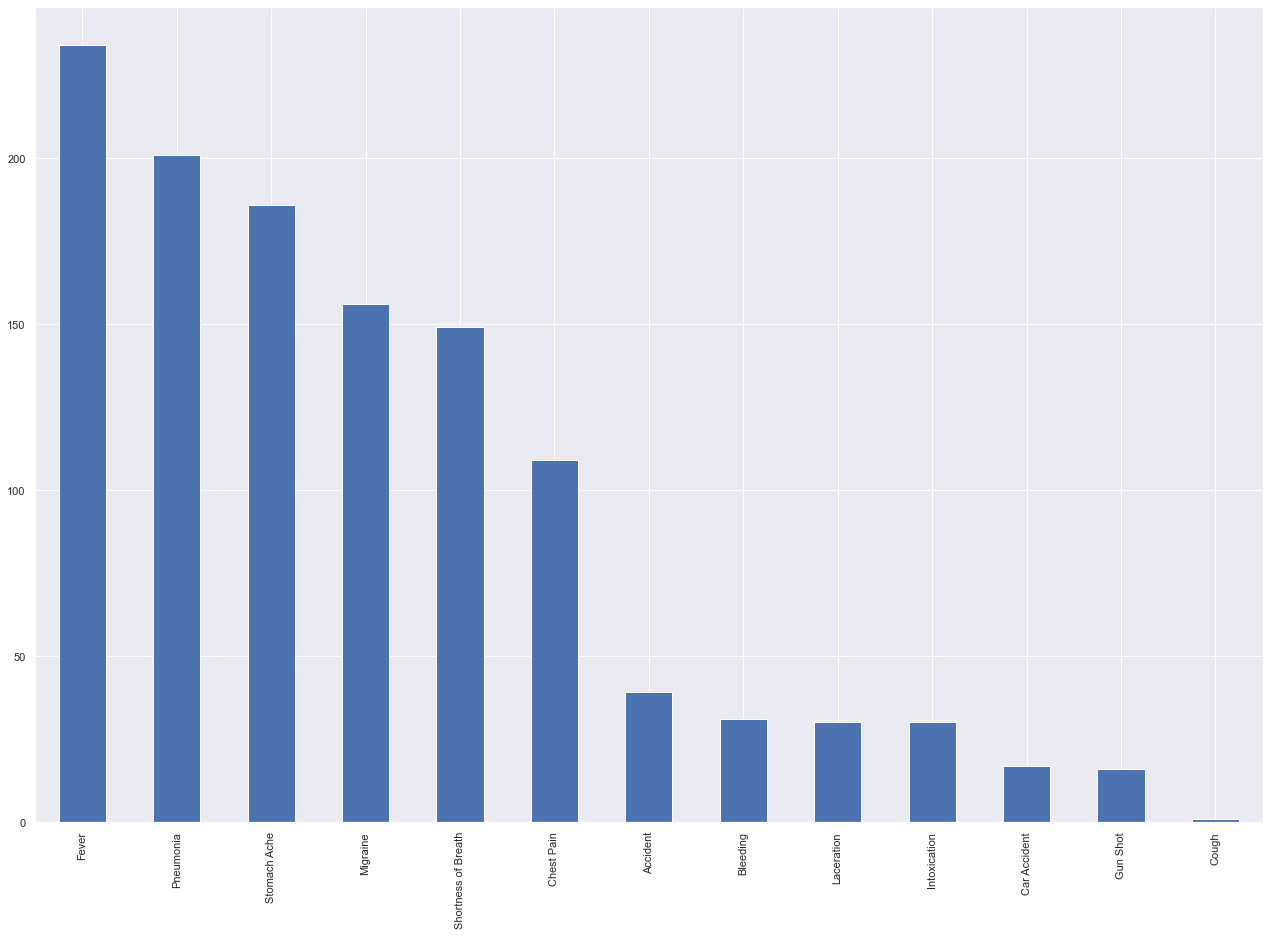

In [118]:
df=pd.read_excel('HospitalDatabase.xlsx', 'EDVisits')
df['ReasonForVisit'].value_counts().plot(kind='bar');

# Bonus Q 83.Display total count of patients service wise and gender wise separately.

In [119]:
df=pd.read_csv('HospitalDatabase-ReAdmissionRegistry.csv')
df['Service'].value_counts()

General Medicine    263
ICU                 151
Hospitalist         101
Cardiology           95
Neurology            65
Orthopeadics         45
Name: Service, dtype: int64

In [120]:
df=pd.read_csv('HospitalDatabase-Pateint.csv')
df['Gender'].value_counts()

Male      537
Female    408
Name: Gender, dtype: int64

# Bonus Q 84: Retrieve patient ids with abnormal BP range separtely (normal range DBP = 80, SBP = 120)

In [121]:
# Retrieve the rows where DBP<80
df=pd.read_csv('HospitalDatabase-AmulateryVisit.csv')
df['BloodPressureDiastolic']<80

0      False
1      False
2      False
3      False
4      False
       ...  
945    False
946    False
947    False
948    False
949    False
Name: BloodPressureDiastolic, Length: 950, dtype: bool

In [122]:
# Retrieve the rows where SBP<120
df['BloodPressureSystolic']<120

0      False
1      False
2      False
3      False
4      False
       ...  
945    False
946    False
947    False
948    False
949    False
Name: BloodPressureSystolic, Length: 950, dtype: bool

# Bonus Q 85. List of all the patients who did not show up. And the count of all the patients for each reason of visit.

In [123]:
df=pd.read_csv('HospitalDatabase-AmulateryVisit.csv')
df.loc[(df['VisitStatus']=='No Show'),:]

,VisitID,PatientMRN,ProviderID,DateofVisit,DateScheduled,VisitDepartmentID,VisitType,BloodPressureSystolic,BloodPressureDiastolic,Pulse,VisitStatus
0,202,840,29,3/19/2019,3/13/2019,10,Physical,188.0,144.143427,83.044920,No Show
1,436,820,25,3/19/2019,2/24/2019,3,Follow Up,179.0,118.876808,90.309544,No Show
2,794,879,30,4/2/2019,3/19/2019,11,Telemedicine,133.0,98.749563,80.859776,No Show
3,799,884,37,3/3/2019,2/25/2019,4,Telemedicine,132.0,98.001270,82.184737,No Show
4,515,32,26,3/16/2019,2/20/2019,11,Telemedicine,131.0,85.115632,89.192362,No Show
...,...,...,...,...,...,...,...,...,...,...,...
149,414,90,3,2/25/2019,2/17/2019,5,Follow Up,136.0,90.802316,79.426026,No Show
150,507,891,16,1/25/2019,1/14/2019,11,Telemedicine,155.0,112.064259,73.714965,No Show
151,410,90,22,2/21/2019,1/31/2019,1,Follow Up,131.0,80.726116,54.947675,No Show
152,803,888,15,3/7/2019,2/25/2019,8,Telemedicine,173.0,136.377032,58.024363,No Show


In [125]:
df=pd.read_csv('HospitalDatabase-EDVisits.csv')
df.groupby('ReasonForVisit')['EDDisposition'].apply(lambda x: (x=='Admitted').sum()).reset_index(name='count')

,ReasonForVisit,count
0,Accident,39
1,Bleeding,16
2,Car Accident,17
3,Chest Pain,94
4,Cough,0
5,Fever,46
6,Gun Shot,16
7,Intoxication,0
8,Laceration,0
9,Migraine,47


# Bonus Q 86. Find the age ranges for patients based on primary Diagnosis.

In [126]:
workbook_url = 'HospitalDatabase.xlsx'
Patients_df = pd.read_excel(workbook_url,sheet_name='Patients')
Patients_df

,PatientID,FirstName,LastName,DateOfBirth,Gender,Race,Language
0,1,Lanni,Sue,1960-01-01 00:00:00.000,Male,White,English
1,2,Far,Myers,1985-11-15 02:08:42.090,Male,White,English
2,3,Devlin,Michael,1976-04-15 02:52:09.762,Male,White,English
3,4,Carmine,Texas,1968-10-15 03:32:13.635,Male,White,English
4,5,Tann,Bama,1962-05-01 19:12:58.950,Male,White,English
...,...,...,...,...,...,...,...
940,941,Wat,Fideler,1986-05-26 00:01:19.761,Male,Black/African-American,English
941,942,Wandie,Baythrop,1970-06-10 21:41:03.814,Male,Black/African-American,English
942,943,Diahann,Smeeton,1983-01-08 21:49:27.884,Male,Black/African-American,English
943,944,Panchito,Sharple,1963-06-05 07:57:05.569,Male,Black/African-American,English


In [127]:
Patients_df['DateOfBirth'] = pd.to_datetime(Patients_df['DateOfBirth'])
Patients_df['Year'] = Patients_df['DateOfBirth'].dt.year
Patients_df['Age'] = 2022 - Patients_df['Year']
Patients_df

,PatientID,FirstName,LastName,DateOfBirth,Gender,Race,Language,Year,Age
0,1,Lanni,Sue,1960-01-01 00:00:00.000,Male,White,English,1960,62
1,2,Far,Myers,1985-11-15 02:08:42.090,Male,White,English,1985,37
2,3,Devlin,Michael,1976-04-15 02:52:09.762,Male,White,English,1976,46
3,4,Carmine,Texas,1968-10-15 03:32:13.635,Male,White,English,1968,54
4,5,Tann,Bama,1962-05-01 19:12:58.950,Male,White,English,1962,60
...,...,...,...,...,...,...,...,...,...
940,941,Wat,Fideler,1986-05-26 00:01:19.761,Male,Black/African-American,English,1986,36
941,942,Wandie,Baythrop,1970-06-10 21:41:03.814,Male,Black/African-American,English,1970,52
942,943,Diahann,Smeeton,1983-01-08 21:49:27.884,Male,Black/African-American,English,1983,39
943,944,Panchito,Sharple,1963-06-05 07:57:05.569,Male,Black/African-American,English,1963,59


In [128]:
Discharges_df = pd.read_excel(workbook_url,sheet_name='Discharges')
Discharges_df

,AdmissionID,PatientID,AdmissionDate,DischargeDate,DischargeDisposition,Service,PrimaryDiagnosis,ExpectedLOS,ExpectedMortality
0,1,9,2018-01-01,2018-01-07 18:06:06.408,Expired,Cardiology,AMI,9.646857,0.061540
1,257,93,2018-01-06,2018-01-18 02:59:04.667,Expired,Cardiology,Broken Leg,6.816558,0.628827
2,152,101,2018-01-07,2018-01-11 16:16:06.782,Expired,Cardiology,Kidney Failure,6.580273,0.573887
3,361,102,2018-01-07,2018-01-15 04:48:33.134,Expired,Cardiology,Afib,12.794536,0.222163
4,258,103,2018-01-07,2018-01-15 13:32:36.157,Expired,Cardiology,Broken Leg,2.639297,0.055468
...,...,...,...,...,...,...,...,...,...
715,715,716,2018-02-21,2018-03-06 03:31:05.262,Transfer,ICU,Heart Failure,11.362095,0.370695
716,698,723,2018-02-22,2018-02-26 15:09:02.584,Transfer,ICU,Heart Failure,10.262312,0.812930
717,704,724,2018-02-22,2018-02-27 07:59:32.385,Transfer,General Medicine,Pneumonia,6.036234,0.094128
718,716,733,2018-02-22,2018-03-05 12:31:55.958,Transfer,ICU,Heart Failure,13.323413,0.490892


In [129]:
# Merging Patients and Discharge tables
df_57 = Patients_df.merge(Discharges_df, how = 'outer',indicator=True)
df_57

,PatientID,FirstName,LastName,DateOfBirth,Gender,Race,Language,Year,Age,AdmissionID,AdmissionDate,DischargeDate,DischargeDisposition,Service,PrimaryDiagnosis,ExpectedLOS,ExpectedMortality,_merge
0,1,Lanni,Sue,1960-01-01 00:00:00.000,Male,White,English,1960,62,389.0,2018-01-01,2018-01-04 19:59:31.391,Home,Hospitalist,Kidney Failure,6.717771,0.010046,both
1,2,Far,Myers,1985-11-15 02:08:42.090,Male,White,English,1985,37,635.0,2018-01-01,2018-01-04 21:28:51.898,Home,General Medicine,Flu,3.825969,0.604562,both
2,3,Devlin,Michael,1976-04-15 02:52:09.762,Male,White,English,1976,46,606.0,2018-01-01,2018-01-04 22:28:23.672,Home,General Medicine,Flu,3.382493,0.266137,both
3,4,Carmine,Texas,1968-10-15 03:32:13.635,Male,White,English,1968,54,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,left_only
4,5,Tann,Bama,1962-05-01 19:12:58.950,Male,White,English,1962,60,587.0,2018-01-01,2018-01-05 05:47:04.933,Home,General Medicine,Flu,3.763352,0.307527,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
956,941,Wat,Fideler,1986-05-26 00:01:19.761,Male,Black/African-American,English,1986,36,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,left_only
957,942,Wandie,Baythrop,1970-06-10 21:41:03.814,Male,Black/African-American,English,1970,52,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,left_only
958,943,Diahann,Smeeton,1983-01-08 21:49:27.884,Male,Black/African-American,English,1983,39,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,left_only
959,944,Panchito,Sharple,1963-06-05 07:57:05.569,Male,Black/African-American,English,1963,59,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,left_only


<AxesSubplot:xlabel='Age', ylabel='PrimaryDiagnosis'>

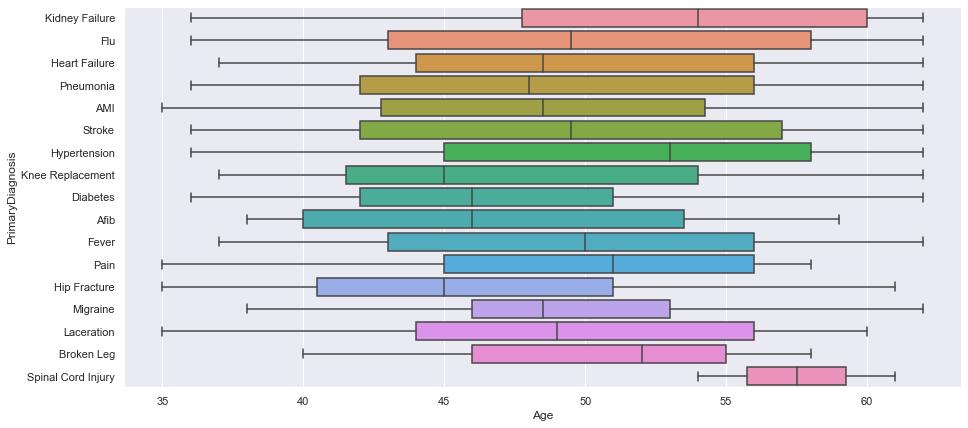

In [130]:
plt.figure(figsize=(15,7))
sns.boxplot(data=df_57,x='Age',y='PrimaryDiagnosis')

# Bonus Q 87. Count of 'No Show' in each visit type.

In [70]:
df=pd.read_csv('HospitalDatabase-AmulateryVisit.csv')
#df[df['VisitStatus']=='No Show'] 
df[df['VisitStatus']=='No Show'],[df['VisitType'].value_counts]

(     VisitID  PatientMRN  ProviderID DateofVisit DateScheduled  \
 0        202         840          29   3/19/2019     3/13/2019   
 1        436         820          25   3/19/2019     2/24/2019   
 2        794         879          30    4/2/2019     3/19/2019   
 3        799         884          37    3/3/2019     2/25/2019   
 4        515          32          26   3/16/2019     2/20/2019   
 ..       ...         ...         ...         ...           ...   
 149      414          90           3   2/25/2019     2/17/2019   
 150      507         891          16   1/25/2019     1/14/2019   
 151      410          90          22   2/21/2019     1/31/2019   
 152      803         888          15    3/7/2019     2/25/2019   
 153      505         889          14   1/23/2019     1/22/2019   
 
      VisitDepartmentID     VisitType  BloodPressureSystolic  \
 0                   10      Physical                  188.0   
 1                    3     Follow Up                  179.0   
 2

# Bonus Q 88. Showing the records of where the ExpectedLos is greater than the difference of the max and min ExpectedLos.

In [260]:
df=pd.read_excel('HospitalDatabase.xlsx', 'Discharges')
Expected_LOS=df['ExpectedLOS']
a=df['ExpectedLOS'].max()
b=df['ExpectedLOS'].min()
df_diff = a-b
primary_diagnosis_list = df.loc[(df['ExpectedLOS'] > df_diff)]
primary_diagnosis_list

,AdmissionID,PatientID,AdmissionDate,DischargeDate,DischargeDisposition,Service,PrimaryDiagnosis,ExpectedLOS,ExpectedMortality
12,398,134,2018-01-10,2018-01-15 16:43:47.026,Expired,ICU,Pneumonia,16.225126,0.460186
24,368,178,2018-01-14,2018-01-18 13:44:53.072,Expired,ICU,Spinal Cord Injury,15.183750,0.318426
31,369,198,2018-01-15,2018-01-31 14:28:07.437,Expired,ICU,Spinal Cord Injury,15.369330,0.082132
36,406,230,2018-01-18,2018-02-01 20:55:30.903,Expired,Cardiology,Afib,15.212173,0.487404
47,174,352,2018-01-29,2018-02-02 21:21:45.388,Expired,ICU,Pneumonia,16.989907,0.573870
87,295,560,2018-02-13,2018-02-26 18:17:22.826,Expired,Neurology,Heart Failure,16.785926,0.808604
92,297,588,2018-02-15,2018-02-26 14:46:54.780,Expired,Neurology,Stroke,15.958583,0.172149
101,691,709,2018-02-21,2018-03-01 08:44:33.655,Expired,Cardiology,Heart Failure,15.471412,0.362760
110,549,8,2018-01-01,2018-01-07 15:39:25.987,Home,Hospitalist,Pneumonia,16.472257,0.526198
119,252,19,2018-01-01,2018-01-17 14:13:23.627,Home,Hospitalist,Stroke,15.349671,0.478003
